In [1]:
import matplotlib.pyplot as plt
from coffea.util import load
from pocket_coffea.utils.plot_utils import Shape
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_png { height: auto; }</style>"))
import pickle
import numpy as np
import os
if not os.path.exists('hists'):
    os.makedirs('hists')
import awkward as ak
from omegaconf import OmegaConf
import math
import mplhep as hep

In [2]:
o = load("out_columns/output_allNoDupes.coffea")
#o2 = load("output_newconfig11_TTbbDiLeptonic_Powheg_2018.coffea")
o2 = load("output_ttbb_all.coffea")

In [3]:
parameters_dump = OmegaConf.load("/afs/cern.ch/user/r/rmccarth/private/ttH/plotUpdate/PocketCoffea/AnalysisConfigs/configs/ttHbb/params/plotting_style.yaml")

In [21]:
print(o['columns']['ZJetsToQQ_HT600to800__nominal']['ZJetsToQQ_HT600to800_v7__2018']['baseline'].keys())
print(o['sum_genweights'].keys())
print(o['columns'].keys())
print(o2['columns'].keys())

dict_keys(['weight_nominal', 'weight_pileupUp', 'weight_pileupDown', 'weight_sf_ele_recoUp', 'weight_sf_ele_recoDown', 'weight_sf_ele_idUp', 'weight_sf_ele_idDown', 'weight_sf_mu_idUp', 'weight_sf_mu_idDown', 'weight_sf_mu_isoUp', 'weight_sf_mu_isoDown', 'weight_sf_jet_puIdUp', 'weight_sf_jet_puIdDown', 'weight_sf_btag_hfUp', 'weight_sf_btag_hfDown', 'weight_sf_btag_lfUp', 'weight_sf_btag_lfDown', 'weight_sf_btag_hfstats1Up', 'weight_sf_btag_hfstats1Down', 'weight_sf_btag_hfstats2Up', 'weight_sf_btag_hfstats2Down', 'weight_sf_btag_lfstats1Up', 'weight_sf_btag_lfstats1Down', 'weight_sf_btag_lfstats2Up', 'weight_sf_btag_lfstats2Down', 'weight_sf_btag_cferr1Up', 'weight_sf_btag_cferr1Down', 'weight_sf_btag_cferr2Up', 'weight_sf_btag_cferr2Down', 'JetGood_N', 'JetGood_eta', 'JetGood_pt', 'JetGood_phi', 'JetGood_btagDeepFlavB', 'JetGood_genJetIdx', 'FatJetGood_N', 'FatJetGood_eta', 'FatJetGood_pt', 'FatJetGood_phi', 'FatJetGood_mass', 'FatJetGood_msoftdrop', 'FatJetGood_tau1', 'FatJetGood_t

In [11]:
def getName(sam_name):
    sam_namey = sam_name+'__2018'
    if 'ttHToNonbb' in sam_name: sam_namey ='ttHToNonbb_Powheg_2018'
    if 'DYJetsToLL_M-50' in sam_name: sam_namey ='DYJetsToLL_M-50_v7__2018'
    if 'ZJetsToQQ' in sam_name: sam_namey = sam_name + '_v7__2018'
    if 'ST' in sam_name: sam_namey = sam_name + '_v7__2018'
    if 'QCD' in sam_name: sam_namey = sam_name + '_v7__2018'
    if 'WJets' in sam_name: sam_namey = sam_name + '_v7__2018' 
    if 'WJetsToLNu' in sam_name: sam_namey = sam_name + '__2018'
    if 'TTWJets' in sam_name: sam_namey = sam_name + '__2018'
    if 'TTGJets' in sam_name: sam_namey = sam_name + '__2018'
    if 'THW' in sam_name: sam_namey = sam_name + '__2018'
    if 'WW' in sam_name: sam_namey = sam_name + '__2018'
    if 'WZ' in sam_name: sam_namey = sam_name + '__2018'
    if 'ZZ' in sam_name: sam_namey = sam_name + '__2018'
    if 'ttHTobb' in sam_name: sam_namey = sam_name + '_2018'
    return sam_namey

def getPlotParams(var):
    #return format: bins, xmin, xmax, label
    col = var.split("_")[0]
    quantity = var.split("_")[1]
    if quantity == 'eta':
        return 30, -2.5, 2.5, fr"{col} $\eta$"
    if quantity == 'phi':
        return 32, -math.pi, math.pi, fr"{col} $\phi$"
    if ("FatJet" in col) and not ("N" in quantity) and not ("Flavour" in quantity):
        if quantity == 'pt':
            return 100, 0, 1000, r"FatJet $p_{T}$ [GeV]"
        elif quantity == 'mass':
            return 50, 0, 400, r"FatJet mass [GeV]"
        elif quantity == 'msoftdrop':
            return 50, 0, 400, r"FatJet $m_{SD}$ [GeV]"
        elif quantity == 'rho':
            return 100, -8, 0, r"FatJet $\rho$"
        elif quantity == 'rhoQCD':
            return 100, -3, 0.5, r"FatJet $\rho$QCD"
        elif quantity == 'tau1':
            return 20, 0, 1, r"$\tau_{1}$"
        elif quantity == 'tau2':
            return 20, 0, 1, r"$\tau_{2}$"
        elif quantity == 'tau3':
            return 20, 0, 1, r"$\tau_{3}$"
        elif quantity == 'tau4':
            return 20, 0, 1, r"$\tau_{4}$"
        elif quantity == 'btagDDBvLV2':
            return 50, 0, 1, f"{var}"
        else:
            return -1, -1, -1, f"{var}"
    elif ("Jet" in col) and not ("Flavour" in quantity):
        if quantity == 'pt':
            return 100, 0, 1000, r"Jet $p_{T}$ [GeV]"
        elif quantity == 'btagDeepFlavB':
            return 30, 0, 1, "AK4 DeepJet b-tag score"
        elif quantity == 'mass':
            return 50, 0, 400, r"Jet mass [GeV]"
        elif quantity == 'N':
            return 8, 0, 8, fr"{col} N"
        else:
            return -1, -1, -1, f"{var}"
    elif ("Lepton" in col):
        if quantity == 'pt':
            return 30, 0, 300, r"Lepton $p_{T}$"
        else:
            return -1, -1, -1, f"{var}"
    else:
        return -1, -1, -1, f"{var}"
    
def deltaR(phis,etas):
    leftPhi,rightPhi = ak.unzip(phis)
    leftEta,rightEta = ak.unzip(etas)
    return np.sqrt(pow(leftEta-rightEta,2)+pow(leftPhi-rightPhi,2))


In [5]:
#Calculate and append new branches for plotting
for sample in o['columns'].keys():
    for year in o['columns'][sample].keys():
        for cat in o['columns'][sample][year].keys():
            print(sample,year,cat)
            leptonsPhi = ak.from_numpy(o['columns'][sample][year][cat]['LeptonGood_phi'].value)
            leptonsEta = ak.from_numpy(o['columns'][sample][year][cat]['LeptonGood_eta'].value)
            leptonsN = ak.from_numpy(o['columns'][sample][year][cat]['LeptonGood_N'].value)
            leptonsPhi = ak.unflatten(leptonsPhi,leptonsN)
            leptonsEta = ak.unflatten(leptonsEta,leptonsN) 
            
            jetPhi = ak.from_numpy(o['columns'][sample][year][cat]['JetGood_phi'].value)
            jetEta = ak.from_numpy(o['columns'][sample][year][cat]['JetGood_eta'].value)
            jetN = ak.from_numpy(o['columns'][sample][year][cat]['JetGood_N'].value)
            jetPhi = ak.unflatten(jetPhi,jetN)
            jetEta = ak.unflatten(jetEta,jetN)
            
            fatJetPhi = ak.from_numpy(o['columns'][sample][year][cat]['FatJetGood_phi'].value)
            fatJetEta = ak.from_numpy(o['columns'][sample][year][cat]['FatJetGood_eta'].value)
            fatJetN = ak.from_numpy(o['columns'][sample][year][cat]['FatJetGood_N'].value)
            fatJetPhi = ak.unflatten(fatJetPhi,fatJetN)
            fatJetEta = ak.unflatten(fatJetEta,fatJetN)
            
            fatJetTau1 = ak.from_numpy(o['columns'][sample][year][cat]['FatJetGood_tau1'].value)
            fatJetTau2 = ak.from_numpy(o['columns'][sample][year][cat]['FatJetGood_tau2'].value)
            fatJetTau3 = ak.from_numpy(o['columns'][sample][year][cat]['FatJetGood_tau3'].value)
            fatJetTau4 = ak.from_numpy(o['columns'][sample][year][cat]['FatJetGood_tau4'].value)
            o['columns'][sample][year][cat]['FatJetGood_tau21'] = np.divide(fatJetTau2,fatJetTau1)
            o['columns'][sample][year][cat]['FatJetGood_tau32'] = np.divide(fatJetTau3,fatJetTau2)
            o['columns'][sample][year][cat]['FatJetGood_tau31'] = np.divide(fatJetTau3,fatJetTau1)
            o['columns'][sample][year][cat]['FatJetGood_tau43'] = np.divide(fatJetTau4,fatJetTau3)
            
            bbfatJetLTau1 = ak.from_numpy(o['columns'][sample][year][cat]['BBFatJetGoodL_tau1'].value)
            bbfatJetLTau2 = ak.from_numpy(o['columns'][sample][year][cat]['BBFatJetGoodL_tau2'].value)
            bbfatJetLTau3 = ak.from_numpy(o['columns'][sample][year][cat]['BBFatJetGoodL_tau3'].value)
            bbfatJetLTau4 = ak.from_numpy(o['columns'][sample][year][cat]['BBFatJetGoodL_tau4'].value)
            o['columns'][sample][year][cat]['BBFatJetGoodL_tau21'] = np.divide(bbfatJetLTau2,bbfatJetLTau1)
            o['columns'][sample][year][cat]['BBFatJetGoodL_tau32'] = np.divide(bbfatJetLTau3,bbfatJetLTau2)
            o['columns'][sample][year][cat]['BBFatJetGoodL_tau31'] = np.divide(bbfatJetLTau3,bbfatJetLTau1)
            o['columns'][sample][year][cat]['BBFatJetGoodL_tau43'] = np.divide(bbfatJetLTau4,bbfatJetLTau3)
            
            bbfatJetMTau1 = ak.from_numpy(o['columns'][sample][year][cat]['BBFatJetGoodM_tau1'].value)
            bbfatJetMTau2 = ak.from_numpy(o['columns'][sample][year][cat]['BBFatJetGoodM_tau2'].value)
            bbfatJetMTau3 = ak.from_numpy(o['columns'][sample][year][cat]['BBFatJetGoodM_tau3'].value)
            bbfatJetMTau4 = ak.from_numpy(o['columns'][sample][year][cat]['BBFatJetGoodM_tau4'].value)
            o['columns'][sample][year][cat]['BBFatJetGoodM_tau21'] = np.divide(bbfatJetMTau2,bbfatJetMTau1)
            o['columns'][sample][year][cat]['BBFatJetGoodM_tau32'] = np.divide(bbfatJetMTau3,bbfatJetMTau2)
            o['columns'][sample][year][cat]['BBFatJetGoodM_tau31'] = np.divide(bbfatJetMTau3,bbfatJetMTau1)
            o['columns'][sample][year][cat]['BBFatJetGoodM_tau43'] = np.divide(bbfatJetMTau4,bbfatJetMTau3)
            
            bbfatJetTTau1 = ak.from_numpy(o['columns'][sample][year][cat]['BBFatJetGoodT_tau1'].value)
            bbfatJetTTau2 = ak.from_numpy(o['columns'][sample][year][cat]['BBFatJetGoodT_tau2'].value)
            bbfatJetTTau3 = ak.from_numpy(o['columns'][sample][year][cat]['BBFatJetGoodT_tau3'].value)
            bbfatJetTTau4 = ak.from_numpy(o['columns'][sample][year][cat]['BBFatJetGoodT_tau4'].value)
            o['columns'][sample][year][cat]['BBFatJetGoodT_tau21'] = np.divide(bbfatJetTTau2,bbfatJetTTau1)
            o['columns'][sample][year][cat]['BBFatJetGoodT_tau32'] = np.divide(bbfatJetTTau3,bbfatJetTTau2)
            o['columns'][sample][year][cat]['BBFatJetGoodT_tau31'] = np.divide(bbfatJetTTau3,bbfatJetTTau1)
            o['columns'][sample][year][cat]['BBFatJetGoodT_tau43'] = np.divide(bbfatJetTTau4,bbfatJetTTau3)

            jetLeptonEta = ak.cartesian([leptonsEta,jetEta],axis=1)
            jetLeptonPhi = ak.cartesian([leptonsPhi,jetPhi],axis=1)
            jetFatJetEta = ak.cartesian([fatJetEta,jetEta],axis=1)
            jetFatJetPhi = ak.cartesian([fatJetPhi,jetPhi],axis=1)
            fatjetLeptonEta = ak.cartesian([leptonsEta,fatJetEta],axis=1)
            fatjetLeptonPhi = ak.cartesian([leptonsPhi,fatJetPhi],axis=1)
            leptonsPhi = ak.to_list(ak.combinations(leptonsPhi,2))
            leptonsEta = ak.to_list(ak.combinations(leptonsEta,2))
            jetPhi = ak.to_list(ak.combinations(jetPhi,2))
            jetEta = ak.to_list(ak.combinations(jetEta,2))
            
            if(len(leptonsPhi)!=0 and len(leptonsEta)!=0):
                leptonsDeltaR = deltaR(leptonsPhi,leptonsEta)
                leptonsDeltaR_N = ak.count(leptonsDeltaR,axis=1)
                leptonsDeltaR = ak.flatten(leptonsDeltaR,axis=1)
            else:
                leptonsDeltaR = []
                leptonsDeltaR_N = ak.zeros_like(leptonsN)
            o['columns'][sample][year][cat]['LeptonGoodCombinations_deltaR'] = leptonsDeltaR
            o['columns'][sample][year][cat]['LeptonGoodCombinations_N'] = leptonsDeltaR_N
            
            if(len(jetPhi)!=0 and len(jetEta)!=0):
                jetDeltaR = deltaR(jetPhi,jetEta)
                jetDeltaR_N = ak.count(jetDeltaR,axis=1)
                jetDeltaR = ak.flatten(jetDeltaR,axis=1)
            else:
                jetDeltaR = []
                jetDeltaR_N = ak.zeros_like(jetN)
            o['columns'][sample][year][cat]['JetGoodCombinations_deltaR'] = jetDeltaR
            o['columns'][sample][year][cat]['JetGoodCombinations_N'] = jetDeltaR_N
            
            if(len(leptonsPhi)!=0 and len(leptonsEta)!=0 and len(jetPhi)!=0 and len(jetEta)!=0):
                jetLeptonDeltaR = deltaR(jetLeptonPhi,jetLeptonEta)
                jetLeptonDeltaR_N = ak.count(jetLeptonDeltaR,axis=1)
                jetLeptonDeltaR = ak.flatten(jetLeptonDeltaR,axis=1)
            else:
                jetLeptonDeltaR = []
                jetLeptonDeltaR_N = ak.zeros_like(leptonsN)
            o['columns'][sample][year][cat]['JetLeptonGoodCombinations_deltaR'] = jetLeptonDeltaR
            o['columns'][sample][year][cat]['JetLeptonGoodCombinations_N'] = jetLeptonDeltaR_N
            
            if(len(leptonsPhi)!=0 and len(leptonsEta)!=0 and len(fatJetPhi)!=0 and len(fatJetEta)!=0):
                fatjetLeptonDeltaR = deltaR(fatjetLeptonPhi,fatjetLeptonEta)
                fatjetLeptonDeltaR_N = ak.count(fatjetLeptonDeltaR,axis=1)
                fatjetLeptonDeltaR = ak.flatten(fatjetLeptonDeltaR,axis=1)
            else:
                fatjetLeptonDeltaR = []
                fatjetLeptonDeltaR_N = ak.zeros_like(leptonsN)
            o['columns'][sample][year][cat]['FatJetLeptonGoodCombinations_deltaR'] = fatjetLeptonDeltaR
            o['columns'][sample][year][cat]['FatJetLeptonGoodCombinations_N'] = fatjetLeptonDeltaR_N
            
            if(len(fatJetPhi)!=0 and len(fatJetEta)!=0 and len(jetPhi)!=0 and len(jetEta)!=0):
                jetFatJetDeltaR = deltaR(jetFatJetPhi,jetFatJetEta)
                jetFatJetDeltaR_N = ak.count(jetFatJetDeltaR,axis=1)
                jetFatJetDeltaR = ak.flatten(jetFatJetDeltaR,axis=1)
            else:
                jetFatJetDeltaR = []
                jetFatJetDeltaR_N = ak.zeros_like(leptonsN)
            o['columns'][sample][year][cat]['JetFatJetGoodCombinations_deltaR'] = jetFatJetDeltaR
            o['columns'][sample][year][cat]['JetFatJetGoodCombinations_N'] = jetFatJetDeltaR_N

QCD_HT500to700__nominal QCD_HT500to700_v7__2018 baseline
QCD_HT500to700__nominal QCD_HT500to700_v7__2018 ee
QCD_HT500to700__nominal QCD_HT500to700_v7__2018 emu
QCD_HT500to700__nominal QCD_HT500to700_v7__2018 mumu
WJetsToLNu_HT-400To600__nominal WJetsToLNu_HT-400To600__2018 baseline
WJetsToLNu_HT-400To600__nominal WJetsToLNu_HT-400To600__2018 ee
WJetsToLNu_HT-400To600__nominal WJetsToLNu_HT-400To600__2018 emu
WJetsToLNu_HT-400To600__nominal WJetsToLNu_HT-400To600__2018 mumu
QCD_HT1500to2000__nominal QCD_HT1500to2000_v7__2018 baseline
QCD_HT1500to2000__nominal QCD_HT1500to2000_v7__2018 ee
QCD_HT1500to2000__nominal QCD_HT1500to2000_v7__2018 emu
QCD_HT1500to2000__nominal QCD_HT1500to2000_v7__2018 mumu
ST_s-channel_4f_leptonDecays__nominal ST_s-channel_4f_leptonDecays_v7__2018 baseline
ST_s-channel_4f_leptonDecays__nominal ST_s-channel_4f_leptonDecays_v7__2018 ee
ST_s-channel_4f_leptonDecays__nominal ST_s-channel_4f_leptonDecays_v7__2018 emu
ST_s-channel_4f_leptonDecays__nominal ST_s-channe

/usr/local/lib/python3.8/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in true_divide
  result = getattr(ufunc, method)(


TTGJets__nominal TTGJets__2018 ee
TTGJets__nominal TTGJets__2018 emu
TTGJets__nominal TTGJets__2018 mumu
THW__nominal THW__2018 baseline
THW__nominal THW__2018 ee
THW__nominal THW__2018 emu
THW__nominal THW__2018 mumu
WW__nominal WW__2018 baseline
WW__nominal WW__2018 ee
WW__nominal WW__2018 emu
WW__nominal WW__2018 mumu
WZ__nominal WZ__2018 baseline
WZ__nominal WZ__2018 ee
WZ__nominal WZ__2018 emu
WZ__nominal WZ__2018 mumu
ZZ__nominal ZZ__2018 baseline
ZZ__nominal ZZ__2018 ee
ZZ__nominal ZZ__2018 emu
ZZ__nominal ZZ__2018 mumu
WJetsToLNu_HT-800To1200__nominal WJetsToLNu_HT-800To1200__2018 baseline
WJetsToLNu_HT-800To1200__nominal WJetsToLNu_HT-800To1200__2018 ee
WJetsToLNu_HT-800To1200__nominal WJetsToLNu_HT-800To1200__2018 emu
WJetsToLNu_HT-800To1200__nominal WJetsToLNu_HT-800To1200__2018 mumu
QCD_HT2000toInf__nominal QCD_HT2000toInf_v7__2018 baseline
QCD_HT2000toInf__nominal QCD_HT2000toInf_v7__2018 ee
QCD_HT2000toInf__nominal QCD_HT2000toInf_v7__2018 emu
QCD_HT2000toInf__nominal QCD

In [6]:
#Calculate and append new branches for plotting
for sample in o2['columns'].keys():
    for year in o2['columns'][sample].keys():
        for cat in o2['columns'][sample][year].keys():
            print(sample,year,cat)
            leptonsPhi = ak.from_numpy(o2['columns'][sample][year][cat]['LeptonGood_phi'].value)
            leptonsEta = ak.from_numpy(o2['columns'][sample][year][cat]['LeptonGood_eta'].value)
            leptonsN = ak.from_numpy(o2['columns'][sample][year][cat]['LeptonGood_N'].value)
            leptonsPhi = ak.unflatten(leptonsPhi,leptonsN)
            leptonsEta = ak.unflatten(leptonsEta,leptonsN) 
            
            jetPhi = ak.from_numpy(o2['columns'][sample][year][cat]['JetGood_phi'].value)
            jetEta = ak.from_numpy(o2['columns'][sample][year][cat]['JetGood_eta'].value)
            jetN = ak.from_numpy(o2['columns'][sample][year][cat]['JetGood_N'].value)
            jetPhi = ak.unflatten(jetPhi,jetN)
            jetEta = ak.unflatten(jetEta,jetN)
            
            fatJetPhi = ak.from_numpy(o2['columns'][sample][year][cat]['FatJetGood_phi'].value)
            fatJetEta = ak.from_numpy(o2['columns'][sample][year][cat]['FatJetGood_eta'].value)
            fatJetN = ak.from_numpy(o2['columns'][sample][year][cat]['FatJetGood_N'].value)
            fatJetPhi = ak.unflatten(fatJetPhi,fatJetN)
            fatJetEta = ak.unflatten(fatJetEta,fatJetN)
            
            fatJetTau1 = ak.from_numpy(o2['columns'][sample][year][cat]['FatJetGood_tau1'].value)
            fatJetTau2 = ak.from_numpy(o2['columns'][sample][year][cat]['FatJetGood_tau2'].value)
            fatJetTau3 = ak.from_numpy(o2['columns'][sample][year][cat]['FatJetGood_tau3'].value)
            fatJetTau4 = ak.from_numpy(o2['columns'][sample][year][cat]['FatJetGood_tau4'].value)
            o2['columns'][sample][year][cat]['FatJetGood_tau21'] = np.divide(fatJetTau2,fatJetTau1)
            o2['columns'][sample][year][cat]['FatJetGood_tau32'] = np.divide(fatJetTau3,fatJetTau2)
            o2['columns'][sample][year][cat]['FatJetGood_tau31'] = np.divide(fatJetTau3,fatJetTau1)
            o2['columns'][sample][year][cat]['FatJetGood_tau43'] = np.divide(fatJetTau4,fatJetTau3)
            
            bbfatJetLTau1 = ak.from_numpy(o2['columns'][sample][year][cat]['BBFatJetGoodL_tau1'].value)
            bbfatJetLTau2 = ak.from_numpy(o2['columns'][sample][year][cat]['BBFatJetGoodL_tau2'].value)
            bbfatJetLTau3 = ak.from_numpy(o2['columns'][sample][year][cat]['BBFatJetGoodL_tau3'].value)
            bbfatJetLTau4 = ak.from_numpy(o2['columns'][sample][year][cat]['BBFatJetGoodL_tau4'].value)
            o2['columns'][sample][year][cat]['BBFatJetGoodL_tau21'] = np.divide(bbfatJetLTau2,bbfatJetLTau1)
            o2['columns'][sample][year][cat]['BBFatJetGoodL_tau32'] = np.divide(bbfatJetLTau3,bbfatJetLTau2)
            o2['columns'][sample][year][cat]['BBFatJetGoodL_tau31'] = np.divide(bbfatJetLTau3,bbfatJetLTau1)
            o2['columns'][sample][year][cat]['BBFatJetGoodL_tau43'] = np.divide(bbfatJetLTau4,bbfatJetLTau3)
            
            bbfatJetMTau1 = ak.from_numpy(o2['columns'][sample][year][cat]['BBFatJetGoodM_tau1'].value)
            bbfatJetMTau2 = ak.from_numpy(o2['columns'][sample][year][cat]['BBFatJetGoodM_tau2'].value)
            bbfatJetMTau3 = ak.from_numpy(o2['columns'][sample][year][cat]['BBFatJetGoodM_tau3'].value)
            bbfatJetMTau4 = ak.from_numpy(o2['columns'][sample][year][cat]['BBFatJetGoodM_tau4'].value)
            o2['columns'][sample][year][cat]['BBFatJetGoodM_tau21'] = np.divide(bbfatJetMTau2,bbfatJetMTau1)
            o2['columns'][sample][year][cat]['BBFatJetGoodM_tau32'] = np.divide(bbfatJetMTau3,bbfatJetMTau2)
            o2['columns'][sample][year][cat]['BBFatJetGoodM_tau31'] = np.divide(bbfatJetMTau3,bbfatJetMTau1)
            o2['columns'][sample][year][cat]['BBFatJetGoodM_tau43'] = np.divide(bbfatJetMTau4,bbfatJetMTau3)
            
            bbfatJetTTau1 = ak.from_numpy(o2['columns'][sample][year][cat]['BBFatJetGoodT_tau1'].value)
            bbfatJetTTau2 = ak.from_numpy(o2['columns'][sample][year][cat]['BBFatJetGoodT_tau2'].value)
            bbfatJetTTau3 = ak.from_numpy(o2['columns'][sample][year][cat]['BBFatJetGoodT_tau3'].value)
            bbfatJetTTau4 = ak.from_numpy(o2['columns'][sample][year][cat]['BBFatJetGoodT_tau4'].value)
            o2['columns'][sample][year][cat]['BBFatJetGoodT_tau21'] = np.divide(bbfatJetTTau2,bbfatJetTTau1)
            o2['columns'][sample][year][cat]['BBFatJetGoodT_tau32'] = np.divide(bbfatJetTTau3,bbfatJetTTau2)
            o2['columns'][sample][year][cat]['BBFatJetGoodT_tau31'] = np.divide(bbfatJetTTau3,bbfatJetTTau1)
            o2['columns'][sample][year][cat]['BBFatJetGoodT_tau43'] = np.divide(bbfatJetTTau4,bbfatJetTTau3)

            jetLeptonEta = ak.cartesian([leptonsEta,jetEta],axis=1)
            jetLeptonPhi = ak.cartesian([leptonsPhi,jetPhi],axis=1)
            jetFatJetEta = ak.cartesian([fatJetEta,jetEta],axis=1)
            jetFatJetPhi = ak.cartesian([fatJetPhi,jetPhi],axis=1)
            fatjetLeptonEta = ak.cartesian([leptonsEta,fatJetEta],axis=1)
            fatjetLeptonPhi = ak.cartesian([leptonsPhi,fatJetPhi],axis=1)
            leptonsPhi = ak.to_list(ak.combinations(leptonsPhi,2))
            leptonsEta = ak.to_list(ak.combinations(leptonsEta,2))
            jetPhi = ak.to_list(ak.combinations(jetPhi,2))
            jetEta = ak.to_list(ak.combinations(jetEta,2))
            
            if(len(leptonsPhi)!=0 and len(leptonsEta)!=0):
                leptonsDeltaR = deltaR(leptonsPhi,leptonsEta)
                leptonsDeltaR_N = ak.count(leptonsDeltaR,axis=1)
                leptonsDeltaR = ak.flatten(leptonsDeltaR,axis=1)
            else:
                leptonsDeltaR = []
                leptonsDeltaR_N = ak.zeros_like(leptonsN)
            o2['columns'][sample][year][cat]['LeptonGoodCombinations_deltaR'] = leptonsDeltaR
            o2['columns'][sample][year][cat]['LeptonGoodCombinations_N'] = leptonsDeltaR_N
            
            
            if(len(jetPhi)!=0 and len(jetEta)!=0):
                jetDeltaR = deltaR(jetPhi,jetEta)
                jetDeltaR_N = ak.count(jetDeltaR,axis=1)
                jetDeltaR = ak.flatten(jetDeltaR,axis=1)
            else:
                jetDeltaR = []
                jetDeltaR_N = ak.zeros_like(jetN)
            o2['columns'][sample][year][cat]['JetGoodCombinations_deltaR'] = jetDeltaR
            o2['columns'][sample][year][cat]['JetGoodCombinations_N'] = jetDeltaR_N
            
            if(len(leptonsPhi)!=0 and len(leptonsEta)!=0 and len(jetPhi)!=0 and len(jetEta)!=0):
                jetLeptonDeltaR = deltaR(jetLeptonPhi,jetLeptonEta)
                jetLeptonDeltaR_N = ak.count(jetLeptonDeltaR,axis=1)
                jetLeptonDeltaR = ak.flatten(jetLeptonDeltaR,axis=1)
            else:
                jetLeptonDeltaR = []
                jetLeptonDeltaR_N = ak.zeros_like(leptonsN)
            o2['columns'][sample][year][cat]['JetLeptonGoodCombinations_deltaR'] = jetLeptonDeltaR
            o2['columns'][sample][year][cat]['JetLeptonGoodCombinations_N'] = jetLeptonDeltaR_N
            
            if(len(leptonsPhi)!=0 and len(leptonsEta)!=0 and len(fatJetPhi)!=0 and len(fatJetEta)!=0):
                fatjetLeptonDeltaR = deltaR(fatjetLeptonPhi,fatjetLeptonEta)
                fatjetLeptonDeltaR_N = ak.count(fatjetLeptonDeltaR,axis=1)
                fatjetLeptonDeltaR = ak.flatten(fatjetLeptonDeltaR,axis=1)
            else:
                fatjetLeptonDeltaR = []
                fatjetLeptonDeltaR_N = ak.zeros_like(leptonsN)
            o2['columns'][sample][year][cat]['FatJetLeptonGoodCombinations_deltaR'] = fatjetLeptonDeltaR
            o2['columns'][sample][year][cat]['FatJetLeptonGoodCombinations_N'] = fatjetLeptonDeltaR_N
            
            if(len(fatJetPhi)!=0 and len(fatJetEta)!=0 and len(jetPhi)!=0 and len(jetEta)!=0):
                jetFatJetDeltaR = deltaR(jetFatJetPhi,jetFatJetEta)
                jetFatJetDeltaR_N = ak.count(jetFatJetDeltaR,axis=1)
                jetFatJetDeltaR = ak.flatten(jetFatJetDeltaR,axis=1)
            else:
                jetFatJetDeltaR = []
                jetFatJetDeltaR_N = ak.zeros_like(leptonsN)
            o2['columns'][sample][year][cat]['JetFatJetGoodCombinations_deltaR'] = jetFatJetDeltaR
            o2['columns'][sample][year][cat]['JetFatJetGoodCombinations_N'] = jetFatJetDeltaR_N

TTbbDiLeptonic__nominal TTbbDiLeptonic_Powheg_2018 baseline
TTbbDiLeptonic__nominal TTbbDiLeptonic_Powheg_2018 ee
TTbbDiLeptonic__nominal TTbbDiLeptonic_Powheg_2018 emu
TTbbDiLeptonic__nominal TTbbDiLeptonic_Powheg_2018 mumu


In [12]:
print(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018']['baseline']['JetFatJetGoodCombinations_deltaR'])

[5.4, 3.37, 2.4, 2.56, 3.09, 4.24, 3.16, ... 2.74, 3.69, 1.69, 1.71, 4.81, 2.1, 2.9]


2018 baseline FatJetGood_N


/tmp/rmccarth/ipykernel_2838565/2964248364.py:224: RuntimeWarning: invalid value encountered in true_divide
  ratio_up = np.where(n[-1] != 0, up / n[-1], 1)
/tmp/rmccarth/ipykernel_2838565/2964248364.py:225: RuntimeWarning: invalid value encountered in true_divide
  ratio_down = np.where(n[-1] != 0, down / n[-1], 1)
/tmp/rmccarth/ipykernel_2838565/2964248364.py:273: RuntimeWarning: invalid value encountered in true_divide
  ratio = nData/n[-1]
/tmp/rmccarth/ipykernel_2838565/2964248364.py:274: RuntimeWarning: invalid value encountered in true_divide
  ratio_error = error/n[-1]


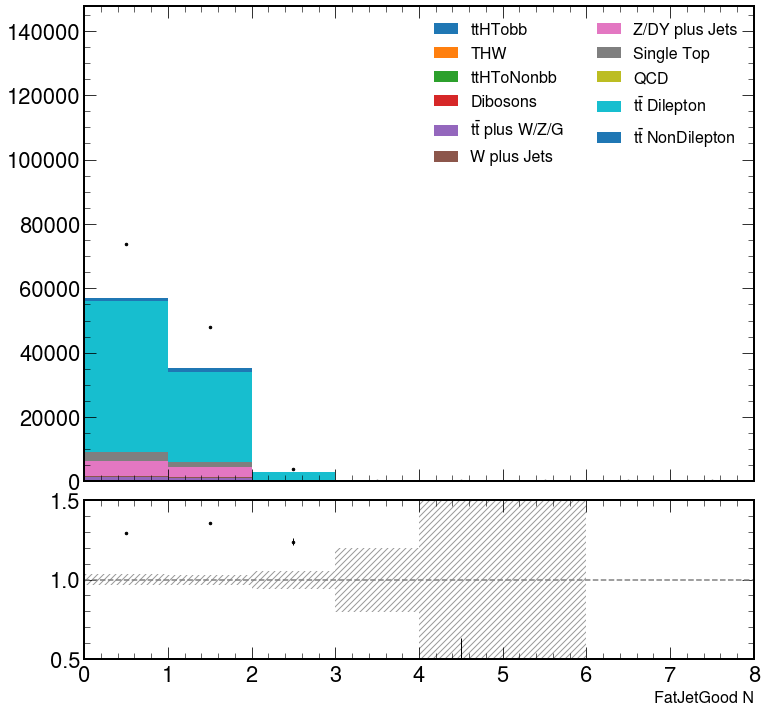

/tmp/rmccarth/ipykernel_2838565/2964248364.py:319: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(binCenters,signal_n[:-1]/bg_n[:-1],color="black",marker=".")


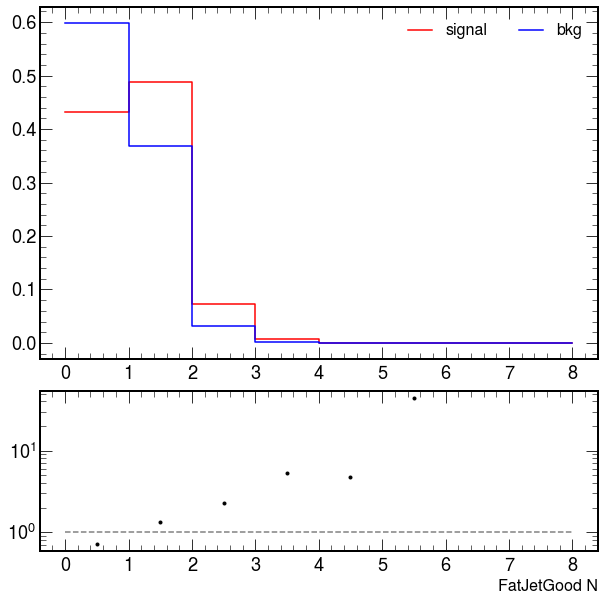

In [27]:
#User parameters
years = ["2018"]
#cats = ["baseline","ee","emu","mumu"]
cats = ["baseline"]
first_sample = 'TTTo2L2Nu' #any sample which contains all columns requested for plotting
vars = ["FatJetGood_N"] #columns to plot, leave empty for all columns
modifier = "pt_1" #which objects to plot per event, options are: 'pt_#' where # goes from 1 to N with 1 being the leading pt object
                  #                                              'max' which plots the highest value of the parameter per event
                  #                                              'all' which plots all values of the parameter per event

dataSamples = []
for sample in o['columns'].keys():
    if 'DATA' in sample:
        dataSamples.append(sample)

for year in years:
    for cat in cats:
        if(not len(vars)):
            vars = o['columns'][first_sample+"__nominal"][getName(first_sample)][cat].keys()
        for var in vars:
            if(("weight" in var) or ("Idx" in var) or ("Ttbar" in var)):
                continue
            print(year, cat, var)
            col = var.split("_")[0]
            if ("Combination" in var) or ("tau21" in var) or ("tau32" in var) or ("tau31" in var) or ("tau43" in var):
                continue
            quantity = var.split("_")[1]
            all_MC = {}
            all_weight = {}
            for label, samples in parameters_dump['plotting_style']['samples_groups'].items():
                label = parameters_dump['plotting_style']['labels_mc'].get(label, label)
                label_data = []
                label_weight = {}
                for sample in samples:
                    weight = {}
                    ttbb_weight = {}
                    name = getName(sample)
                    if(("V2" in var) and ("v7" in name)):
                        data = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][var[:-2]].value)
                    else:
                        data = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][var].value)
                    
                    for weightVar in o['columns'][first_sample+"__nominal"][getName(first_sample)][cat].keys():          
                        if ("weight" in weightVar):
                            weight[weightVar] = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][weightVar].value)
                            weight[weightVar] = weight[weightVar] / o['sum_genweights'][name]
                    A = o['sum_genweights_ttB'][name]
                    if(sample=="TTTo2L2Nu"):
                        #print("sum nominal weights",ak.sum(weight["weight_nominal"]))
                        #print("genTtbarId tt",ak.from_numpy(o['columns'][sample+"__nominal"][name][cat]["events_genTtbarId"].value))
                        genTtbarId = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat]["events_genTtbarId"].value) % 100
                        #print("genTtbarId tt % 100",genTtbarId)
                        tt_ttb_mask = genTtbarId > 50
                        #print("tt_ttb_mask",tt_ttb_mask)
                        #print("nominal weight",weight["weight_nominal"])
                        #print("removed nominal weight sum",ak.sum(weight["weight_nominal"][tt_ttb_mask]))
                        C = ak.sum(weight["weight_nominal"][tt_ttb_mask])
                        for key in weight:
                            weight[key] = weight[key][~tt_ttb_mask]
                        if(("V2" in var) and ("v7" in name)):
                            ttbb_data = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][var[:-2]].value)
                        else:
                            ttbb_data = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][var].value)
                        #print("genTtbarId ttbb",ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat]["events_genTtbarId"].value))
                        genTtbarId = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat]["events_genTtbarId"].value) % 100
                        #print("genTtbarId ttbb % 100",genTtbarId)
                        ttbb_ttb_mask = genTtbarId > 50
                        #print("ttbb_ttb_mask",ttbb_ttb_mask)
                        B = o2['sum_genweights_ttB']['TTbbDiLeptonic_Powheg_2018']
                        #print("A",A)
                        #print("B",B)
                        #print('A/B',A/B)
                        #print("tt sum genweights",o['sum_genweights'][name])
                        #print("ttbb sum genweights",o2['sum_genweights']['TTbbDiLeptonic_Powheg_2018'])
                        for weightVar in o['columns'][first_sample+"__nominal"][getName(first_sample)][cat].keys():
                            if ("weight" in weightVar):
                                ttbb_weight[weightVar] = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][weightVar].value)
                                ttbb_weight[weightVar] = ttbb_weight[weightVar] / o2['sum_genweights']['TTbbDiLeptonic_Powheg_2018']
                                ttbb_weight[weightVar] = ttbb_weight[weightVar][ttbb_ttb_mask]
                                D = ak.sum(ttbb_weight[weightVar])
                                #if weightVar == "weight_nominal":
                                    #print("ttbb_weight",ttbb_weight[weightVar])
                                ttbb_weight[weightVar] = ttbb_weight[weightVar] * (C/D)
                                #ttbb_weight[weightVar] = ttbb_weight[weightVar] * (88.3419/831.76) * (A/o['sum_genweights'][name]) * (o2['sum_genweights']['TTbbDiLeptonic_Powheg_2018']/B)
                                #ttbb_weight[weightVar] = ttbb_weight[weightVar] * (A/B)
                                #if weightVar == "weight_nominal":
                                    #print("adding nominal weight sum",ak.sum(ttbb_weight[weightVar]))
                                    #print("ttbb_weight after reweighting",ttbb_weight[weightVar])
                                
                                
                        if(quantity!="N" and col!="events"):
                            colN = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_N"].value)
                            data = ak.unflatten(data,colN)
                            pt_data = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_pt"].value)
                            pt_data = ak.unflatten(pt_data,colN)
                            sortIndices = ak.argsort(pt_data,ascending=False)
                            data = data[sortIndices]
                            ttbb_colN = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][col+"_N"].value)
                            ttbb_data = ak.unflatten(ttbb_data,ttbb_colN)
                            ttbb_pt_data = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][col+"_pt"].value)
                            ttbb_pt_data = ak.unflatten(ttbb_pt_data,ttbb_colN)
                            sortIndices = ak.argsort(ttbb_pt_data,ascending=False)
                            ttbb_data = ttbb_data[sortIndices]
                            if "pt" in modifier:
                                index = int(modifier.split("_")[1]) - 1
                                ttbb_data = ak.mask(ttbb_data, ak.num(ttbb_data) > index)[:, index]
                                data = ak.mask(data, ak.num(data) > index)[:, index]
                            elif modifier=="max":
                                data = ak.max(data,axis=1)
                                ttbb_data = ak.max(ttbb_data,axis=1)
                        data = data[~tt_ttb_mask]
                        ttbb_data = ttbb_data[ttbb_ttb_mask]
                        data = ak.concatenate((data,ttbb_data),axis=0)
                        for key in weight:
                            weight[key] = ak.concatenate((weight[key],ttbb_weight[key]),axis=0)
                        
                        #print("sum nominal weights after merge",ak.sum(weight["weight_nominal"]))
                    elif(quantity!="N" and col!="events"):
                        colN = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_N"].value)
                        data = ak.unflatten(data,colN)
                        pt_data = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_pt"].value)
                        pt_data = ak.unflatten(pt_data,colN)
                        sortIndices = ak.argsort(pt_data,ascending=False)
                        data = data[sortIndices]
                        if "pt" in modifier:
                            index = int(modifier.split("_")[1]) - 1
                            data = ak.mask(data, ak.num(data) > index)[:, index]
                        elif modifier=="max":
                            data = ak.max(data,axis=1)
                    for key in weight:
                        weight[key], data = ak.broadcast_arrays(weight[key],data)
                        if(modifier=="all" and quantity!="N" and col!="events"):
                            weight[key] = ak.flatten(weight[key])
                    if(modifier=="all" and quantity!="N" and col!="events"): 
                        data = ak.flatten(data)
                    none_mask = ak.is_none(data)
                    data = data[~none_mask]
                    for key in weight:
                        weight[key] = weight[key][~none_mask]
                    inf_mask = np.isinf(data)
                    data = data[~inf_mask]
                    for key in weight:
                        weight[key] = weight[key][~inf_mask]
                    label_data = ak.concatenate((label_data,data),axis=0)
                    for key in weight:
                        if key not in label_weight:
                            label_weight[key] = []
                        label_weight[key] = ak.concatenate((label_weight[key],weight[key]),axis=0)
                all_MC[label] = label_data
                for key in label_weight:
                    if key not in all_weight:
                        all_weight[key] = {}
                    all_weight[key][label] = label_weight[key]
                
            bins, xmin, xmax, xlabel = getPlotParams(var)
            plt.style.use([hep.style.ROOT, {'font.size': 22}])
            f2, a2 = plt.subplots()
            if not ("Gen" in var) and not ("gen" in var):
                fig, (ax, rax) = plt.subplots(2, 1, figsize=[12,12], gridspec_kw={"height_ratios": [3,1]}, sharex=True)
                fig.subplots_adjust(hspace=0.06)
                if(bins==-1):
                    n, bin_edges, patches = ax.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()))
                else:
                    n, bin_edges, patches = ax.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()),bins=bins,range=(xmin,xmax))
                signal_n, signal_bins = np.histogram(all_MC["ttHTobb"],weights=all_weight["weight_nominal"]["ttHTobb"],bins=bin_edges)
                signal_mcstaterr2 = np.histogram(all_MC["ttHTobb"],weights=all_weight["weight_nominal"]["ttHTobb"]**2,bins=bin_edges)[0]
                bg_mcstaterr2 = 0
                bg_n = n[-1] - signal_n
                signal_n = signal_n / ak.sum(signal_n)
                bg_n = bg_n / ak.sum(bg_n)
                n_sys = {}
                for key in all_weight:
                    if "Down" in key:
                        continue
                    downString = key[:-2]+"Down"
                    err2_up_total = np.zeros_like(n[-1])
                    err2_down_total = np.zeros_like(n[-1])
                    for label in all_weight[key]:
                        if key=="weight_nominal":
                            mcstat_err2 = np.histogram(all_MC[label], bins=bin_edges, weights=all_weight[key][label]**2)[0]
                            #print(label,np.histogram(all_MC[label], bins=bin_edges, weights=all_weight[key][label])[0][3])
                            err2_up_total += mcstat_err2
                            err2_down_total += mcstat_err2
                            bg_mcstaterr2 += mcstat_err2
                        else:
                            hist_n_up, hist_bins_up = np.histogram(all_MC[label],weights=all_weight[key][label],bins=bin_edges)
                            hist_n_down, hist_bins_down = np.histogram(all_MC[label],weights=all_weight[downString][label],bins=bin_edges)
                            hist_n, hist_bins = np.histogram(all_MC[label],weights=all_weight["weight_nominal"][label],bins=bin_edges)
                            err_up = hist_n_up - hist_n
                            err_down = hist_n_down - hist_n
                            # Compute the flags to check which of the two variations (up and down) are pushing the nominal value up and down
                            up_is_up = err_up > 0
                            down_is_down = err_down < 0
                            # Compute the flag to check if the uncertainty is one-sided, i.e. when both variations are up or down
                            is_onesided = up_is_up ^ down_is_down
                            # Sum in quadrature of the systematic uncertainties taking into account if the uncertainty is one- or double-sided
                            err2_up_twosided = np.where(up_is_up, err_up**2, err_down**2)
                            err2_down_twosided = np.where(up_is_up, err_down**2, err_up**2)
                            err2_max = np.maximum(err2_up_twosided, err2_down_twosided)
                            err2_up_onesided = np.where(is_onesided & up_is_up, err2_max, 0)
                            err2_down_onesided = np.where(is_onesided & down_is_down, err2_max, 0)
                            err2_up_combined = np.where(is_onesided, err2_up_onesided, err2_up_twosided)
                            err2_down_combined = np.where(
                                is_onesided, err2_down_onesided, err2_down_twosided
                            )
                            err2_up_total += err2_up_combined
                            err2_down_total += err2_down_combined
                    n_sys[key] = err2_up_total
                    n_sys[downString] = err2_down_total
                ax.tick_params(axis='x', labelsize=22)
                ax.tick_params(axis='y', labelsize=22)
                ax.set_xlim(bin_edges[0],bin_edges[-1])
                #systematic error band
                err2_up = np.zeros_like(n[-1])
                err2_down = np.zeros_like(n[-1])
                for key in n_sys:
                    if "Down" in key:
                        continue
                    downString = key[:-2]+"Down"
                    err2_up += n_sys[key]
                    err2_down += n_sys[downString]
                up = n[-1] + np.sqrt(err2_up)
                down = n[-1] - np.sqrt(err2_down)
                ratio_up = np.where(n[-1] != 0, up / n[-1], 1)
                ratio_down = np.where(n[-1] != 0, down / n[-1], 1)
                unc_band = np.array([ratio_down, ratio_up])
                #print("ratio_up",ratio_up)
                #print("ratio_down",ratio_down)
                rax.fill_between(
                    bin_edges,
                    np.r_[unc_band[0], unc_band[0, -1]],
                    np.r_[unc_band[1], unc_band[1, -1]],
                    label="syst. unc.",
                    color= [0.,0.,0.,0.4],
                    facecolor= [0.,0.,0.,0.],
                    hatch= "////",
                    linewidth= 0,
                    step= 'post',
                    zorder= 2
                )
                rax.hlines(
                    1.0, *bin_edges[[0, -1]], colors='gray', linestyles='dashed'
                )
                
                ax.legend(ncol=2,loc="upper right",fontsize=16)
                plt.xlabel(xlabel,fontsize=16)
                nData = [0.0]*len(bin_edges[:-1])
                for sample in dataSamples:
                    for name in o['columns'][sample].keys():
                        data = ak.from_numpy(o['columns'][sample][name][cat][var].value)
                        if(quantity!="N" and col!="events"):
                            colN = ak.from_numpy(o['columns'][sample][name][cat][col+"_N"].value)
                            data = ak.unflatten(data,colN)  
                            pt_data = ak.from_numpy(o['columns'][sample][name][cat][col+"_pt"].value)
                            pt_data = ak.unflatten(pt_data,colN)
                            sortIndices = ak.argsort(pt_data,ascending=False)
                            data = data[sortIndices]
                            if "pt" in modifier:
                                index = int(modifier.split("_")[1]) - 1
                                data = ak.mask(data, ak.num(data) > index)[:, index]
                            elif modifier=="max":
                                data = ak.max(data,axis=1)
                        none_mask = ak.is_none(data)
                        data = data[~none_mask]
                        inf_mask = np.isinf(data)
                        data = data[~inf_mask]
                        if(modifier=="all" and quantity!="N" and col!="events"):
                            data = ak.flatten(data)
                        n_data, bin_edges_data, patches_data = a2.hist(data,bins=bin_edges)
                        nData += n_data
                error = np.sqrt(nData)
                binCenters = (bin_edges_data[:-1] + bin_edges_data[1:]) / 2
                ratio = nData/n[-1]
                ratio_error = error/n[-1]
                ratio_error[np.isnan(ratio_error)] = np.inf
                ax.errorbar(binCenters, nData, yerr=error,linestyle='solid',markersize=5.0,color='black',elinewidth=1,linewidth=0,marker='.')
                #ax.set_yscale("log")
                rax.errorbar(binCenters, ratio, yerr=ratio_error,linestyle='solid',markersize=5.0,color='black',elinewidth=1,linewidth=0,marker='.')
                rax.set_ylim((0.5, 1.5))
                rax.yaxis.set_label_coords(-0.075, 1)
                rax.tick_params(axis='x', labelsize=22)
                rax.tick_params(axis='y', labelsize=22)
                max_data = max(nData)
                max_MC = max(n[-1])
                if(max_data>max_MC):
                    ax.set_ylim((0, 2.0 * max_data))
                else:
                    ax.set_ylim((0, 2.0 * max_MC))
            else:
                f1, a1 = plt.subplots()
                if(bins==-1):
                    n, bin_edges, patches = a1.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()))
                else:
                    n, bin_edges, patches = a1.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()),bins=bins,range=(xmin,xmax))
                ax.legend(ncol=2,loc="upper right")
            
            plt.close(f2)
            if "pt" in modifier:
                stringMod = modifier.split("_")[1]
            else:
                stringMod = modifier
            filepath = f"hists_fixMerge/{year}/{cat}/{col}"
            if not os.path.exists(filepath):
                os.makedirs(filepath)
            plt.savefig(filepath+"/"+var+"_"+stringMod+".pdf")
            plt.show()
            plt.clf()
            plt.cla()
            binCenters = (bin_edges[:-1] + bin_edges[1:]) / 2
            bg_mcstaterr2 = bg_mcstaterr2 - signal_mcstaterr2
            plt.figure(1)
            ax1 = plt.subplot(3,1,(1,2))
            signal_n = np.append(signal_n,signal_n[-1])
            bg_n = np.append(bg_n,bg_n[-1])
            plt.step(bin_edges,signal_n,color="red",label="signal",where="post")
            plt.step(bin_edges,bg_n,color="blue",label="bkg",where="post")
            ax1.legend(ncol=2,loc="upper right",fontsize=16)
            ax2 = plt.subplot(3,1,3,sharex=ax1)
            plt.scatter(binCenters,signal_n[:-1]/bg_n[:-1],color="black",marker=".")
            ax2.hlines(
                    1.0, *bin_edges[[0, -1]], colors='gray', linestyles='dashed'
                )
            ax2.set_yscale("log")
            plt.xlabel(xlabel,fontsize=16)
            plt.show()
            plt.close()

In [40]:
colN_genjet = o['columns']['TTTo2L2Nu__nominal']['TTTo2L2Nu__2018']['baseline']['GenJet_N'].value
colN_genFatJet = o['columns']['TTTo2L2Nu__nominal']['TTTo2L2Nu__2018']['baseline']['GenFatJet_N'].value
genjet_hadron = ak.unflatten(o['columns']['TTTo2L2Nu__nominal']['TTTo2L2Nu__2018']['baseline']['GenJet_hadronFlavour'].value,colN_genjet)
genjet_parton = ak.unflatten(o['columns']['TTTo2L2Nu__nominal']['TTTo2L2Nu__2018']['baseline']['GenJet_partonFlavour'].value,colN_genjet)
genFatJet_hadron = ak.unflatten(o['columns']['TTTo2L2Nu__nominal']['TTTo2L2Nu__2018']['baseline']['GenFatJet_hadronFlavour'].value,colN_genFatJet)
genFatJet_parton = ak.unflatten(o['columns']['TTTo2L2Nu__nominal']['TTTo2L2Nu__2018']['baseline']['GenFatJet_partonFlavour'].value,colN_genFatJet)
id = o['columns']['TTTo2L2Nu__nominal']['TTTo2L2Nu__2018']['baseline']['events_genTtbarId'].value%100
for i in range(len(id)):
    if((ak.sum(genjet_hadron[i]==5)+ak.sum(genFatJet_hadron[i]==5))<=2):
        continue
    print("i",i)
    print("genjet hadron",genjet_hadron[i])
    print("genjet parton",genjet_parton[i])
    print("genFatJet hadron",genFatJet_hadron[i])
    print("genFatJet parton",genFatJet_parton[i])
    print("id",id[i])

i 1
genjet hadron [0, 0, 0, 5, 0, 0, 0, 5, 0]
genjet parton [2, 1, 0, 5, 21, 3, 21, -5, -3]
genFatJet hadron [5, 0, 0, 0, 0]
genFatJet parton [5, 2, 1, 0, 3]
id 0
i 2
genjet hadron [0, 0, 5, 0, 0, 5]
genjet parton [0, 0, 5, 2, 21, -5]
genFatJet hadron [5, 0]
genFatJet parton [5, 21]
id 0
i 3
genjet hadron [0, 5, 0, 5, 4, 0, 0, 0, 0, 0, 0]
genjet parton [21, -5, 1, 5, -4, 21, -2, -3, 21, 21, 0]
genFatJet hadron [0, 5, 0]
genFatJet parton [21, -5, 1]
id 41
i 4
genjet hadron [5, 0, 0, 5, 0, 0, 0]
genjet parton [5, 0, 21, -5, 21, 21, 21]
genFatJet hadron [5, 0]
genFatJet parton [5, 21]
id 0
i 5
genjet hadron [0, 5, 0, 0, 0, 0, 0, 5]
genjet parton [21, 5, 21, 0, 21, 0, 21, -5]
genFatJet hadron [0, 5]
genFatJet parton [21, 5]
id 0
i 7
genjet hadron [0, 5, 0, 5, 0, 0, 0]
genjet parton [0, -5, 21, 5, 21, 21, 21]
genFatJet hadron [0, 0, 5]
genFatJet parton [0, 21, -5]
id 0
i 8
genjet hadron [0, 5, 4, 0, 0, 0, 5, 0, 0]
genjet parton [0, -5, 5, 0, 21, 21, 5, 2, 3]
genFatJet hadron [4, 5]
genFatJe

genjet parton [0, 0, -5, 5, 4, -4, 21]
genFatJet hadron [5, 0]
genFatJet parton [5, 0]
id 43
i 133
genjet hadron [0, 5, 0, 5, 0]
genjet parton [0, -5, 0, 5, 1]
genFatJet hadron [0, 5, 0]
genFatJet parton [0, -5, 0]
id 0
i 135
genjet hadron [0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0]
genjet parton [2, 5, 0, -4, 21, 21, 21, -5, 0, 0, 0]
genFatJet hadron [0, 0, 5, 5]
genFatJet parton [2, 21, 5, -5]
id 0
i 136
genjet hadron [5, 0, 0, 5, 0, 0, 0, 0, 0]
genjet parton [-5, 2, 0, 5, 2, 0, -2, 21, 21]
genFatJet hadron [5, 5, 0]
genFatJet parton [-5, 5, 2]
id 0
i 137
genjet hadron [0, 5, 5, 0, 0, 4, 0, 0, 4, 0, 0, 0]
genjet parton [0, -5, 5, 21, 21, 4, -1, 21, 21, 21, 1, 0]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 141
genjet hadron [5, 0, 5, 0, 0]
genjet parton [5, 0, -5, 0, 21]
genFatJet hadron [5, 5, 0]
genFatJet parton [-5, 5, 21]
id 0
i 142
genjet hadron [5, 0, 0, 5, 0, 0, 0]
genjet parton [-5, 2, 0, 5, 0, 21, 1]
genFatJet hadron [5, 0]
genFatJet parton [-5, 2]
id 0
i 144
genjet hadron 

id 0
i 253
genjet hadron [5, 0, 0, 5, 0]
genjet parton [-5, 21, 21, 5, 0]
genFatJet hadron [5, 0]
genFatJet parton [-5, 21]
id 0
i 254
genjet hadron [5, 0, 5, 0, 0, 0, 0]
genjet parton [-5, 2, 5, 0, 0, 1, 21]
genFatJet hadron [5, 5, 0]
genFatJet parton [5, -5, 2]
id 0
i 255
genjet hadron [0, 0, 5, 5, 0, 0, 0]
genjet parton [0, 0, 5, -5, 21, 21, 21]
genFatJet hadron [0, 5]
genFatJet parton [0, 5]
id 0
i 256
genjet hadron [0, 0, 5, 5, 0]
genjet parton [0, 21, -5, 5, -3]
genFatJet hadron [5, 0]
genFatJet parton [-5, -2]
id 0
i 257
genjet hadron [5, 5, 0, 0, 0, 0]
genjet parton [-5, 5, 21, 0, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 258
genjet hadron [0, 0, 5, 5, 0, 0, 0]
genjet parton [-2, 21, 5, -5, 0, 0, 21]
genFatJet hadron [0, 0, 5]
genFatJet parton [-2, 21, 5]
id 0
i 260
genjet hadron [0, 5, 0, 5, 0, 0]
genjet parton [1, -5, 0, 5, 21, 0]
genFatJet hadron [0, 5]
genFatJet parton [1, -5]
id 0
i 261
genjet hadron [5, 5, 0, 0]
genjet parton [-5, 5, 21, 0]
genFatJet

id 51
i 391
genjet hadron [5, 5, 0, 0, 0, 4, 0, 0, 0, 0, 4]
genjet parton [5, -5, 0, 0, 21, -4, 21, 21, 21, 21, 4]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 41
i 392
genjet hadron [5, 0, 5, 0]
genjet parton [-5, 21, 5, 0]
genFatJet hadron [5, 0]
genFatJet parton [-5, 21]
id 0
i 393
genjet hadron [0, 5, 0, 0, 0, 0, 5]
genjet parton [21, -5, -1, 0, 2, 21, 5]
genFatJet hadron [0, 5]
genFatJet parton [21, -5]
id 0
i 394
genjet hadron [5, 0, 0, 0, 0, 0, 0, 5, 0, 0]
genjet parton [5, -1, 0, 1, -3, 21, 21, -5, 21, 21]
genFatJet hadron [5, 0]
genFatJet parton [5, -1]
id 0
i 395
genjet hadron [5, 0, 5, 0, 0, 0]
genjet parton [-5, 1, 5, 0, 0, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, 1]
id 0
i 396
genjet hadron [0, 5, 5, 0, 4, 0, 0, 0, 0, 0]
genjet parton [0, 5, -5, 4, -4, 0, 2, 21, 21, -3]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 42
i 397
genjet hadron [5, 0, 5, 0, 0, 0, 0, 0, 0]
genjet parton [-5, -3, 5, 0, 21, 21, 21, 21, 0]
genFatJet hadron [5, 0]
genFatJet parto

id 0
i 534
genjet hadron [0, 5, 5, 0, 0, 0, 0, 0]
genjet parton [2, -5, 5, 0, 21, 0, 21, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, 2]
id 0
i 535
genjet hadron [5, 5, 0, 0, 0, 0, 0, 0, 0]
genjet parton [5, -5, 0, 21, 21, 21, 21, 3, 21]
genFatJet hadron [5, 5, 0, 4]
genFatJet parton [5, -5, 21, -4]
id 0
i 536
genjet hadron [0, 0, 5, 0, 0, 0, 5, 0, 0]
genjet parton [21, 0, 5, 0, -1, 21, -5, 21, 21]
genFatJet hadron [0, 5, 0]
genFatJet parton [21, 5, 0]
id 0
i 537
genjet hadron [5, 0, 5, 0]
genjet parton [-5, 0, 5, -4]
genFatJet hadron [5]
genFatJet parton [-5]
id 0
i 538
genjet hadron [0, 5, 0, 0, 5, 0, 4, 0, 0, 0, 0, 0]
genjet parton [0, -5, 2, 21, 5, 21, 21, -1, 21, 21, 0, -3]
genFatJet hadron [5, 5, 0]
genFatJet parton [-5, 5, 2]
id 0
i 540
genjet hadron [4, 5, 0, 0, 0, 0, 5, 0, 0]
genjet parton [4, 5, 0, 0, -5, 21, -5, 21, -2]
genFatJet hadron [5, 4]
genFatJet parton [5, 4]
id 42
i 541
genjet hadron [0, 5, 0, 5, 0, 0, 0]
genjet parton [2, 5, 0, -5, 0, 1, 21]
genFatJet hadron [

genFatJet hadron [0, 0, 0, 0, 5]
genFatJet parton [2, 0, 21, 0, 5]
id 0
i 663
genjet hadron [5, 0, 0, 5, 0, 0]
genjet parton [-5, 21, 0, 5, 21, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, 21]
id 0
i 664
genjet hadron [5, 0, 0, 0, 5, 0, 0]
genjet parton [5, 0, 21, 21, -5, 0, 21]
genFatJet hadron [5, 0, 0]
genFatJet parton [5, 4, 21]
id 0
i 665
genjet hadron [0, 5, 5, 0, 0]
genjet parton [21, -5, 5, 0, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 666
genjet hadron [5, 0, 0, 0, 0, 5]
genjet parton [5, 21, 21, 0, 21, -5]
genFatJet hadron [5, 0]
genFatJet parton [5, 21]
id 0
i 667
genjet hadron [0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0]
genjet parton [-5, 5, 0, 21, 21, -5, 0, 21, 3, 21, 2, 0]
genFatJet hadron [5, 5, 0, 0]
genFatJet parton [5, -5, 21, 21]
id 0
i 668
genjet hadron [5, 5, 0, 0]
genjet parton [-5, 5, 0, 0]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 669
genjet hadron [5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0]
genjet parton [5, 21, 21, -5, 0, 21, 0, 21, 21, 

i 797
genjet hadron [0, 0, 5, 5, 0, 0, 0, 0]
genjet parton [3, 2, -5, 5, 0, 21, 21, 3]
genFatJet hadron [0, 0, 5]
genFatJet parton [3, 2, -5]
id 0
i 799
genjet hadron [5, 5, 0, 0, 4, 0, 5, 0, 4, 5]
genjet parton [5, -5, -4, 0, 21, 21, 5, 21, 0, -5]
genFatJet hadron [5, 5, 0]
genFatJet parton [-5, -5, -4]
id 51
i 800
genjet hadron [5, 0, 5, 0]
genjet parton [5, 0, -5, 0]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 801
genjet hadron [5, 0, 5, 0, 0, 0, 0, 0]
genjet parton [-5, 0, 5, 21, 0, 21, 21, 0]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 802
genjet hadron [0, 0, 5, 5, 0, 0, 0]
genjet parton [0, 0, -5, 5, 21, 21, 21]
genFatJet hadron [5]
genFatJet parton [-5]
id 0
i 803
genjet hadron [5, 5, 0, 0, 0, 0]
genjet parton [-5, 5, 2, 2, 0, 0]
genFatJet hadron [5, 0]
genFatJet parton [-5, 2]
id 0
i 805
genjet hadron [0, 5, 0, 0, 0, 5, 0]
genjet parton [0, 5, 0, 2, 21, -5, 21]
genFatJet hadron [4, 5]
genFatJet parton [0, 5]
id 0
i 806
genjet hadron [0, 0, 5, 0, 5, 0, 0, 0, 0,

i 940
genjet hadron [0, 5, 5, 5, 0, 0, 0, 4, 5, 4, 0]
genjet parton [21, 5, 5, -5, 21, 21, 0, -4, -5, 4, 21]
genFatJet hadron [0, 5]
genFatJet parton [21, 5]
id 41
i 943
genjet hadron [5, 0, 0, 5, 0, 0, 0]
genjet parton [-5, 0, 0, 5, 21, 0, 0]
genFatJet hadron [5, 0]
genFatJet parton [-5, 0]
id 0
i 946
genjet hadron [0, 5, 0, 0, 5, 0]
genjet parton [-2, -5, 0, 0, 5, 1]
genFatJet hadron [5, 0]
genFatJet parton [-5, -2]
id 0
i 947
genjet hadron [0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0]
genjet parton [21, 2, -5, 0, 2, 0, 21, 5, 0, 21, 21]
genFatJet hadron [5, 0, 0]
genFatJet parton [-5, 2, 21]
id 0
i 948
genjet hadron [5, 0, 0, 5, 0, 0, 0, 0]
genjet parton [-5, 0, 0, 5, 21, 21, 21, 0]
genFatJet hadron [5, 0]
genFatJet parton [-5, 21]
id 0
i 949
genjet hadron [0, 0, 5, 0, 0, 5, 4, 0, 0, 0]
genjet parton [21, 0, -5, 21, 21, 5, 4, 2, 21, 0]
genFatJet hadron [5, 0]
genFatJet parton [-5, 21]
id 0
i 952
genjet hadron [0, 5, 0, 0, 5, 0, 0]
genjet parton [1, 5, 0, 0, -5, 21, 21]
genFatJet hadron [0, 5, 0

i 1011
genjet hadron [0, 0, 5, 0, 5, 0, 0]
genjet parton [21, 0, -5, 21, 5, 0, 0]
genFatJet hadron [0, 5]
genFatJet parton [21, 5]
id 0
i 1012
genjet hadron [5, 0, 5, 0, 0, 0, 0, 0]
genjet parton [-5, 0, 5, 0, 21, 21, 21, 3]
genFatJet hadron [5]
genFatJet parton [-5]
id 0
i 1013
genjet hadron [0, 5, 0, 0, 5, 0]
genjet parton [2, -5, 0, 0, 5, 21]
genFatJet hadron [0, 5]
genFatJet parton [2, -5]
id 0
i 1014
genjet hadron [0, 0, 5, 0, 5, 0, 0, 0, 0]
genjet parton [21, 0, 5, 0, -5, 21, 21, 21, -1]
genFatJet hadron [5, 0]
genFatJet parton [5, 21]
id 0
i 1015
genjet hadron [5, 0, 5, 0, 0, 0]
genjet parton [5, 0, -5, 21, 21, -2]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 1016
genjet hadron [5, 0, 0, 5, 0, 0, 0]
genjet parton [5, 1, 0, -5, 0, 1, 21]
genFatJet hadron [5, 0]
genFatJet parton [5, 1]
id 0
i 1018
genjet hadron [0, 0, 0, 5, 5]
genjet parton [0, 2, -1, 5, -5]
genFatJet hadron [0, 5]
genFatJet parton [0, -5]
id 0
i 1019
genjet hadron [0, 5, 0, 0, 0, 5, 0, 0]
genjet parton [2, -5

genjet parton [5, 0, 0, -5, 21]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 1153
genjet hadron [5, 0, 0, 0, 0, 5, 0, 0, 0]
genjet parton [5, 2, 0, 0, 2, -5, 21, 1, -2]
genFatJet hadron [5, 0]
genFatJet parton [5, 2]
id 0
i 1155
genjet hadron [0, 0, 5, 0, 0, 0, 5, 0, 0]
genjet parton [21, -3, 5, 21, 0, 21, -5, 0, 21]
genFatJet hadron [0, 0, 5, 0]
genFatJet parton [21, -3, 5, 21]
id 0
i 1156
genjet hadron [0, 5, 0, 0, 5, 0, 0, 0]
genjet parton [21, 5, 21, 21, -5, 0, 1, -2]
genFatJet hadron [0, 5]
genFatJet parton [21, 5]
id 0
i 1158
genjet hadron [5, 0, 0, 0, 0, 0, 5, 0, 0, 0]
genjet parton [-5, 0, 21, 0, 21, 21, 5, 21, 21, 0]
genFatJet hadron [5, 0]
genFatJet parton [-5, 21]
id 0
i 1159
genjet hadron [0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0]
genjet parton [21, -5, 0, 0, 21, 5, 1, 0, 2, 0, 0, 21]
genFatJet hadron [0, 5]
genFatJet parton [21, -5]
id 0
i 1160
genjet hadron [0, 0, 5, 5, 0, 0, 0]
genjet parton [0, 0, 5, -5, 2, 0, 21]
genFatJet hadron [5, 0]
genFatJet parton [5, 0]
id 0
i 116

genjet parton [0, -5, 0, 5, 21, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, 0]
id 0
i 1286
genjet hadron [5, 0, 0, 5]
genjet parton [5, 0, 0, -5]
genFatJet hadron [5, 0]
genFatJet parton [5, 21]
id 0
i 1287
genjet hadron [5, 0, 0, 0, 5, 0]
genjet parton [5, 0, 0, 21, -5, 21]
genFatJet hadron [5, 0]
genFatJet parton [5, 0]
id 0
i 1288
genjet hadron [0, 0, 0, 5, 0, 0, 0, 0, 4]
genjet parton [21, 1, 21, -5, 0, 0, 2, 5, 4]
genFatJet hadron [0, 0, 5, 5]
genFatJet parton [21, 1, -5, 5]
id 0
i 1289
genjet hadron [5, 4, 0, 0, 4, 5, 0, 0, 0, 0]
genjet parton [-5, -4, 0, 0, 4, 5, -3, 2, 21, 21]
genFatJet hadron [5, 4, 0]
genFatJet parton [-5, -4, 21]
id 43
i 1290
genjet hadron [0, 5, 0, 5, 0, 0, 0, 0]
genjet parton [0, 5, 21, -5, 0, -1, -1, 0]
genFatJet hadron [0, 5]
genFatJet parton [0, 5]
id 0
i 1291
genjet hadron [0, 0, 5, 0, 5, 0, 0]
genjet parton [0, 21, 5, 21, -5, 21, 0]
genFatJet hadron [5, 0]
genFatJet parton [-5, 21]
id 0
i 1292
genjet hadron [0, 0, 5, 0, 0, 0, 5]
genjet parton [2

genjet parton [-5, 0, 5, 0, -4, -1, 21, 21, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, 0]
id 41
i 1416
genjet hadron [0, 5, 0, 0, 0, 5]
genjet parton [0, -5, 0, 21, -2, 5]
genFatJet hadron [5, 0]
genFatJet parton [-5, 21]
id 0
i 1418
genjet hadron [5, 0, 0, 0, 0, 5, 0]
genjet parton [-5, 21, 0, 0, 21, 5, 3]
genFatJet hadron [5, 0, 0]
genFatJet parton [-5, 21, 21]
id 0
i 1419
genjet hadron [0, 5, 0, 0, 0, 0, 5, 0, 0, 0]
genjet parton [21, 5, 0, 1, 0, 2, -5, 21, 3, 21]
genFatJet hadron [0, 5, 0, 0]
genFatJet parton [21, 5, 0, 1]
id 0
i 1420
genjet hadron [0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0]
genjet parton [0, -5, 0, 21, 21, 21, 5, -1, 21, 1, 3]
genFatJet hadron [5, 0]
genFatJet parton [-5, 21]
id 0
i 1421
genjet hadron [5, 0, 5, 0, 0, 4, 0, 0]
genjet parton [-5, 0, 5, 2, 0, 4, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 1423
genjet hadron [0, 5, 0, 5, 0]
genjet parton [0, 5, 0, -5, 21]
genFatJet hadron [5, 0]
genFatJet parton [5, 0]
id 0
i 1425
genjet hadron [5, 0,

genjet hadron [0, 5, 0, 0, 0, 5, 0, 0, 0, 0]
genjet parton [0, 5, 21, 21, 0, -5, 21, 21, 1, -1]
genFatJet hadron [0, 0, 5]
genFatJet parton [21, 21, 5]
id 0
i 1561
genjet hadron [5, 0, 0, 5, 0, 0]
genjet parton [5, 0, 21, -5, 21, 21]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 1562
genjet hadron [0, 5, 5, 0, 0, 0, 0]
genjet parton [0, 5, -5, 0, 21, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 1563
genjet hadron [0, 5, 0, 5, 0]
genjet parton [0, -5, 0, 5, 2]
genFatJet hadron [5]
genFatJet parton [-5]
id 0
i 1564
genjet hadron [0, 0, 5, 0, 5, 4, 0]
genjet parton [0, 21, -5, 21, 5, -4, 0]
genFatJet hadron [5, 0, 5, 0]
genFatJet parton [5, 21, -5, 21]
id 42
i 1565
genjet hadron [4, 0, 5, 0, 5, 0, 0, 0, 0, 0]
genjet parton [4, 0, 5, 21, -5, 0, 21, 21, 21, 21]
genFatJet hadron [4, 5]
genFatJet parton [4, -5]
id 42
i 1566
genjet hadron [5, 0, 0, 0, 0, 5, 0, 4]
genjet parton [-5, -2, 0, 21, 21, 5, 21, 4]
genFatJet hadron [5, 0]
genFatJet parton [-5, -2]
id 0
i 1567
genj

i 1631
genjet hadron [4, 0, 0, 0, 5, 0, 5, 0]
genjet parton [2, 0, 0, 21, -5, 21, 5, 21]
genFatJet hadron [5, 0]
genFatJet parton [5, 0]
id 0
i 1633
genjet hadron [5, 0, 0, 0, 0, 0, 5, 0]
genjet parton [5, 21, 0, 0, 21, 21, -5, 21]
genFatJet hadron [5, 0]
genFatJet parton [5, 21]
id 0
i 1634
genjet hadron [0, 5, 5, 0, 0, 0, 0, 0]
genjet parton [0, -5, 5, 21, 21, 1, 21, 2]
genFatJet hadron [5]
genFatJet parton [-5]
id 0
i 1635
genjet hadron [5, 0, 0, 5]
genjet parton [5, 0, 0, -5]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 1636
genjet hadron [0, 5, 5, 0, 0, 0, 0, 0, 0]
genjet parton [-4, 5, -5, 1, 0, 21, 21, 21, 2]
genFatJet hadron [0, 5, 5]
genFatJet parton [-4, 5, -5]
id 0
i 1637
genjet hadron [0, 0, 0, 0, 5, 0, 0, 5]
genjet parton [0, 2, 0, 21, -5, 21, 5, 5]
genFatJet hadron [0, 5]
genFatJet parton [0, 5]
id 0
i 1638
genjet hadron [5, 5, 0, 0, 0, 0]
genjet parton [5, -5, 21, 0, 21, 0]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 1639
genjet hadron [5, 0, 5, 0, 0, 0, 

i 1770
genjet hadron [5, 5, 0, 0, 0]
genjet parton [-5, 5, 0, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 1771
genjet hadron [0, 5, 5, 0, 0, 0]
genjet parton [0, 5, -5, 0, 21, 21]
genFatJet hadron [0, 5, 5]
genFatJet parton [0, -5, 5]
id 0
i 1772
genjet hadron [0, 0, 0, 5, 5, 0, 0, 0, 0, 0]
genjet parton [0, 21, 0, 5, -5, 21, 3, 21, 21, 21]
genFatJet hadron [0, 0, 0, 5]
genFatJet parton [0, 21, 2, 5]
id 0
i 1773
genjet hadron [0, 5, 0, 5, 0, 5, 0, 5]
genjet parton [21, -5, 0, -5, 21, 5, 0, 5]
genFatJet hadron [5, 5, 5, 0]
genFatJet parton [5, -5, -5, 0]
id 51
i 1774
genjet hadron [5, 0, 5, 0, 0, 0, 0]
genjet parton [5, 0, -5, 21, 0, 2, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 1775
genjet hadron [0, 0, 0, 5, 0, 0, 5, 0, 0]
genjet parton [1, 21, 21, 5, 21, 21, -5, 21, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, 1]
id 0
i 1776
genjet hadron [0, 5, 0, 0, 5, 5, 0, 0, 0, 0]
genjet parton [21, 5, -3, 21, -5, 5, 0, 0, 21, 21]
genFatJet hadron [0, 5,

genjet hadron [0, 5, 5, 0, 0, 0, 0, 0, 0, 0]
genjet parton [21, -5, 5, 21, 0, 21, 2, 21, 21, 2]
genFatJet hadron [0, 5]
genFatJet parton [21, -5]
id 0
i 1907
genjet hadron [0, 5, 5, 0, 0, 0]
genjet parton [21, 5, -5, 0, 21, -1]
genFatJet hadron [0, 5]
genFatJet parton [21, 5]
id 0
i 1908
genjet hadron [5, 0, 5, 0, 0, 4, 0, 0]
genjet parton [-5, 0, 5, 0, 21, -4, -1, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, -1]
id 0
i 1909
genjet hadron [0, 0, 0, 5, 0, 5, 4]
genjet parton [-1, 21, 0, -5, 0, 5, 4]
genFatJet hadron [0, 5, 4]
genFatJet parton [-1, -5, 4]
id 42
i 1910
genjet hadron [5, 0, 5, 0, 0]
genjet parton [-5, 0, 5, 0, 2]
genFatJet hadron [5]
genFatJet parton [-5]
id 0
i 1911
genjet hadron [0, 5, 5, 0, 5, 0]
genjet parton [0, 5, -5, 2, 5, 0]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 51
i 1912
genjet hadron [5, 5, 0, 0, 4]
genjet parton [-5, 5, 0, 0, 4]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 1915
genjet hadron [0, 5, 0, 5, 0, 0, 0]
genjet parton [0, -

genFatJet parton [21, 5, 1]
id 41
i 2041
genjet hadron [5, 5, 0, 0, 0, 0]
genjet parton [-5, 5, 0, 21, 0, 21]
genFatJet hadron [5, 5, 0]
genFatJet parton [5, -5, 21]
id 0
i 2042
genjet hadron [5, 0, 0, 0, 5, 0, 0, 0, 0]
genjet parton [5, 0, 21, 0, -5, 1, 21, -3, 21]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 2043
genjet hadron [5, 5, 0, 0, 0]
genjet parton [5, -5, 0, 0, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 2044
genjet hadron [0, 0, 5, 5, 0, 0, 0]
genjet parton [0, 0, -5, 5, 21, 21, 3]
genFatJet hadron [0, 5]
genFatJet parton [3, -5]
id 0
i 2046
genjet hadron [0, 0, 5, 0, 5, 0, 0]
genjet parton [0, 2, -5, 0, 5, 21, 21]
genFatJet hadron [5, 0, 5]
genFatJet parton [5, 2, -5]
id 0
i 2047
genjet hadron [5, 0, 0, 5, 0, 0, 0]
genjet parton [-5, 0, -4, 5, 21, 21, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, 21]
id 0
i 2051
genjet hadron [0, 0, 0, 5, 5, 0, 0, 0]
genjet parton [21, 0, 21, -5, 5, 21, 0, 1]
genFatJet hadron [0, 5]
genFatJet parton [21, -5]
id 0
i 

genjet parton [-5, 5, 21, 0, 0, 21, 21, 21, 21]
genFatJet hadron [5]
genFatJet parton [-5]
id 0
i 2176
genjet hadron [0, 5, 0, 5, 0]
genjet parton [0, 5, 0, -5, 21]
genFatJet hadron [5, 0]
genFatJet parton [5, 0]
id 0
i 2177
genjet hadron [0, 0, 5, 0, 0, 5, 0, 0, 0, 0]
genjet parton [21, 0, 5, 2, 0, -5, -2, 21, 21, 21]
genFatJet hadron [0, 0, 5]
genFatJet parton [21, 2, 5]
id 0
i 2180
genjet hadron [0, 5, 5, 0, 0, 0, 0, 0, 0]
genjet parton [0, -5, 5, 0, 21, 21, 21, 21, 21]
genFatJet hadron [0, 5, 5, 0]
genFatJet parton [2, 5, -5, 21]
id 0
i 2181
genjet hadron [0, 0, 5, 5, 0, 0, 0, 0]
genjet parton [21, 0, -5, 5, 21, 0, -3, -4]
genFatJet hadron [0, 0, 5, 5]
genFatJet parton [-4, 0, -5, 5]
id 0
i 2184
genjet hadron [5, 5, 0, 0, 0, 0, 4, 4]
genjet parton [-5, 5, 21, 0, 21, 3, 4, -4]
genFatJet hadron [5, 5, 0, 4]
genFatJet parton [-5, 5, 21, 21]
id 43
i 2185
genjet hadron [5, 0, 5, 0, 0, 0, 0, 0, 0, 0]
genjet parton [-5, 2, 5, 21, 0, 0, 21, 21, 0, 21]
genFatJet hadron [5, 0, 5, 0]
genFatJe

id 0
i 2303
genjet hadron [0, 5, 5, 0, 0, 0]
genjet parton [0, -5, 5, 0, 21, 21]
genFatJet hadron [0, 5]
genFatJet parton [21, -5]
id 0
i 2304
genjet hadron [5, 5, 0, 0, 0, 4, 4, 0, 0, 0]
genjet parton [-5, 5, 0, 21, 0, 4, -4, 21, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 41
i 2308
genjet hadron [5, 0, 0, 0, 5, 0, 0, 0, 0]
genjet parton [5, 0, 21, 21, -5, 21, 21, 1, -1]
genFatJet hadron [5, 0]
genFatJet parton [5, -5]
id 0
i 2310
genjet hadron [4, 4, 0, 4, 0, 5, 5, 0]
genjet parton [4, 0, 0, -4, 21, -5, 5, -1]
genFatJet hadron [4, 5]
genFatJet parton [-4, -5]
id 43
i 2311
genjet hadron [5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0]
genjet parton [5, 21, 0, -5, 21, 21, 1, 21, 21, 3, 2, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 2312
genjet hadron [0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
genjet parton [21, 5, -5, 21, 0, 0, -2, 21, 3, 21, 2, 0]
genFatJet hadron [0, 5, 5]
genFatJet parton [21, 5, -5]
id 0
i 2313
genjet hadron [5, 5, 0, 0, 0, 0, 0, 0, 0]
genjet parton [

i 2418
genjet hadron [5, 5, 0, 0, 0, 0, 0, 0, 0]
genjet parton [-5, 5, 0, 21, 0, 21, 21, 21, 0]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 2419
genjet hadron [0, 0, 5, 0, 5, 0, 0]
genjet parton [2, 0, 5, 21, -5, 0, 21]
genFatJet hadron [0, 5]
genFatJet parton [2, 5]
id 0
i 2420
genjet hadron [5, 5, 5, 0, 0, 0, 0]
genjet parton [-5, 5, -5, 0, 21, 0, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 52
i 2422
genjet hadron [4, 5, 5, 0, 5, 5, 0, 0, 5]
genjet parton [5, 5, 5, 0, -5, 5, 0, 2, -5]
genFatJet hadron [5]
genFatJet parton [5]
id 53
i 2423
genjet hadron [5, 5, 0, 0, 0, 5, 0, 0, 0]
genjet parton [-5, 5, 0, 0, -1, -5, 21, 2, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 51
i 2424
genjet hadron [5, 0, 4, 0, 5]
genjet parton [5, 0, -4, 0, -5]
genFatJet hadron [5, 0, 4]
genFatJet parton [5, 0, -4]
id 41
i 2425
genjet hadron [0, 0, 5, 0, 0, 5, 0, 0, 0, 0]
genjet parton [2, 1, 5, 0, 0, -5, 21, 1, -1, 21]
genFatJet hadron [0, 5, 5]
genFatJet parton [2, -5, 5]

genFatJet hadron [5, 5, 0, 5]
genFatJet parton [-5, 5, -1, 5]
id 51
i 2542
genjet hadron [5, 0, 0, 0, 0, 5]
genjet parton [5, 0, 0, -2, 21, -5]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 2543
genjet hadron [5, 0, 0, 5, 0, 0]
genjet parton [-5, 0, 0, 5, 1, 21]
genFatJet hadron [5]
genFatJet parton [-5]
id 0
i 2544
genjet hadron [5, 0, 0, 0, 0, 0, 5, 0, 0, 0]
genjet parton [5, 0, 21, 21, 0, 21, -5, 21, 21, 21]
genFatJet hadron [5, 0, 0]
genFatJet parton [5, 0, 21]
id 0
i 2545
genjet hadron [0, 5, 0, 5, 0, 4, 0, 0]
genjet parton [-4, 5, 0, -5, 0, 4, -3, 2]
genFatJet hadron [4, 5]
genFatJet parton [4, 5]
id 41
i 2547
genjet hadron [5, 0, 5, 0, 0, 0, 0, 0]
genjet parton [-5, 21, 5, 0, -1, 21, 1, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 2548
genjet hadron [5, 0, 5, 0, 0, 0, 0]
genjet parton [-5, 0, 5, 21, 0, 21, 1]
genFatJet hadron [5]
genFatJet parton [-5]
id 0
i 2550
genjet hadron [5, 5, 0, 0, 0, 0, 0, 0]
genjet parton [-5, 5, 0, 0, 21, 21, 21, 21]
genFatJet hadron

i 2672
genjet hadron [5, 0, 0, 0, 5, 0, 4, 0]
genjet parton [5, 0, 21, 0, -5, 21, 4, 0]
genFatJet hadron [5, 0, 0, 5]
genFatJet parton [5, 21, 0, -5]
id 0
i 2674
genjet hadron [0, 4, 5, 0, 0, 0, 0, 0, 0]
genjet parton [21, 21, 5, 21, 0, -2, 21, 21, 21]
genFatJet hadron [5, 5, 0]
genFatJet parton [5, -5, 21]
id 0
i 2675
genjet hadron [0, 0, 5, 5, 0, 0]
genjet parton [0, 1, 5, -5, 0, 2]
genFatJet hadron [5, 0, 5]
genFatJet parton [-5, 1, 5]
id 0
i 2676
genjet hadron [5, 5, 0, 0, 0, 0, 0]
genjet parton [5, -5, 0, 21, 2, -2, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 2677
genjet hadron [5, 0, 4, 5, 0, 0, 0]
genjet parton [-5, 0, 5, 5, 0, -1, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 2678
genjet hadron [5, 0, 0, 5, 0, 4, 4]
genjet parton [5, 0, 0, -5, 21, 4, -4]
genFatJet hadron [0, 5, 0, 5]
genFatJet parton [21, 5, 0, -5]
id 0
i 2679
genjet hadron [0, 5, 0, 5, 0]
genjet parton [0, -5, 0, 5, -2]
genFatJet hadron [5, 0]
genFatJet parton [-5, -2]
id 0
i 2680

id 0
i 2811
genjet hadron [0, 0, 5, 0, 0, 5, 0]
genjet parton [21, 0, 5, 0, 21, -5, 21]
genFatJet hadron [5]
genFatJet parton [-5]
id 0
i 2812
genjet hadron [5, 4, 0, 0, 0, 5, 0, 0]
genjet parton [-5, 21, 2, 0, 21, 5, 0, 21]
genFatJet hadron [5, 0, 4]
genFatJet parton [-5, 2, 21]
id 41
i 2813
genjet hadron [5, 0, 0, 5]
genjet parton [5, 0, 0, -5]
genFatJet hadron [5, 0]
genFatJet parton [5, 0]
id 0
i 2814
genjet hadron [0, 5, 5, 0]
genjet parton [0, 5, -5, 0]
genFatJet hadron [0, 5]
genFatJet parton [0, 5]
id 0
i 2815
genjet hadron [0, 5, 0, 0, 5, 0, 0, 0]
genjet parton [2, -5, 21, 21, 5, 0, 0, 21]
genFatJet hadron [0, 5, 5]
genFatJet parton [2, -5, 5]
id 0
i 2817
genjet hadron [5, 0, 5, 0, 0, 0, 0]
genjet parton [-5, 0, 5, 21, 21, 21, 21]
genFatJet hadron [5]
genFatJet parton [-5]
id 0
i 2818
genjet hadron [0, 0, 5, 5, 0, 4, 4, 0, 0]
genjet parton [2, 0, 5, -5, 0, -4, 4, 21, 0]
genFatJet hadron [0, 0, 5, 5]
genFatJet parton [2, 0, 5, -5]
id 41
i 2819
genjet hadron [5, 0, 0, 5, 0, 0, 0

genFatJet hadron [4, 0, 5]
genFatJet parton [4, 0, -5]
id 0
i 2954
genjet hadron [0, 5, 0, 0, 5, 0, 0, 0, 0]
genjet parton [2, 5, 0, 21, -5, 0, 21, 21, 21]
genFatJet hadron [0, 5]
genFatJet parton [2, 5]
id 0
i 2955
genjet hadron [0, 5, 0, 0, 0, 0, 5, 0]
genjet parton [2, -5, 0, 0, 3, 21, 5, 21]
genFatJet hadron [0, 5]
genFatJet parton [2, -5]
id 0
i 2956
genjet hadron [5, 4, 0, 4, 0, 0, 0, 0, 0, 5, 0]
genjet parton [-5, -4, 0, 21, 0, 21, 21, 21, 21, 5, 2]
genFatJet hadron [5, 4]
genFatJet parton [-5, -4]
id 44
i 2957
genjet hadron [5, 0, 5, 0, 0, 0]
genjet parton [-5, 0, 5, 0, 21, -2]
genFatJet hadron [5, 0]
genFatJet parton [-5, 0]
id 0
i 2958
genjet hadron [5, 5, 0, 0, 0, 0, 0]
genjet parton [-5, 5, 0, 0, 21, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 2961
genjet hadron [0, 0, 0, 5, 0, 0, 0, 5]
genjet parton [2, 0, 0, -5, 21, 21, 21, 5]
genFatJet hadron [5, 5, 0]
genFatJet parton [5, -5, 0]
id 0
i 2962
genjet hadron [5, 0, 0, 0, 0, 5, 0, 0, 0]
genjet parton [-5,

i 3088
genjet hadron [0, 0, 5, 0, 0, 0, 5]
genjet parton [1, 0, -5, 0, 21, 21, 5]
genFatJet hadron [0, 5]
genFatJet parton [1, -5]
id 0
i 3089
genjet hadron [0, 5, 0, 5, 5, 0]
genjet parton [0, 5, 0, -5, -5, 21]
genFatJet hadron [0]
genFatJet parton [0]
id 51
i 3090
genjet hadron [0, 5, 0, 0, 5, 0, 0]
genjet parton [0, 5, 21, 0, -5, 21, 21]
genFatJet hadron [0, 5]
genFatJet parton [0, 5]
id 0
i 3091
genjet hadron [5, 5, 0, 0, 0]
genjet parton [5, -5, 0, 21, 0]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 3092
genjet hadron [0, 4, 0, 5, 0, 0, 5, 0, 0]
genjet parton [21, 4, 2, 5, 0, 21, -5, 21, 0]
genFatJet hadron [0, 4, 0, 5, 0, 0]
genFatJet parton [21, 4, 2, 5, 0, 21]
id 41
i 3093
genjet hadron [0, 0, 5, 5, 0, 0, 0, 0, 0]
genjet parton [2, 2, 5, -5, 0, 0, 21, 0, 21]
genFatJet hadron [0, 5, 0]
genFatJet parton [2, 5, 2]
id 0
i 3094
genjet hadron [0, 0, 5, 5, 5, 4]
genjet parton [0, 0, 5, -5, -5, 4]
genFatJet hadron [0, 5]
genFatJet parton [21, 5]
id 51
i 3095
genjet hadron [0

i 3218
genjet hadron [5, 0, 0, 0, 0, 5, 0]
genjet parton [-5, 1, 0, 21, 0, 5, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, 1]
id 0
i 3219
genjet hadron [0, 0, 0, 0, 5, 5, 0, 0]
genjet parton [21, 21, 0, 0, -5, 5, 21, 21]
genFatJet hadron [0, 0, 0, 0, 5]
genFatJet parton [21, 21, 21, 21, -5]
id 0
i 3222
genjet hadron [5, 5, 0, 0, 4, 0, 0]
genjet parton [-5, 5, 0, 0, 21, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 42
i 3223
genjet hadron [5, 0, 5, 0, 0]
genjet parton [-5, 0, 5, 0, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 3224
genjet hadron [5, 0, 0, 5, 0, 0, 0]
genjet parton [-5, 21, 0, 5, 0, 0, 0]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 3225
genjet hadron [5, 5, 0, 0, 0]
genjet parton [5, -5, 0, 0, 2]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 3226
genjet hadron [5, 5, 0, 0, 0, 0, 0, 0, 0, 0]
genjet parton [-5, 5, 0, 21, 0, 21, 21, 21, 21, 0]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 3227
genjet hadron [5

i 3355
genjet hadron [0, 5, 5, 0, 0, 0, 0, 0]
genjet parton [1, 5, -5, 0, 21, 21, 21, 1]
genFatJet hadron [0, 5]
genFatJet parton [1, 5]
id 0
i 3356
genjet hadron [5, 0, 5, 0, 0, 0, 0]
genjet parton [-5, 0, 5, 21, 0, 21, -1]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 3357
genjet hadron [5, 0, 5, 0, 0, 0, 0]
genjet parton [5, 0, -5, 21, 0, 21, 21]
genFatJet hadron [5, 0]
genFatJet parton [5, 0]
id 0
i 3358
genjet hadron [0, 0, 5, 5, 0, 0, 0]
genjet parton [2, 1, 5, -5, 0, 0, 21]
genFatJet hadron [5, 0, 0, 5]
genFatJet parton [5, 2, 1, -5]
id 0
i 3360
genjet hadron [5, 0, 5, 0, 0, 0]
genjet parton [5, 0, -5, 21, 21, 21]
genFatJet hadron [5, 0]
genFatJet parton [5, 21]
id 0
i 3361
genjet hadron [5, 0, 0, 4, 0, 0, 0]
genjet parton [-5, -2, 0, 21, -4, 0, 21]
genFatJet hadron [5, 5, 0]
genFatJet parton [-5, 5, 0]
id 41
i 3362
genjet hadron [5, 5, 0, 0, 0, 0]
genjet parton [5, -5, 0, 0, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 3363
genjet hadron [0, 5, 0, 0

i 3497
genjet hadron [5, 5, 0, 0, 0, 0]
genjet parton [-5, 5, 0, 0, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 3498
genjet hadron [5, 0, 5, 0, 0, 0, 0, 0]
genjet parton [-5, 1, 5, 0, 21, 0, 1, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 3501
genjet hadron [0, 0, 0, 5, 0, 5, 0, 0, 0]
genjet parton [21, 21, 3, -5, 0, 5, 21, 21, -3]
genFatJet hadron [0, 0, 0, 5, 5]
genFatJet parton [21, 21, 3, -5, 5]
id 0
i 3502
genjet hadron [0, 0, 0, 0, 5, 0, 0, 5, 0]
genjet parton [1, 2, 21, 21, -5, 0, 21, 5, -1]
genFatJet hadron [0, 0, 5, 0]
genFatJet parton [1, 2, 5, 21]
id 0
i 3504
genjet hadron [5, 0, 5, 0, 0, 0, 0]
genjet parton [5, 21, -5, 0, 0, 21, 2]
genFatJet hadron [5, 0]
genFatJet parton [5, 21]
id 0
i 3505
genjet hadron [0, 0, 0, 0, 5, 5, 0, 0, 0]
genjet parton [21, 0, 1, 2, 5, -5, 21, 21, -1]
genFatJet hadron [0, 5]
genFatJet parton [21, -5]
id 0
i 3507
genjet hadron [0, 5, 0, 0, 0, 5, 0, 0]
genjet parton [21, -5, 5, 0, 0, 5, 2, 21]
genFatJet hadron [0,

genFatJet hadron [0, 5, 5]
genFatJet parton [21, 5, -5]
id 0
i 3569
genjet hadron [0, 0, 0, 0, 0, 5, 5]
genjet parton [0, 21, 2, 21, 5, -5, 5]
genFatJet hadron [5, 0, 0]
genFatJet parton [5, 21, 2]
id 0
i 3570
genjet hadron [0, 5, 0, 0, 4, 0, 5]
genjet parton [-5, 5, 0, 0, 4, 1, -5]
genFatJet hadron [5]
genFatJet parton [-5]
id 42
i 3572
genjet hadron [5, 5, 0, 0, 0, 0]
genjet parton [-5, 5, 0, 0, 21, 21]
genFatJet hadron [5]
genFatJet parton [-5]
id 0
i 3573
genjet hadron [5, 0, 0, 5, 0, 0, 0, 0]
genjet parton [-5, 0, 0, 5, 21, 21, 21, 21]
genFatJet hadron [5, 0, 5]
genFatJet parton [-5, 0, 5]
id 0
i 3574
genjet hadron [0, 5, 0, 5, 0]
genjet parton [0, -5, 0, 5, -2]
genFatJet hadron [5, 5, 0]
genFatJet parton [5, -5, 0]
id 0
i 3575
genjet hadron [0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0]
genjet parton [0, 0, 21, 21, 5, -5, 21, -2, 21, 21, 2]
genFatJet hadron [5, 0, 0]
genFatJet parton [5, 21, 0]
id 0
i 3576
genjet hadron [0, 5, 5, 0, 0, 4, 0, 0]
genjet parton [21, 5, -5, 0, 0, 21, 21, 21]
genF

genFatJet parton [21, 5, 21]
id 0
i 3701
genjet hadron [0, 5, 0, 5, 0, 0, 0, 0]
genjet parton [-2, 5, 0, -5, 0, 0, 21, 21]
genFatJet hadron [0, 5]
genFatJet parton [-2, 5]
id 0
i 3703
genjet hadron [0, 0, 4, 5, 0, 0, 5, 0, 0]
genjet parton [21, 0, 3, -5, 3, 21, 5, 0, 2]
genFatJet hadron [5, 4, 4]
genFatJet parton [-5, 4, -4]
id 41
i 3705
genjet hadron [5, 0, 0, 0, 5, 0]
genjet parton [-5, 0, 1, 0, 5, 0]
genFatJet hadron [5, 0]
genFatJet parton [-5, 0]
id 0
i 3706
genjet hadron [5, 0, 0, 5, 0]
genjet parton [-5, 0, 0, 5, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 3707
genjet hadron [5, 5, 0, 0, 0, 0, 0]
genjet parton [5, -5, 0, 21, 21, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 3708
genjet hadron [5, 5, 0, 0, 0]
genjet parton [5, -5, 0, 0, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 3709
genjet hadron [5, 0, 0, 0, 5, 0, 0, 0, 0]
genjet parton [5, 0, 21, 21, -5, 0, 21, 21, 21]
genFatJet hadron [5, 5, 0]
genFatJet parton [5, -5, 21]
id

genjet hadron [5, 5, 0, 0, 0, 0, 0, 0, 0, 0]
genjet parton [5, -5, 1, 3, 0, -3, 0, 1, -1, -2]
genFatJet hadron [5, 5, 0, 0]
genFatJet parton [5, -5, 1, 3]
id 0
i 3767
genjet hadron [5, 0, 0, 5, 0, 0, 0]
genjet parton [-5, 0, 0, 5, 21, 21, -3]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 3768
genjet hadron [5, 5, 0, 0, 0, 0]
genjet parton [-5, 5, 0, 0, 1, 21]
genFatJet hadron [5, 5, 0]
genFatJet parton [-5, 5, 1]
id 0
i 3769
genjet hadron [0, 5, 0, 0, 0, 5, 0, 0, 0]
genjet parton [0, -5, 21, 0, 21, 5, 21, 21, -2]
genFatJet hadron [0, 0, 5]
genFatJet parton [21, 21, -5]
id 0
i 3770
genjet hadron [0, 5, 5, 0, 0, 0, 0]
genjet parton [0, -5, 5, 21, 0, 21, 21]
genFatJet hadron [0, 5]
genFatJet parton [0, -5]
id 0
i 3774
genjet hadron [5, 4, 0, 5, 0, 4, 0]
genjet parton [5, -4, 0, -5, 0, 4, 21]
genFatJet hadron [5, 4]
genFatJet parton [5, 4]
id 0
i 3775
genjet hadron [0, 0, 5, 5, 0, 0, 0, 5, 0, 0]
genjet parton [0, 0, -5, 5, 2, -2, 3, 5, 21, 21]
genFatJet hadron [5, 0]
genFatJet pa

genFatJet hadron [5, 4]
genFatJet parton [-5, 4]
id 41
i 3835
genjet hadron [5, 5, 0, 0, 0]
genjet parton [5, -5, 0, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 3836
genjet hadron [5, 0, 0, 5, 0, 0, 0, 0, 0]
genjet parton [-5, 0, 0, 5, 21, 21, 21, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 3837
genjet hadron [0, 5, 5, 0, 0, 0, 0, 0]
genjet parton [0, 5, -5, 0, 21, 21, 21, 21]
genFatJet hadron [5, 0]
genFatJet parton [5, 0]
id 0
i 3838
genjet hadron [0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0]
genjet parton [1, -5, 0, 0, -2, 21, 21, 5, 21, 21, 0]
genFatJet hadron [5, 5, 0]
genFatJet parton [5, -5, 0]
id 0
i 3839
genjet hadron [5, 5, 0, 0, 0, 0, 0, 4, 0]
genjet parton [-5, 5, 21, 21, 0, 21, 0, 4, 3]
genFatJet hadron [5, 5, 0]
genFatJet parton [-5, 5, 21]
id 0
i 3840
genjet hadron [5, 0, 5, 0, 0, 0]
genjet parton [5, 1, -5, 0, 0, 0]
genFatJet hadron [5, 0]
genFatJet parton [5, 1]
id 0
i 3841
genjet hadron [5, 0, 0, 5]
genjet parton [-5, 0, 0, 5]
genFatJet had

genFatJet parton [21, 5, -5, 0]
id 0
i 3899
genjet hadron [0, 5, 4, 5, 0, 0, 0, 0]
genjet parton [0, 5, -4, -5, 21, 0, 21, 0]
genFatJet hadron [5, 0, 4]
genFatJet parton [5, 0, -4]
id 42
i 3901
genjet hadron [0, 5, 0, 5, 0, 0, 0, 0, 0]
genjet parton [21, 5, 0, -5, 0, 21, 21, -2, 2]
genFatJet hadron [0, 5, 0, 5, 0]
genFatJet parton [21, 5, 0, -5, 0]
id 0
i 3902
genjet hadron [0, 5, 5, 0, 0, 0, 0, 0]
genjet parton [21, 5, -5, -3, 0, 21, 21, -2]
genFatJet hadron [0, 5, 5]
genFatJet parton [21, 5, -5]
id 0
i 3903
genjet hadron [5, 0, 0, 0, 0, 0, 0, 5, 0]
genjet parton [5, 0, 0, 2, 21, 21, 21, -5, 21]
genFatJet hadron [5, 0, 0]
genFatJet parton [5, 21, 2]
id 0
i 3904
genjet hadron [0, 5, 0, 0, 5, 0, 0, 0, 0, 0]
genjet parton [2, 5, 4, -4, -5, 0, 21, 21, 21, 2]
genFatJet hadron [5, 0]
genFatJet parton [5, 2]
id 0
i 3905
genjet hadron [0, 0, 0, 0, 5, 0, 5, 0]
genjet parton [1, 21, 2, 0, 5, 1, -5, 21]
genFatJet hadron [0, 5, 0, 0, 0]
genFatJet parton [1, 5, 21, 2, 1]
id 0
i 3906
genjet hadron 

genFatJet hadron [0, 5]
genFatJet parton [2, -5]
id 0
i 3966
genjet hadron [0, 0, 5, 0, 0, 0, 5, 0]
genjet parton [21, 21, -5, 21, 0, 1, 5, 21]
genFatJet hadron [0, 0, 5]
genFatJet parton [21, 21, -5]
id 0
i 3967
genjet hadron [0, 0, 5, 0, 0, 5, 0, 0]
genjet parton [1, 2, -5, 5, 0, 5, 21, 21]
genFatJet hadron [5, 0, 0, 5]
genFatJet parton [-5, 1, 2, 5]
id 0
i 3968
genjet hadron [0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 0, 0, 0]
genjet parton [21, 21, 0, -3, 5, 21, -5, 21, 5, 21, 2, 21, 21]
genFatJet hadron [0, 5]
genFatJet parton [21, 5]
id 0
i 3969
genjet hadron [5, 0, 5, 0, 0, 0]
genjet parton [5, 0, -5, 0, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 3970
genjet hadron [5, 0, 0, 0, 5, 0]
genjet parton [5, 0, 0, 21, -5, 21]
genFatJet hadron [5, 4]
genFatJet parton [5, 21]
id 0
i 3971
genjet hadron [0, 5, 5, 0, 0, 0]
genjet parton [21, 5, -5, 21, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 3972
genjet hadron [0, 5, 0, 0, 5, 0]
genjet parton [0, 5, 0, 21, -5

i 4101
genjet hadron [0, 5, 0, 0, 5, 0]
genjet parton [21, 5, -2, 0, -5, -3]
genFatJet hadron [0, 5]
genFatJet parton [21, 5]
id 0
i 4102
genjet hadron [0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0]
genjet parton [1, 21, -5, 5, 21, 21, 0, 2, 0, 21, 2]
genFatJet hadron [0, 0, 0, 5, 5]
genFatJet parton [1, 21, 21, -5, 5]
id 0
i 4103
genjet hadron [5, 5, 0, 0, 0]
genjet parton [5, -5, 0, 21, 3]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 4104
genjet hadron [0, 0, 0, 5, 0, 5, 0, 0, 0, 0]
genjet parton [2, 0, 21, 5, 0, -5, 21, 21, 21, 0]
genFatJet hadron [0, 0, 0, 5]
genFatJet parton [2, 2, 21, 5]
id 0
i 4105
genjet hadron [4, 5, 0, 0, 0, 0, 5, 4]
genjet parton [4, 5, 0, 0, 2, 21, -5, -4]
genFatJet hadron [4, 5, 0, 0, 0]
genFatJet parton [4, 5, 0, 0, 2]
id 41
i 4106
genjet hadron [0, 5, 0, 0, 0, 5, 0, 4]
genjet parton [21, -5, 21, 0, 0, 5, 21, -4]
genFatJet hadron [0, 5]
genFatJet parton [21, -5]
id 0
i 4107
genjet hadron [0, 5, 5, 5, 0, 0]
genjet parton [-1, -5, -5, 5, 0, 0]
genFatJet hadro

genFatJet parton [21, -5]
id 0
i 4170
genjet hadron [5, 0, 0, 0, 5, 0, 0]
genjet parton [-5, -3, 21, 0, 5, 21, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, -3]
id 0
i 4171
genjet hadron [0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0]
genjet parton [21, 21, -5, 0, 21, 21, 0, 21, 5, -1, -1, 0, -4]
genFatJet hadron [0, 5, 0]
genFatJet parton [-2, -5, 4]
id 0
i 4172
genjet hadron [0, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0]
genjet parton [0, 21, -5, 21, 5, 0, 1, 21, 21, 21, 21]
genFatJet hadron [5, 0, 0]
genFatJet parton [-5, 21, 21]
id 0
i 4173
genjet hadron [5, 5, 0, 0, 0, 0, 0]
genjet parton [5, -5, 0, 0, 21, 2, 21]
genFatJet hadron [5, 0, 5]
genFatJet parton [5, 21, -5]
id 0
i 4176
genjet hadron [5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
genjet parton [5, -5, 2, 0, 21, 0, 21, 21, -1, 21, -2]
genFatJet hadron [5, 5, 0]
genFatJet parton [5, -5, 2]
id 0
i 4178
genjet hadron [5, 0, 0, 5, 4, 0, 0, 0]
genjet parton [5, 0, 0, -5, -4, 21, 21, 21]
genFatJet hadron [5, 0, 5]
genFatJet parton [5, -2, -5]
id 41
i 4179
g

genjet parton [0, -5, 21, 5, -5, 0, 5]
genFatJet hadron [0, 5, 0, 5]
genFatJet parton [0, -5, 21, 5]
id 0
i 4310
genjet hadron [0, 5, 0, 5, 0, 0, 0, 0, 0]
genjet parton [21, 5, 21, -5, 21, 21, 4, 21, -2]
genFatJet hadron [4, 5, 0]
genFatJet parton [-4, 5, 21]
id 0
i 4311
genjet hadron [5, 5, 0, 0, 0, 0]
genjet parton [5, -5, 0, 0, 21, 0]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 4312
genjet hadron [0, 5, 0, 0, 5, 0]
genjet parton [4, 5, 21, 21, -5, 21]
genFatJet hadron [4, 5]
genFatJet parton [4, 5]
id 0
i 4314
genjet hadron [5, 0, 0, 5, 0]
genjet parton [-5, 0, 0, 5, 2]
genFatJet hadron [5, 0]
genFatJet parton [-5, 0]
id 0
i 4315
genjet hadron [0, 5, 0, 0, 0, 5, 0, 0]
genjet parton [0, 5, 5, 21, 0, -5, 21, 3]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 4316
genjet hadron [0, 5, 5, 0, 0, 0]
genjet parton [21, 5, -5, 0, 21, 21]
genFatJet hadron [0, 5]
genFatJet parton [21, 5]
id 0
i 4318
genjet hadron [0, 0, 5, 5, 0, 0, 0, 0, 0]
genjet parton [0, 21, -5, 5, 2, 21, 21, 21, 21

genFatJet parton [-5, -2, 2]
id 0
i 4442
genjet hadron [5, 0, 0, 0, 5]
genjet parton [-5, 0, 21, 0, 5]
genFatJet hadron [5, 0]
genFatJet parton [-5, 21]
id 0
i 4443
genjet hadron [5, 0, 0, 5, 0, 0, 0, 0, 0, 0]
genjet parton [-5, 0, 0, 5, 21, 21, 21, 21, 1, 3]
genFatJet hadron [5, 0]
genFatJet parton [-5, 21]
id 0
i 4444
genjet hadron [5, 0, 0, 0, 0, 0, 5, 0, 0, 0]
genjet parton [-5, 21, 1, 0, 0, -2, 5, 21, 21, 21]
genFatJet hadron [5, 5, 0]
genFatJet parton [-5, 5, 1]
id 0
i 4445
genjet hadron [5, 0, 0, 0, 0, 4, 5, 0]
genjet parton [-5, 0, 0, 21, 21, 4, 5, 21]
genFatJet hadron [5]
genFatJet parton [-5]
id 41
i 4446
genjet hadron [0, 5, 0, 0, 0, 0, 5, 0, 0]
genjet parton [0, -5, 21, 21, -2, 21, 5, 1, 21]
genFatJet hadron [0, 5]
genFatJet parton [0, -5]
id 0
i 4449
genjet hadron [0, 5, 0, 0, 0, 5, 0, 0]
genjet parton [21, -5, 0, 0, 21, 5, 21, 21]
genFatJet hadron [0, 5, 0]
genFatJet parton [-4, -5, 0]
id 0
i 4450
genjet hadron [0, 0, 0, 5, 0, 5, 5, 0, 5]
genjet parton [21, 0, 0, -5, 21, 

genjet parton [21, 5, 0, -5, 0]
genFatJet hadron [0, 5]
genFatJet parton [21, 5]
id 0
i 4569
genjet hadron [0, 5, 4, 5]
genjet parton [-1, 5, 5, -5]
genFatJet hadron [5, 0, 5]
genFatJet parton [5, -1, -5]
id 42
i 4570
genjet hadron [5, 0, 0, 5, 0]
genjet parton [5, 0, 0, -5, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 4571
genjet hadron [0, 5, 0, 0, 0, 0, 5, 0, 0]
genjet parton [5, -5, 0, 21, 0, 21, 5, 3, 21]
genFatJet hadron [5, 5, 0]
genFatJet parton [5, -5, 21]
id 0
i 4572
genjet hadron [5, 0, 0, 5, 4, 0, 0, 0, 0]
genjet parton [5, 0, 0, -5, 4, -4, 21, 21, 0]
genFatJet hadron [5, 4]
genFatJet parton [5, -4]
id 41
i 4573
genjet hadron [5, 0, 0, 0, 5, 0]
genjet parton [5, 0, 0, 21, -5, 21]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 4574
genjet hadron [0, 0, 5, 0, 0, 5, 0, 0, 0, 0]
genjet parton [1, 2, 5, 21, 21, -5, 0, 0, 21, 21]
genFatJet hadron [0, 0, 5, 0]
genFatJet parton [1, 2, 5, 21]
id 0
i 4575
genjet hadron [0, 0, 0, 5, 0, 5, 5, 0, 0]
genjet parton [0, 21

genFatJet parton [-5, 0]
id 0
i 4636
genjet hadron [0, 5, 0, 5, 0]
genjet parton [21, 5, 0, -5, 0]
genFatJet hadron [0, 5, 0]
genFatJet parton [21, 5, 0]
id 0
i 4637
genjet hadron [5, 0, 0, 5, 0, 0, 0, 0]
genjet parton [5, 0, 0, -5, 21, 21, -1, 0]
genFatJet hadron [5, 5, 0]
genFatJet parton [5, -5, 21]
id 0
i 4638
genjet hadron [5, 0, 0, 0, 0, 0, 0]
genjet parton [-5, 0, 0, 5, 21, 2, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 4639
genjet hadron [4, 5, 0, 5, 0, 0, 4]
genjet parton [4, 5, 0, -5, 0, -3, -4]
genFatJet hadron [5, 4]
genFatJet parton [5, -4]
id 42
i 4640
genjet hadron [0, 5, 0, 0, 5, 0]
genjet parton [21, 5, 0, 21, -5, 21]
genFatJet hadron [0, 5]
genFatJet parton [21, 5]
id 0
i 4641
genjet hadron [5, 5, 0, 0, 0, 0, 0]
genjet parton [5, -5, 0, 21, 0, -4, 21]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 4642
genjet hadron [5, 4, 0, 5, 4, 0, 0, 0]
genjet parton [-5, 4, 0, 5, -4, 0, 21, 21]
genFatJet hadron [5, 4, 0]
genFatJet parton [-5, -4, -4]
id 43
i 464

genjet parton [-5, 0, 5, 0, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, 0]
id 0
i 4768
genjet hadron [0, 5, 0, 5, 0]
genjet parton [0, -5, 21, 5, 0]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 4769
genjet hadron [0, 5, 0, 0, 0, 0, 5, 0]
genjet parton [2, 5, 2, 0, 21, 0, -5, 21]
genFatJet hadron [0, 5, 0]
genFatJet parton [2, 5, 2]
id 0
i 4770
genjet hadron [5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0]
genjet parton [-5, 3, 0, 5, 21, 21, -3, 21, 21, 21, 0]
genFatJet hadron [5]
genFatJet parton [-5]
id 0
i 4771
genjet hadron [0, 5, 5, 0, 0, 0]
genjet parton [0, -5, 5, 0, 2, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 4772
genjet hadron [0, 0, 5, 5, 0, 0, 0, 0]
genjet parton [21, 0, 5, -5, 21, 21, 21, 0]
genFatJet hadron [0, 0, 5, 5]
genFatJet parton [21, 0, 5, -5]
id 0
i 4773
genjet hadron [0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0]
genjet parton [2, 2, -5, 21, 0, 0, 5, 21, 21, 0, 0]
genFatJet hadron [0, 0, 5, 0]
genFatJet parton [21, 2, -5, 2]
id 0
i 4774
genjet hadron [0, 0

i 4902
genjet hadron [5, 0, 0, 0, 5, 0, 5, 0, 0, 0]
genjet parton [5, 21, 21, 0, -5, 0, 5, 21, 21, 21]
genFatJet hadron [5, 0, 0]
genFatJet parton [5, 21, 21]
id 52
i 4903
genjet hadron [0, 0, 5, 0, 5, 0]
genjet parton [0, -3, -5, 0, 5, 5]
genFatJet hadron [0, 0, 5]
genFatJet parton [5, 0, -5]
id 0
i 4904
genjet hadron [0, 0, 5, 5, 0, 0, 0, 0]
genjet parton [2, 0, 5, -5, 0, 21, 21, 0]
genFatJet hadron [0, 5, 5]
genFatJet parton [2, -5, 5]
id 0
i 4905
genjet hadron [0, 0, 0, 0, 5, 0, 0, 5]
genjet parton [1, 0, 0, -2, 5, 0, 21, -5]
genFatJet hadron [5, 0]
genFatJet parton [-5, 0]
id 0
i 4906
genjet hadron [5, 0, 5, 0, 0, 0, 0]
genjet parton [-5, 0, 5, 0, 21, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 4907
genjet hadron [5, 5, 0, 0, 0, 0, 0, 0, 0]
genjet parton [-5, 5, 21, 0, 21, 21, 21, 21, 0]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 4908
genjet hadron [0, 0, 5, 5, 0]
genjet parton [0, 0, -5, 5, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0

genFatJet parton [3, 0]
id 0
i 5040
genjet hadron [0, 0, 0, 5, 0, 5, 0, 4, 0, 0, 0, 0]
genjet parton [0, 21, 1, 5, 21, -5, 3, -4, 21, 21, 21, 21]
genFatJet hadron [0, 5]
genFatJet parton [0, 5]
id 42
i 5041
genjet hadron [5, 0, 0, 5, 0, 0, 0, 0]
genjet parton [-5, 21, 0, 5, 21, 21, 21, 2]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 5042
genjet hadron [0, 0, 5, 5, 0]
genjet parton [21, 0, 5, -5, 0]
genFatJet hadron [5, 0]
genFatJet parton [5, 21]
id 0
i 5043
genjet hadron [5, 5, 0, 0, 0]
genjet parton [5, -5, 0, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 5046
genjet hadron [5, 0, 0, 5, 0, 0, 0]
genjet parton [-5, 21, 0, 5, 21, 21, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, 21]
id 0
i 5047
genjet hadron [0, 5, 0, 0, 5]
genjet parton [3, 5, 0, 0, -5]
genFatJet hadron [0, 5, 0]
genFatJet parton [3, 5, 0]
id 0
i 5048
genjet hadron [0, 5, 0, 5, 0]
genjet parton [21, -5, 3, 5, 0]
genFatJet hadron [0, 5, 5]
genFatJet parton [21, -5, 5]
id 0
i 5049
genjet

genFatJet parton [-5, -5]
id 52
i 5174
genjet hadron [0, 0, 0, 5, 0, 5, 0, 0, 0, 4, 0, 0, 0]
genjet parton [0, 21, 21, -5, 21, 5, 0, 21, -2, -4, 0, 21, 0]
genFatJet hadron [5, 0, 0]
genFatJet parton [-5, 21, 21]
id 0
i 5176
genjet hadron [5, 0, 5, 0, 0, 0, 0]
genjet parton [-5, 0, 5, 0, 21, 21, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, 0]
id 0
i 5178
genjet hadron [5, 0, 0, 0, 4, 5]
genjet parton [-5, 0, 0, 21, 4, 5]
genFatJet hadron [5, 4, 0]
genFatJet parton [-5, 4, 21]
id 0
i 5179
genjet hadron [5, 0, 0, 5, 4, 0, 0, 0, 0, 0]
genjet parton [5, 0, 21, -5, 21, 21, 2, 21, 0, 0]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 41
i 5180
genjet hadron [5, 5, 0, 0, 0, 0]
genjet parton [-5, 5, 0, 0, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 5181
genjet hadron [5, 0, 5, 0, 0, 0]
genjet parton [-5, 0, 5, 0, 2, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, 21]
id 0
i 5183
genjet hadron [0, 0, 5, 5, 0, 0, 0, 0, 0]
genjet parton [0, 0, -5, 5, 21, 21, 21, 21, 

genjet parton [5, -5, 21, 0, 21, -1, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 5305
genjet hadron [0, 5, 5, 0, 0, 0]
genjet parton [0, -5, 5, 0, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 5306
genjet hadron [0, 5, 0, 0, 0, 5, 0]
genjet parton [2, 5, 0, 0, 2, -5, 21]
genFatJet hadron [5, 0, 0]
genFatJet parton [5, 2, 0]
id 0
i 5307
genjet hadron [0, 0, 5, 0, 5, 0, 0, 0, 0, 0]
genjet parton [2, 0, -5, 21, 5, 0, 3, 21, -3, 21]
genFatJet hadron [0, 0, 5, 0]
genFatJet parton [2, 0, -5, 21]
id 0
i 5309
genjet hadron [5, 5, 0, 0, 0]
genjet parton [-5, 5, 0, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 5310
genjet hadron [0, 5, 0, 5, 0, 0]
genjet parton [2, -5, 0, 5, 0, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, 2]
id 0
i 5311
genjet hadron [0, 5, 5, 0]
genjet parton [0, 5, -5, 0]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 5312
genjet hadron [5, 0, 0, 0, 5, 5]
genjet parton [-5, 21, 0, 21, 5, 5]
genFatJet hadron [5, 

genjet hadron [5, 5, 0, 0, 0]
genjet parton [-5, 5, 21, 0, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 5431
genjet hadron [0, 0, 0, 5, 0, 0, 5, 0, 0]
genjet parton [2, 21, -1, 5, 0, 0, -5, 21, 21]
genFatJet hadron [0, 0, 0, 5]
genFatJet parton [2, 21, -1, 5]
id 0
i 5432
genjet hadron [0, 0, 5, 0, 0, 0, 5, 0, 4, 0]
genjet parton [0, 21, 5, 21, -1, 0, -5, 21, 4, 1]
genFatJet hadron [5, 0, 5, 0]
genFatJet parton [-5, 1, 5, 21]
id 0
i 5433
genjet hadron [0, 5, 0, 5, 0, 0]
genjet parton [0, -5, 0, 5, 21, 3]
genFatJet hadron [0, 5, 0]
genFatJet parton [0, -5, 0]
id 0
i 5435
genjet hadron [0, 0, 5, 5, 0, 0]
genjet parton [21, 0, 5, -5, 0, 2]
genFatJet hadron [0, 5]
genFatJet parton [21, 5]
id 0
i 5436
genjet hadron [0, 5, 5, 5, 0, 0, 0, 0, 0, 0]
genjet parton [3, 5, -5, 5, 0, 0, 21, 21, 21, 21]
genFatJet hadron [0, 5]
genFatJet parton [3, 5]
id 51
i 5437
genjet hadron [0, 0, 0, 0, 5, 0, 5, 0, 0, 0, 0]
genjet parton [1, 21, 0, 21, -5, 0, 5, 21, -3, 21, 21]
genFatJet hadron [0, 

i 5550
genjet hadron [0, 5, 0, 5, 0, 0, 0]
genjet parton [21, -5, 21, 5, 0, 2, 21]
genFatJet hadron [0, 5]
genFatJet parton [21, -5]
id 0
i 5551
genjet hadron [0, 0, 5, 5, 0, 5, 0, 0, 5, 0]
genjet parton [21, 2, -5, -5, 21, 5, 0, 0, 5, 21]
genFatJet hadron [0, 0, 5, 5]
genFatJet parton [2, 21, -5, -5]
id 0
i 5553
genjet hadron [5, 0, 0, 0, 0, 0, 0, 5, 4, 4]
genjet parton [5, 1, 0, 0, 21, 21, 21, -5, -4, 4]
genFatJet hadron [5, 0]
genFatJet parton [5, 1]
id 43
i 5554
genjet hadron [0, 5, 0, 0, 5, 0, 0]
genjet parton [21, 5, 0, 0, -5, -3, 3]
genFatJet hadron [0, 5]
genFatJet parton [21, 5]
id 0
i 5555
genjet hadron [0, 0, 5, 0, 0, 5, 0, 0]
genjet parton [2, 0, -5, 21, 0, 5, -2, 21]
genFatJet hadron [0, 5, 5, 0]
genFatJet parton [2, 5, -5, 0]
id 0
i 5556
genjet hadron [0, 5, 5, 0, 0, 0]
genjet parton [0, 5, -5, 0, 21, -1]
genFatJet hadron [0, 5]
genFatJet parton [21, 5]
id 0
i 5557
genjet hadron [0, 5, 0, 5, 0, 0]
genjet parton [21, 5, 0, -5, 0, 21]
genFatJet hadron [0, 5, 0]
genFatJet pa

genFatJet parton [5, -5]
id 0
i 5678
genjet hadron [5, 0, 0, 4, 0, 0, 0, 0, 5, 0]
genjet parton [5, 21, 0, 4, 2, 21, 21, 21, -5, 2]
genFatJet hadron [5, 0]
genFatJet parton [5, 21]
id 41
i 5679
genjet hadron [5, 0, 0, 0, 0, 0, 0, 5, 0, 0]
genjet parton [-5, 21, 0, 21, 0, 2, 21, 5, -1, 21]
genFatJet hadron [0, 5, 0, 0]
genFatJet parton [21, -5, 21, 21]
id 0
i 5681
genjet hadron [5, 0, 5, 0, 0, 0, 0]
genjet parton [-5, 0, 5, 0, 21, 1, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 5682
genjet hadron [0, 0, 0, 5, 5, 0, 0, 0, 0]
genjet parton [1, 0, 0, 5, -5, 2, 21, 21, 21]
genFatJet hadron [0, 0, 0, 5]
genFatJet parton [1, 0, 1, 5]
id 0
i 5683
genjet hadron [5, 5, 0, 0, 0, 0, 0, 0, 4, 0]
genjet parton [5, -5, 21, 0, 0, 21, -1, 21, -4, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 5685
genjet hadron [0, 0, 5, 5, 0, 0, 0, 0]
genjet parton [21, 21, 5, -5, 21, 0, 2, 21]
genFatJet hadron [5, 0, 5]
genFatJet parton [5, 21, -5]
id 0
i 5687
genjet hadron [0, 5, 5, 0, 0]

genFatJet hadron [5, 0, 5]
genFatJet parton [5, 21, -5]
id 0
i 5816
genjet hadron [0, 5, 5, 0, 0, 0, 0]
genjet parton [0, 5, -5, 21, 0, 21, 21]
genFatJet hadron [5, 5, 0]
genFatJet parton [-5, 5, 21]
id 0
i 5817
genjet hadron [0, 5, 0, 5, 0, 0]
genjet parton [0, 5, 0, -5, 21, 21]
genFatJet hadron [0, 5, 0]
genFatJet parton [0, 5, 2]
id 0
i 5818
genjet hadron [0, 5, 0, 5]
genjet parton [1, 5, 0, -5]
genFatJet hadron [5, 0]
genFatJet parton [5, 1]
id 0
i 5819
genjet hadron [0, 0, 0, 0, 0, 5, 0, 5, 0, 0, 0]
genjet parton [21, 21, 0, 0, 21, 5, -3, -5, 2, 1, 0]
genFatJet hadron [0, 0, 5, 0, 0]
genFatJet parton [21, 21, 5, 0, 21]
id 0
i 5822
genjet hadron [0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0]
genjet parton [2, -5, 0, -2, 5, 0, 21, -1, 21, -1, 21, 21, 21, 21, 21, -1, 5, 0]
genFatJet hadron [0, 5, 0]
genFatJet parton [2, -5, 0]
id 0
i 5823
genjet hadron [0, 0, 5, 5, 0, 0, 0, 0, 0]
genjet parton [2, 0, 5, -5, 21, 21, 21, 21, 21]
genFatJet hadron [0, 0, 5]
genFatJet parton [2, 1

genFatJet parton [5, 21, -5]
id 0
i 5946
genjet hadron [5, 5, 0, 0]
genjet parton [5, -5, 0, 0]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 5947
genjet hadron [0, 5, 4, 0, 0, 5, 0, 4, 0, 4, 0, 0, 4]
genjet parton [2, -5, 4, 0, 21, 5, 0, -4, 21, 4, 21, 21, -4]
genFatJet hadron [5, 4, 4]
genFatJet parton [-5, 4, 4]
id 43
i 5948
genjet hadron [5, 5, 0, 0, 0, 0, 0, 0, 0]
genjet parton [5, -5, 0, 21, 0, 21, 21, 0, -1]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 5949
genjet hadron [5, 5, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0]
genjet parton [5, -5, 21, 21, 0, 0, -5, -2, 21, 5, 0, 0]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 53
i 5950
genjet hadron [5, 5, 0, 0, 0, 0]
genjet parton [5, -5, 21, 0, 0, 1]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 5951
genjet hadron [0, 5, 0, 0, 0, 5, 0]
genjet parton [21, -5, 0, 21, 0, 5, 21]
genFatJet hadron [0, 5, 0]
genFatJet parton [21, -5, 0]
id 0
i 5952
genjet hadron [0, 5, 5, 0, 0]
genjet parton [0, -5, 5, 0, 21]
genFatJet ha

id 0
i 6067
genjet hadron [5, 5, 0, 0, 0]
genjet parton [-5, 5, 0, 0, -2]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 6068
genjet hadron [5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
genjet parton [5, -5, 21, 0, 21, 21, 0, 21, 21, 21, 2]
genFatJet hadron [5, 5, 0]
genFatJet parton [5, -5, 21]
id 0
i 6069
genjet hadron [0, 5, 0, 0, 5]
genjet parton [0, -5, 0, 2, 5]
genFatJet hadron [0, 5]
genFatJet parton [0, -5]
id 0
i 6070
genjet hadron [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0]
genjet parton [21, 21, 5, 21, 0, 21, 21, -2, 21, -2, 21]
genFatJet hadron [5, 0, 5]
genFatJet parton [-5, 21, 5]
id 0
i 6071
genjet hadron [5, 0, 0, 5, 0, 0, 0]
genjet parton [-5, 21, 0, 5, 0, 21, 21]
genFatJet hadron [5, 5, 0]
genFatJet parton [5, -5, 21]
id 0
i 6072
genjet hadron [0, 0, 5, 5, 0, 0, 0, 0, 0]
genjet parton [0, 0, -5, 5, 21, 21, -2, 3, 21]
genFatJet hadron [0, 5]
genFatJet parton [21, 5]
id 0
i 6073
genjet hadron [5, 0, 0, 0, 5, 0, 0, 0, 0, 0]
genjet parton [-5, 0, 0, 21, 5, 3, 1, 2, -2, 0]
genFatJet ha

genjet parton [0, 21, 5, -5, 0]
genFatJet hadron [5, 0, 5]
genFatJet parton [5, 21, -5]
id 0
i 6205
genjet hadron [5, 0, 0, 5, 0, 0, 0]
genjet parton [5, 0, -3, -5, 21, 21, 21]
genFatJet hadron [5, 0]
genFatJet parton [5, -3]
id 0
i 6206
genjet hadron [5, 0, 5, 0, 0, 0]
genjet parton [5, 1, -5, 0, 0, 21]
genFatJet hadron [5, 0]
genFatJet parton [5, 1]
id 0
i 6207
genjet hadron [0, 5, 5, 0, 4, 0, 0, 0, 0, 0, 0]
genjet parton [2, 5, -5, 0, -4, 3, 0, 21, 21, 21, 21]
genFatJet hadron [0, 5]
genFatJet parton [2, 5]
id 41
i 6208
genjet hadron [5, 0, 5, 0, 0]
genjet parton [-5, 0, 5, 0, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 6209
genjet hadron [0, 5, 0, 0, 5, 0]
genjet parton [-2, -5, 0, 0, 5, 0]
genFatJet hadron [0, 5]
genFatJet parton [-2, -5]
id 0
i 6210
genjet hadron [5, 5, 0, 0]
genjet parton [5, -5, 0, 0]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 6211
genjet hadron [0, 0, 5, 0, 0, 5, 0, 0]
genjet parton [0, 21, -5, 0, 21, 5, 21, 21]
genFatJet hadron [0, 0, 5]

genFatJet hadron [4, 0, 5]
genFatJet parton [-4, 21, 5]
id 0
i 6336
genjet hadron [5, 5, 0, 0, 0]
genjet parton [5, -5, 0, 0, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 6337
genjet hadron [0, 4, 0, 5, 0, 0, 0, 5, 0, 0]
genjet parton [2, 4, 21, 5, 0, 0, 1, -5, 21, 0]
genFatJet hadron [0, 5, 4, 0]
genFatJet parton [2, 5, 4, 21]
id 42
i 6338
genjet hadron [5, 0, 5, 0, 0, 0, 0, 0, 0]
genjet parton [5, 0, -5, 0, 3, -2, 21, 21, -2]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 6339
genjet hadron [0, 0, 0, 5, 0, 5, 5]
genjet parton [21, 1, 21, -5, 0, 5, 5]
genFatJet hadron [0, 0]
genFatJet parton [21, 1]
id 0
i 6340
genjet hadron [5, 0, 0, 0, 0, 0, 5, 0, 0, 0]
genjet parton [5, 21, 1, 0, 0, -3, -5, 2, -2, -1]
genFatJet hadron [5, 0, 0]
genFatJet parton [5, 21, 1]
id 0
i 6342
genjet hadron [5, 5, 0, 0, 0, 0, 0]
genjet parton [5, -5, 0, 0, 2, 21, 1]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 6343
genjet hadron [0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0]
genje

genjet hadron [0, 5, 0, 0, 0, 5, 4]
genjet parton [0, -5, 0, 1, 21, 5, -4]
genFatJet hadron [5, 0, 0]
genFatJet parton [-5, 0, 1]
id 0
i 6463
genjet hadron [0, 5, 5, 0, 0, 0, 4, 0, 0, 4, 0]
genjet parton [21, 5, -5, 0, 0, 21, -4, -3, 0, -5, 21]
genFatJet hadron [5, 0, 5]
genFatJet parton [5, 21, -5]
id 0
i 6464
genjet hadron [0, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0]
genjet parton [5, 21, -5, 0, 21, 5, 21, 1, 21, 21, 0]
genFatJet hadron [0, 5]
genFatJet parton [5, -5]
id 0
i 6465
genjet hadron [0, 5, 0, 5, 0]
genjet parton [0, -5, 0, 5, 21]
genFatJet hadron [0, 5]
genFatJet parton [0, -5]
id 0
i 6466
genjet hadron [0, 0, 5, 5, 0, 0, 0]
genjet parton [21, 21, -5, 5, -3, 0, 21]
genFatJet hadron [0, 0, 5]
genFatJet parton [21, 21, -5]
id 0
i 6467
genjet hadron [0, 5, 0, 5]
genjet parton [0, -5, 0, 5]
genFatJet hadron [0, 5, 0]
genFatJet parton [0, -5, 0]
id 0
i 6469
genjet hadron [0, 5, 5, 0, 0, 0, 0, 0]
genjet parton [21, 5, -5, 21, 21, 0, 0, 21]
genFatJet hadron [0, 5, 5, 0]
genFatJet parton [21

genFatJet parton [5, -5, 21]
id 0
i 6592
genjet hadron [5, 5, 0, 0, 0, 0, 4]
genjet parton [5, -5, 0, 21, 21, 21, 4]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 6593
genjet hadron [0, 5, 5, 0]
genjet parton [0, 5, -5, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 6594
genjet hadron [0, 5, 0, 0, 0, 5, 0, 0]
genjet parton [21, -5, 2, 0, 0, 5, 0, 0]
genFatJet hadron [0, 5]
genFatJet parton [21, -5]
id 0
i 6596
genjet hadron [0, 0, 5, 5, 5, 0, 0]
genjet parton [0, 0, 5, -5, 5, 2, 21]
genFatJet hadron [5, 0, 5]
genFatJet parton [-5, 0, 5]
id 52
i 6598
genjet hadron [0, 5, 0, 0, 5, 0, 0]
genjet parton [0, -5, 0, 21, 5, 21, 21]
genFatJet hadron [0, 5]
genFatJet parton [21, -5]
id 0
i 6599
genjet hadron [5, 0, 0, 0, 5, 0, 0]
genjet parton [-5, 2, 0, 0, 5, 21, -1]
genFatJet hadron [5, 0, 0]
genFatJet parton [-5, 2, 0]
id 0
i 6601
genjet hadron [5, 0, 0, 0, 5, 0, 0, 0, 0]
genjet parton [5, 0, 21, 0, -5, 21, 21, 21, 21]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 66

genjet hadron [0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0]
genjet parton [-3, -5, 3, 0, 0, 5, 21, 21, 21, 0, -1]
genFatJet hadron [0, 5, 0]
genFatJet parton [-3, -5, 3]
id 0
i 6735
genjet hadron [5, 0, 0, 0, 5, 0, 0, 0, 0, 0]
genjet parton [-5, 21, 0, 0, 5, 2, 21, 21, 21, 21]
genFatJet hadron [5, 4, 0]
genFatJet parton [-5, 21, 21]
id 0
i 6736
genjet hadron [5, 0, 0, 0, 0, 4, 4, 5, 0, 0, 0, 0]
genjet parton [5, 0, 21, 0, 21, -4, 4, -5, 2, 21, 21, 21]
genFatJet hadron [5, 4, 4]
genFatJet parton [5, 4, -4]
id 43
i 6738
genjet hadron [0, 5, 5, 0, 0, 0, 0, 0]
genjet parton [0, -5, 5, 21, 0, -3, 21, 21]
genFatJet hadron [5]
genFatJet parton [-5]
id 0
i 6740
genjet hadron [5, 0, 5, 0, 0, 0, 0]
genjet parton [-5, 0, 5, 21, 0, -3, 21]
genFatJet hadron [5, 5, 0, 0]
genFatJet parton [-5, 5, 21, 21]
id 0
i 6741
genjet hadron [0, 5, 0, 0, 5, 0, 0]
genjet parton [1, 5, 0, 0, -5, 21, 2]
genFatJet hadron [5, 0]
genFatJet parton [5, 1]
id 0
i 6742
genjet hadron [0, 0, 5, 0, 5, 0, 0]
genjet parton [21, 0, -5, 0, 

genjet hadron [0, 5, 0, 5, 0, 0, 0, 0]
genjet parton [21, 5, 21, -5, 0, 0, -2, 21]
genFatJet hadron [5, 0, 0]
genFatJet parton [5, 21, 21]
id 0
i 6872
genjet hadron [5, 0, 0, 5, 0, 0, 0, 0]
genjet parton [-5, 0, 4, 5, 0, 2, 21, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, 0]
id 0
i 6873
genjet hadron [0, 5, 0, 0, 5]
genjet parton [21, 5, -2, 0, -5]
genFatJet hadron [5, 0]
genFatJet parton [5, 21]
id 0
i 6874
genjet hadron [0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 0]
genjet parton [21, 21, 1, 0, 0, 21, -3, 5, -5, -5, 21, 0]
genFatJet hadron [0, 5]
genFatJet parton [21, 5]
id 0
i 6875
genjet hadron [0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0]
genjet parton [21, 5, -5, 21, 0, 0, 21, 21, 21, 21, 0]
genFatJet hadron [0, 5]
genFatJet parton [21, 5]
id 0
i 6877
genjet hadron [0, 4, 0, 5, 0, 4, 5, 4, 0]
genjet parton [21, -4, 0, 5, 0, 4, -5, -4, 21]
genFatJet hadron [5, 0, 4]
genFatJet parton [5, 21, -4]
id 41
i 6878
genjet hadron [0, 5, 0, 0, 5, 0, 5, 0]
genjet parton [21, 5, 0, 0, 5, 1, -5, -2]
genFatJet 

genjet hadron [5, 0, 0, 0, 0, 5]
genjet parton [5, 0, 21, 21, 0, -5]
genFatJet hadron [0, 5, 5]
genFatJet parton [21, 5, -5]
id 0
i 7009
genjet hadron [5, 0, 0, 0, 0, 0, 0, 5, 0]
genjet parton [-5, 2, 0, 21, 0, 21, -1, 5, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, 2]
id 0
i 7010
genjet hadron [0, 5, 0, 5, 0, 0, 0, 0, 0, 0]
genjet parton [0, 5, 0, -5, 21, 21, 21, 2, 21, -1]
genFatJet hadron [5, 0]
genFatJet parton [5, 0]
id 0
i 7014
genjet hadron [0, 0, 5, 0, 0, 5, 0]
genjet parton [0, 0, 5, -3, 21, -5, -3]
genFatJet hadron [0, 5]
genFatJet parton [0, 5]
id 0
i 7016
genjet hadron [5, 5, 0, 0, 0]
genjet parton [-5, 5, 21, 0, 21]
genFatJet hadron [5, 0, 5]
genFatJet parton [-5, 21, 5]
id 0
i 7017
genjet hadron [5, 5, 0, 0, 0, 0]
genjet parton [-5, 5, 21, 0, 0, 21]
genFatJet hadron [5, 5, 0]
genFatJet parton [-5, 5, 21]
id 0
i 7018
genjet hadron [5, 5, 0, 0, 0, 0, 0, 0, 0]
genjet parton [-5, 5, 0, 0, 21, 21, 21, 21, 21]
genFatJet hadron [5, 5, 0]
genFatJet parton [-5, 5, 21]
id 0
i 

id 0
i 7080
genjet hadron [0, 0, 5, 5, 0, 4]
genjet parton [1, 0, -5, 5, 0, -4]
genFatJet hadron [0, 0, 5]
genFatJet parton [1, 0, -5]
id 0
i 7081
genjet hadron [0, 5, 0, 5, 0, 0, 0, 0, 0]
genjet parton [0, -5, 0, 5, 1, 21, 21, 2, 21]
genFatJet hadron [5, 5, 0]
genFatJet parton [-5, 5, 1]
id 0
i 7082
genjet hadron [5, 5, 4, 0, 0, 0, 0]
genjet parton [5, -5, -4, 0, -1, 0, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 41
i 7085
genjet hadron [4, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0]
genjet parton [4, -5, 0, 0, 21, 5, 0, 21, 21, 0, 21]
genFatJet hadron [4, 5]
genFatJet parton [4, -5]
id 42
i 7086
genjet hadron [0, 5, 5, 4, 0, 0, 4, 0]
genjet parton [21, 5, -5, 4, 21, 2, 21, 0]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 43
i 7088
genjet hadron [5, 5, 0, 0, 5]
genjet parton [5, -5, 0, 0, 5]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 51
i 7089
genjet hadron [0, 5, 0, 0, 0, 5, 4]
genjet parton [1, -5, 0, 0, 5, 5, 4]
genFatJet hadron [5, 0, 0]
genFatJet parton [-5, 1, 5]
id

i 7215
genjet hadron [5, 0, 0, 0, 5, 0, 0, 0]
genjet parton [-5, 0, 0, 1, 5, 21, 21, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, 0]
id 0
i 7216
genjet hadron [0, 5, 0, 0, 0, 5]
genjet parton [2, -5, 3, 0, 21, 5]
genFatJet hadron [0, 5, 4]
genFatJet parton [2, -5, 4]
id 0
i 7219
genjet hadron [4, 0, 5, 0, 0, 5, 0, 4, 0, 0, 0, 0]
genjet parton [-4, 21, 5, 21, 21, -5, 21, 21, 0, 21, 21, 0]
genFatJet hadron [4, 0, 5, 0]
genFatJet parton [-4, 21, 5, 21]
id 43
i 7221
genjet hadron [0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0]
genjet parton [21, 0, 2, 21, -5, 5, 0, 21, 0, 21, -2, 21]
genFatJet hadron [0, 0, 0, 5]
genFatJet parton [21, 4, 2, -5]
id 0
i 7222
genjet hadron [0, 0, 5, 5, 0, 0, 0, 0, 0, 0]
genjet parton [-2, 0, 5, -5, -5, 0, 21, 3, 21, 21]
genFatJet hadron [5, 0, 5]
genFatJet parton [-5, -2, 5]
id 0
i 7223
genjet hadron [5, 0, 0, 5, 0]
genjet parton [5, 0, 0, -5, 21]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 7224
genjet hadron [0, 0, 0, 5, 5, 0, 4]
genjet parton [2, 0, 21, 5, -

genjet hadron [5, 5, 0, 0, 0, 0, 0]
genjet parton [5, -5, 0, 0, 21, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 7352
genjet hadron [5, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 0]
genjet parton [-5, 0, -1, 21, 0, 21, 2, 5, 1, -5, 0, 3]
genFatJet hadron [5, 0]
genFatJet parton [-5, 0]
id 0
i 7353
genjet hadron [5, 0, 0, 5, 0]
genjet parton [-5, 21, 21, 5, 21]
genFatJet hadron [5]
genFatJet parton [-5]
id 0
i 7354
genjet hadron [0, 5, 0, 0, 5, 0, 0, 0, 4, 0, 0]
genjet parton [21, 5, 0, 0, -5, -1, 21, 21, 4, 0, 0]
genFatJet hadron [0, 5]
genFatJet parton [21, 5]
id 0
i 7355
genjet hadron [0, 0, 0, 0, 0, 5, 5, 0]
genjet parton [21, 5, 21, 1, 0, 5, -5, 21]
genFatJet hadron [0, 5]
genFatJet parton [1, 5]
id 0
i 7356
genjet hadron [5, 5, 0, 0, 0, 0, 0, 0]
genjet parton [-5, 5, 21, 0, 21, -1, 0, 21]
genFatJet hadron [5, 5, 0]
genFatJet parton [5, -5, 21]
id 0
i 7357
genjet hadron [5, 0, 0, 5, 5, 0]
genjet parton [-5, 0, 0, 5, -5, 0]
genFatJet hadron [5, 0]
genFatJet parton [-5, 0]
id 5

i 7488
genjet hadron [0, 5, 0, 5, 0, 0]
genjet parton [0, 5, 0, -5, 21, 3]
genFatJet hadron [5, 0]
genFatJet parton [5, 21]
id 0
i 7489
genjet hadron [0, 5, 0, 0, 5, 0]
genjet parton [0, 5, -4, 0, -5, 21]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 7491
genjet hadron [0, 0, 0, 5, 0, 0, 5, 4]
genjet parton [0, 21, 21, -5, -1, 21, 5, -4]
genFatJet hadron [0, 5]
genFatJet parton [-4, -5]
id 0
i 7492
genjet hadron [5, 0, 0, 5, 0, 5, 0, 0]
genjet parton [-5, 5, 0, 5, 0, 5, 21, 21]
genFatJet hadron [5, 5, 0]
genFatJet parton [5, -5, 0]
id 51
i 7494
genjet hadron [0, 0, 5, 0, 5, 0, 0, 0]
genjet parton [0, 0, -5, 21, 5, 21, 2, 21]
genFatJet hadron [0, 0, 5, 0, 5]
genFatJet parton [21, 21, -5, 21, 5]
id 0
i 7495
genjet hadron [5, 0, 5, 0, 0, 0]
genjet parton [-5, 0, 5, 2, 21, 0]
genFatJet hadron [5, 5, 0]
genFatJet parton [-5, 5, 2]
id 0
i 7496
genjet hadron [5, 0, 0, 0, 5, 0]
genjet parton [5, -4, 2, 0, -5, 4]
genFatJet hadron [5, 0, 0]
genFatJet parton [5, -4, 2]
id 0
i 7497
genjet hadro

i 7550
genjet hadron [0, 5, 5, 0, 0, 0, 0, 0, 0]
genjet parton [21, -5, 5, 21, 0, 0, 21, -3, 0]
genFatJet hadron [5, 0]
genFatJet parton [-5, 21]
id 0
i 7551
genjet hadron [0, 0, 5, 5, 0, 0, 0, 0, 0]
genjet parton [2, 0, 5, -5, 21, 3, 21, 21, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, 2]
id 0
i 7552
genjet hadron [5, 5, 0, 0, 0, 0]
genjet parton [5, -5, 0, 0, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 7556
genjet hadron [0, 5, 0, 5, 0]
genjet parton [0, -5, 21, 5, 21]
genFatJet hadron [0, 5]
genFatJet parton [0, -5]
id 0
i 7557
genjet hadron [5, 0, 5, 0, 0, 0, 0]
genjet parton [-5, 0, 5, 0, 2, 21, 2]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 7559
genjet hadron [0, 5, 0, 5, 4, 0, 0]
genjet parton [0, -5, 0, 5, 4, 21, 21]
genFatJet hadron [5, 5, 0]
genFatJet parton [5, -5, 21]
id 42
i 7560
genjet hadron [0, 5, 0, 5, 0]
genjet parton [21, -5, 0, 5, 21]
genFatJet hadron [0, 5]
genFatJet parton [21, -5]
id 0
i 7561
genjet hadron [0, 5, 5, 0, 0, 0, 0

genjet hadron [5, 0, 0, 0, 5, 0]
genjet parton [-5, 0, 5, 0, 5, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 7688
genjet hadron [0, 0, 0, 0, 5, 5, 0, 0, 0]
genjet parton [0, 21, 21, 0, -5, 5, 2, 21, 21]
genFatJet hadron [0, 0, 0, 4, 5]
genFatJet parton [21, 21, 21, 4, -5]
id 0
i 7689
genjet hadron [4, 5, 0, 4, 0, 5, 0, 0]
genjet parton [-4, -5, 0, 4, 0, 5, -3, 3]
genFatJet hadron [5, 4]
genFatJet parton [-5, -4]
id 43
i 7690
genjet hadron [5, 0, 0, 0, 5, 0, 0]
genjet parton [5, 21, 0, 0, -5, 21, 2]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 7691
genjet hadron [5, 5, 0, 4, 0, 0, 0]
genjet parton [5, -5, 0, 4, 0, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 7692
genjet hadron [5, 5, 0, 0, 0]
genjet parton [5, -5, 0, 0, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 7694
genjet hadron [5, 5, 0, 0, 0, 0]
genjet parton [-5, 5, 0, 21, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 7695
genjet hadron [5, 4, 4, 0, 0, 

i 7824
genjet hadron [5, 0, 0, 0, 5, 0, 0, 0, 0, 4, 4, 0]
genjet parton [5, 0, 0, 2, -5, -3, 5, 21, 2, 21, 4, 0]
genFatJet hadron [5, 0, 0]
genFatJet parton [5, 21, 21]
id 0
i 7825
genjet hadron [0, 0, 5, 0, 5, 0, 0, 0, 0, 0]
genjet parton [0, 21, -5, 0, 5, 2, 21, 21, 1, 21]
genFatJet hadron [0, 0, 5]
genFatJet parton [21, 21, -5]
id 0
i 7826
genjet hadron [5, 0, 0, 0, 5, 0, 0]
genjet parton [-5, 1, 0, 2, 5, 0, 21]
genFatJet hadron [5, 5, 0, 0]
genFatJet parton [-5, 5, 1, 2]
id 0
i 7828
genjet hadron [0, 0, 5, 5, 0, 0, 0, 0]
genjet parton [-1, 0, -5, 5, 0, 21, 21, 1]
genFatJet hadron [0, 5]
genFatJet parton [-1, -5]
id 0
i 7830
genjet hadron [5, 5, 0, 0, 0]
genjet parton [5, -5, 0, 0, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 7832
genjet hadron [5, 5, 0, 0, 4, 0, 0, 0, 0, 0]
genjet parton [5, -5, 21, -3, 5, 0, 0, 21, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 7835
genjet hadron [0, 0, 0, 5, 5, 0, 0, 0, 0, 0]
genjet parton [0, 2, 0, -5, 5, 21, 3, -

id 0
i 7899
genjet hadron [0, 5, 0, 0, 5, 0, 5, 0, 0, 0]
genjet parton [21, 5, 0, 0, -5, 1, 5, 5, 1, 21]
genFatJet hadron [0, 5, 5]
genFatJet parton [21, -5, 5]
id 52
i 7900
genjet hadron [0, 5, 0, 0, 0, 0, 0, 0, 4, 5, 0, 0]
genjet parton [2, -5, 2, 21, 0, 2, 21, 0, 0, 5, -3, 0]
genFatJet hadron [5, 0, 0, 0]
genFatJet parton [-5, 2, 2, 5]
id 0
i 7902
genjet hadron [5, 0, 0, 0, 0, 5, 0]
genjet parton [-5, 0, 0, 2, 21, 5, 21]
genFatJet hadron [5, 0, 5]
genFatJet parton [-5, -2, 5]
id 0
i 7903
genjet hadron [0, 0, 5, 0, 5, 0]
genjet parton [0, 21, -5, 0, 5, 21]
genFatJet hadron [0, 0, 5]
genFatJet parton [21, 21, -5]
id 0
i 7904
genjet hadron [0, 5, 0, 0, 0, 0, 0, 5, 0]
genjet parton [1, 5, 21, 0, 21, 0, 21, -5, 21]
genFatJet hadron [5, 0, 0]
genFatJet parton [5, 1, 1]
id 0
i 7905
genjet hadron [0, 5, 0, 5, 0, 0, 0]
genjet parton [2, 5, -1, -5, 0, 21, 21]
genFatJet hadron [0, 5]
genFatJet parton [2, 5]
id 0
i 7906
genjet hadron [5, 0, 5, 0, 0, 0, 0]
genjet parton [-5, 0, 5, 0, 21, 1, 21]


genFatJet parton [21, -5]
id 41
i 8038
genjet hadron [0, 5, 5, 0, 0, 0, 0, 0, 0, 0]
genjet parton [2, 5, -5, 21, 0, 0, 21, 0, 21, 21]
genFatJet hadron [0, 5, 5]
genFatJet parton [2, 5, -5]
id 0
i 8040
genjet hadron [5, 5, 0, 0, 0, 0, 0]
genjet parton [5, -5, 0, 0, 2, 1, 21]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 8041
genjet hadron [0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 4]
genjet parton [2, 21, 5, -5, -1, 0, 21, 0, 0, 21, 21, 4]
genFatJet hadron [4, 0, 5]
genFatJet parton [4, 21, 5]
id 0
i 8042
genjet hadron [0, 0, 5, 5, 0, 0]
genjet parton [21, 0, -5, 5, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 8044
genjet hadron [5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
genjet parton [-5, 5, -1, 0, 21, 21, 21, 21, 21, 21, 0]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 8045
genjet hadron [5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
genjet parton [5, -5, 2, 0, 2, 0, 21, 21, 21, 21, 0]
genFatJet hadron [5, 5, 0]
genFatJet parton [5, -5, 2]
id 0
i 8047
genjet hadron [0, 0, 0, 5, 5, 0,

genFatJet parton [5, -5]
id 0
i 8174
genjet hadron [0, 5, 0, 0, 0, 5, 0, 4, 0, 0, 0]
genjet parton [2, -5, 0, 21, 0, 5, 21, 4, 1, 21, 21]
genFatJet hadron [0, 5, 0, 0]
genFatJet parton [2, -5, 0, 21]
id 41
i 8175
genjet hadron [5, 5, 0, 0, 0, 0]
genjet parton [5, -5, 0, 0, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 8178
genjet hadron [0, 5, 0, 5, 0]
genjet parton [0, 5, 21, -5, 21]
genFatJet hadron [5, 0]
genFatJet parton [5, 21]
id 0
i 8179
genjet hadron [5, 0, 0, 0, 5]
genjet parton [-5, 2, 0, 0, 5]
genFatJet hadron [0, 5]
genFatJet parton [2, -5]
id 0
i 8180
genjet hadron [0, 0, 0, 0, 0, 0, 5, 4, 0, 0, 5, 4]
genjet parton [21, 21, -2, 0, 21, 0, -5, 2, 21, 21, 5, 4]
genFatJet hadron [4, 5, 0, 0, 0]
genFatJet parton [-4, -5, 4, 4, 21]
id 41
i 8182
genjet hadron [0, 0, 5, 0, 0, 0]
genjet parton [2, 0, 5, -5, 0, 2]
genFatJet hadron [0, 5, 5]
genFatJet parton [2, -5, 5]
id 0
i 8184
genjet hadron [5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
genjet parton [-5, 5, 21, 0, 0, 21, 21

id 0
i 8314
genjet hadron [0, 5, 0, 0, 5, 0, 0, 0, 0, 0]
genjet parton [21, -5, 21, 21, 5, -3, 21, 0, 21, 21]
genFatJet hadron [5, 0, 0]
genFatJet parton [-5, 21, 21]
id 0
i 8316
genjet hadron [5, 0, 0, 0, 5, 0]
genjet parton [-5, 1, 0, 0, 5, 21]
genFatJet hadron [5, 0, 0]
genFatJet parton [-5, 1, 0]
id 0
i 8322
genjet hadron [0, 5, 0, 5, 0, 0, 0, 0, 0]
genjet parton [1, -5, 21, 5, 0, 2, 21, -1, 21]
genFatJet hadron [0, 5, 0, 0]
genFatJet parton [1, -5, 21, 2]
id 0
i 8323
genjet hadron [0, 0, 0, 5, 0, 5, 0, 0]
genjet parton [21, 0, 21, -5, 21, 5, 21, 1]
genFatJet hadron [0, 5, 0]
genFatJet parton [21, -5, 21]
id 0
i 8324
genjet hadron [5, 5, 0, 5, 0, 0, 0, 0]
genjet parton [5, -5, 0, 5, 21, -2, -3, 2]
genFatJet hadron [5]
genFatJet parton [5]
id 52
i 8325
genjet hadron [0, 0, 0, 5, 0, 5, 0, 0, 0, 0]
genjet parton [21, 0, 21, 5, 21, -5, 21, 0, 0, 2]
genFatJet hadron [0, 5]
genFatJet parton [21, 5]
id 0
i 8326
genjet hadron [5, 0, 0, 5, 0, 0]
genjet parton [5, 0, 21, -5, 21, 2]
genFatJet

i 8462
genjet hadron [0, 5, 0, 0, 5, 0, 0, 0]
genjet parton [21, 5, 21, 21, -5, 0, -2, 21]
genFatJet hadron [5, 0]
genFatJet parton [5, 21]
id 0
i 8463
genjet hadron [5, 0, 5, 0, 0, 0]
genjet parton [5, 0, -5, 0, 21, 21]
genFatJet hadron [5, 0, 5]
genFatJet parton [5, 21, -5]
id 0
i 8464
genjet hadron [5, 4, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0]
genjet parton [-5, -4, 21, 1, 21, 1, 5, 21, 1, 0, 0, 21]
genFatJet hadron [5, 4, 0, 0]
genFatJet parton [-5, -4, 1, 21]
id 42
i 8465
genjet hadron [0, 5, 0, 0, 0, 5, 0, 0, 0, 0]
genjet parton [21, -5, 21, 0, 0, 5, 21, 21, 21, 21]
genFatJet hadron [0, 5, 0, 0]
genFatJet parton [21, -5, 21, 0]
id 0
i 8466
genjet hadron [0, 5, 0, 5, 0, 0]
genjet parton [-4, 5, 0, -5, 3, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 8467
genjet hadron [0, 5, 0, 0, 5, 0, 0, 0, 0]
genjet parton [0, -5, -1, 0, 5, 21, 21, 1, 21]
genFatJet hadron [0, 5, 0]
genFatJet parton [0, -5, -1]
id 0
i 8468
genjet hadron [5, 4, 5, 0, 0, 0, 0, 0]
genjet parton [-5, -4, 5, 21,

genjet hadron [5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0]
genjet parton [-5, -2, 21, 2, 5, 21, 0, 0, 21, 21, 21]
genFatJet hadron [5, 0, 0, 0]
genFatJet parton [-5, 21, -2, 2]
id 0
i 8605
genjet hadron [0, 5, 0, 5, 0, 0, 0, 0]
genjet parton [21, 5, 0, -5, 21, 0, -1, 21]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 8606
genjet hadron [5, 5, 0, 0, 0, 0]
genjet parton [-5, 5, 0, 21, 0, 0]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 8607
genjet hadron [5, 5, 0, 0, 0, 0, 0, 0]
genjet parton [5, -5, 0, 0, 21, 21, 21, 21]
genFatJet hadron [5, 5, 0]
genFatJet parton [5, -5, 0]
id 0
i 8609
genjet hadron [0, 0, 0, 5, 5, 0, 0, 0]
genjet parton [0, 0, 2, 5, -5, 21, 2, 0]
genFatJet hadron [0, 0, 0, 5]
genFatJet parton [0, 0, 2, 5]
id 0
i 8611
genjet hadron [0, 5, 0, 5, 0, 0]
genjet parton [0, 5, 0, -5, 21, 21]
genFatJet hadron [0, 5]
genFatJet parton [0, 5]
id 0
i 8612
genjet hadron [0, 5, 0, 5, 0, 0, 0]
genjet parton [21, 5, 0, -5, 0, -1, 0]
genFatJet hadron [0, 5, 5, 0]
genFatJet parton [21

genFatJet hadron [5, 0]
genFatJet parton [5, 0]
id 0
i 8742
genjet hadron [5, 0, 0, 5, 0, 0]
genjet parton [-5, 0, 0, 5, 21, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, 21]
id 0
i 8743
genjet hadron [5, 0, 5, 0, 0, 4]
genjet parton [-5, 0, 5, 0, 21, -4]
genFatJet hadron [5, 0]
genFatJet parton [-5, 0]
id 0
i 8744
genjet hadron [0, 5, 5, 0, 0, 0, 4]
genjet parton [21, 5, -5, 2, 0, 0, 4]
genFatJet hadron [0, 5, 5]
genFatJet parton [21, 5, -5]
id 42
i 8745
genjet hadron [5, 0, 0, 0, 0, 5, 0]
genjet parton [5, 0, 0, -1, 21, -5, 21]
genFatJet hadron [5, 0]
genFatJet parton [5, 0]
id 0
i 8746
genjet hadron [0, 0, 0, 5, 0, 4, 0, 5, 4]
genjet parton [2, 0, 0, -5, 21, -4, 21, 5, 4]
genFatJet hadron [0, 5, 5]
genFatJet parton [2, -5, 5]
id 41
i 8747
genjet hadron [5, 0, 5, 0, 0, 0, 0]
genjet parton [5, 0, -5, 21, 0, 2, 21]
genFatJet hadron [5, 0, 5]
genFatJet parton [5, 0, -5]
id 0
i 8748
genjet hadron [5, 0, 5, 0, 4, 0]
genjet parton [-5, 0, 5, 0, 2, 21]
genFatJet hadron [5, 5]
genFatJet 

genjet hadron [5, 0, 0, 5, 0, 5]
genjet parton [5, 0, 1, -5, 0, 5]
genFatJet hadron [5, 0, 0]
genFatJet parton [5, 0, 1]
id 0
i 8879
genjet hadron [0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0]
genjet parton [21, 21, 0, -5, 21, 2, 0, 5, 21, -2, 5, 0]
genFatJet hadron [0, 0, 5]
genFatJet parton [21, 21, -5]
id 0
i 8880
genjet hadron [5, 0, 5, 0, 0]
genjet parton [-5, 0, 5, 0, 21]
genFatJet hadron [5, 5, 0]
genFatJet parton [-5, 5, 0]
id 0
i 8881
genjet hadron [5, 0, 5, 5, 0, 0, 5, 0, 0]
genjet parton [-5, 0, 5, 5, 0, -2, -5, -2, 3]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 51
i 8882
genjet hadron [5, 0, 4, 0, 5, 0, 0, 0, 0]
genjet parton [-5, 0, 4, 21, 5, 21, 21, 21, 0]
genFatJet hadron [5, 0]
genFatJet parton [-5, 21]
id 41
i 8883
genjet hadron [5, 4, 5, 0, 0]
genjet parton [5, 0, -5, 0, -1]
genFatJet hadron [5]
genFatJet parton [5]
id 41
i 8884
genjet hadron [0, 5, 0, 0, 5, 0]
genjet parton [21, 5, 0, 0, -5, 21]
genFatJet hadron [0, 5]
genFatJet parton [21, 5]
id 0
i 8885
genjet hadro

genjet parton [0, 5, -5, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 9016
genjet hadron [5, 0, 0, 5, 0, 0]
genjet parton [-5, 0, 0, 5, 21, -2]
genFatJet hadron [5, 0]
genFatJet parton [-5, 0]
id 0
i 9017
genjet hadron [0, 5, 0, 5, 0, 0, 0]
genjet parton [2, 5, 21, -5, 0, 0, 2]
genFatJet hadron [4, 5, 0]
genFatJet parton [2, 5, 21]
id 0
i 9020
genjet hadron [5, 0, 0, 5, 0, 4]
genjet parton [5, 4, 21, -5, 0, -4]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 9022
genjet hadron [0, 0, 5, 0, 0, 5, 0, 0, 0]
genjet parton [0, 21, -5, 0, 21, 5, 1, 1, 21]
genFatJet hadron [0, 5, 0]
genFatJet parton [21, -5, 21]
id 0
i 9024
genjet hadron [0, 0, 5, 5, 0, 0, 0, 0]
genjet parton [1, 1, -5, 5, 21, 0, 0, 21]
genFatJet hadron [0, 5, 5]
genFatJet parton [1, -5, 5]
id 0
i 9025
genjet hadron [0, 5, 5, 0, 0, 0, 0, 0, 0]
genjet parton [1, 5, -5, 0, 21, 21, 0, 2, 21]
genFatJet hadron [5, 0]
genFatJet parton [5, 1]
id 0
i 9026
genjet hadron [5, 0, 0, 5, 0, 5, 5]
genjet parton [-5, 0, 0

i 9155
genjet hadron [0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0]
genjet parton [0, 21, -5, -2, 21, 21, 5, 21, 21, 21, 0]
genFatJet hadron [0, 5]
genFatJet parton [21, -5]
id 0
i 9156
genjet hadron [0, 0, 0, 5, 5, 0]
genjet parton [0, -2, 0, -5, 5, 21]
genFatJet hadron [5, 0, 4]
genFatJet parton [-5, -2, 0]
id 0
i 9157
genjet hadron [0, 0, 5, 0, 0, 5, 0, 0, 4, 0]
genjet parton [21, 21, -5, 0, 0, 5, 21, 21, -4, 2]
genFatJet hadron [0, 5]
genFatJet parton [21, -5]
id 0
i 9158
genjet hadron [5, 5, 0, 0, 0, 0]
genjet parton [-5, 5, 0, 21, 0, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 9159
genjet hadron [5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0]
genjet parton [5, 0, 0, 2, 21, -2, -5, -2, 0, 3, -2, 0]
genFatJet hadron [5, 0, 0]
genFatJet parton [5, 1, 0]
id 0
i 9160
genjet hadron [0, 5, 0, 0, 0, 0, 5]
genjet parton [0, -5, 21, 0, 21, 21, 5]
genFatJet hadron [0, 5]
genFatJet parton [0, -5]
id 0
i 9162
genjet hadron [5, 5, 0, 0, 0, 0, 0]
genjet parton [-5, 5, 21, 0, 21, 21, 3]
genFatJet hadron

genjet hadron [0, 5, 5, 0, 0, 4]
genjet parton [0, -5, 5, 0, 21, -4]
genFatJet hadron [5, 0]
genFatJet parton [-5, 0]
id 0
i 9225
genjet hadron [0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0]
genjet parton [2, 21, -5, 0, 0, 21, -1, 5, 21, -3, 21]
genFatJet hadron [0, 5]
genFatJet parton [2, 5]
id 0
i 9228
genjet hadron [0, 5, 0, 5, 0, 0, 4]
genjet parton [0, -5, 0, 5, 21, 21, 0]
genFatJet hadron [0, 5]
genFatJet parton [0, -5]
id 0
i 9231
genjet hadron [0, 0, 5, 5]
genjet parton [0, 0, -5, 5]
genFatJet hadron [5, 0]
genFatJet parton [-5, 0]
id 0
i 9232
genjet hadron [5, 0, 4, 0, 5, 4, 0, 5, 0, 0, 0, 0]
genjet parton [-5, 21, 4, 0, 5, -4, 0, 5, 21, 21, 21, 21]
genFatJet hadron [5, 4, 4, 5, 5]
genFatJet parton [-5, -4, 4, 5, 5]
id 51
i 9233
genjet hadron [0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0]
genjet parton [21, -5, 0, -2, 5, 0, 21, 2, 0, 21, 21]
genFatJet hadron [0, 5]
genFatJet parton [21, -5]
id 0
i 9234
genjet hadron [5, 5, 0, 0, 0, 0, 0, 0, 0, 0]
genjet parton [-5, 5, 0, 0, 21, 21, 0, 21, 21, 21]
genFa

genFatJet parton [21, -5]
id 0
i 9363
genjet hadron [4, 5, 5, 0, 5, 0, 0, 5, 0]
genjet parton [-4, 5, -5, 0, 21, 0, 2, -5, 21]
genFatJet hadron [4, 5, 5]
genFatJet parton [-4, 5, -5]
id 51
i 9364
genjet hadron [0, 5, 0, 0, 5, 0, 0]
genjet parton [-5, 5, 21, 0, -5, 21, 21]
genFatJet hadron [5]
genFatJet parton [-5]
id 0
i 9366
genjet hadron [0, 5, 5, 0, 0, 0, 0, 0]
genjet parton [2, 5, -5, 0, 0, 21, -2, 0]
genFatJet hadron [0, 5, 5]
genFatJet parton [2, 5, -5]
id 0
i 9367
genjet hadron [5, 0, 5, 0]
genjet parton [-5, 0, 5, 0]
genFatJet hadron [5, 0]
genFatJet parton [-5, 0]
id 0
i 9368
genjet hadron [0, 5, 0, 5, 0, 0, 5, 0]
genjet parton [0, -5, 21, 5, 0, 1, -5, -1]
genFatJet hadron [5, 0, 5]
genFatJet parton [-5, 21, 5]
id 0
i 9370
genjet hadron [5, 0, 0, 5, 0]
genjet parton [-5, 21, 21, 5, 0]
genFatJet hadron [5]
genFatJet parton [-5]
id 0
i 9371
genjet hadron [5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0]
genjet parton [-5, 3, 5, 0, 21, 21, 21, 21, 0, 21, 2]
genFatJet hadron [5, 0, 5]
genFatJet p

genjet parton [5, 0, 0, -5, 2, 21, -4, 21, 21, -1, 2]
genFatJet hadron [5, 0]
genFatJet parton [5, 0]
id 41
i 9498
genjet hadron [0, 5, 0, 5, 0, 0, 0]
genjet parton [0, 5, 0, -5, 21, 21, 0]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 9499
genjet hadron [0, 0, 0, 0, 0, 5, 0, 5, 0]
genjet parton [-3, 0, 21, 0, 5, -5, 1, 5, 21]
genFatJet hadron [0, 5, 0]
genFatJet parton [-3, -5, 21]
id 0
i 9500
genjet hadron [5, 5, 0, 0, 0]
genjet parton [-5, 5, 0, 0, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 9501
genjet hadron [0, 0, 0, 5, 0, 0, 5, 0, 0, 0]
genjet parton [21, 0, 21, -5, 0, 21, 5, 0, 21, 21]
genFatJet hadron [0, 0, 5]
genFatJet parton [21, 21, -5]
id 0
i 9503
genjet hadron [0, 0, 0, 5, 5, 0, 5, 0]
genjet parton [2, 0, 21, 0, -5, 5, 5, 21]
genFatJet hadron [0, 5, 5, 0]
genFatJet parton [2, 5, 5, 21]
id 52
i 9504
genjet hadron [0, 0, 5, 5, 0]
genjet parton [0, 0, 5, -5, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 9505
genjet hadron [5, 0, 5, 0, 0, 0, 

genjet parton [0, -5, 0, 21, 5, 21]
genFatJet hadron [5, 0, 0]
genFatJet parton [-5, 0, 21]
id 0
i 9637
genjet hadron [5, 0, 0, 5, 0, 0, 0, 4, 0, 0, 4]
genjet parton [-5, 21, 0, 5, 0, 21, 1, -4, 21, -3, 4]
genFatJet hadron [5, 0, 0]
genFatJet parton [-5, 21, 21]
id 0
i 9638
genjet hadron [0, 0, 0, 0, 5, 0, 5, 0]
genjet parton [21, -5, 4, -3, 5, 0, -5, 0]
genFatJet hadron [5]
genFatJet parton [-5]
id 0
i 9639
genjet hadron [0, 5, 0, 5]
genjet parton [0, 5, 0, -5]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 9640
genjet hadron [0, 0, 0, 5, 0, 0, 0, 5, 0, 0]
genjet parton [0, 21, 0, -5, 21, 1, 21, 5, -1, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, 21]
id 0
i 9641
genjet hadron [5, 0, 0, 0, 5, 0, 4, 4, 0, 0, 0, 4, 0]
genjet parton [-5, 21, 2, 0, 5, 0, -4, 4, 21, 0, -1, -4, 0]
genFatJet hadron [5]
genFatJet parton [-5]
id 41
i 9643
genjet hadron [0, 0, 5, 5, 0, 0, 0, 0]
genjet parton [0, 0, 5, -5, 21, 21, 2, 21]
genFatJet hadron [5, 0]
genFatJet parton [5, 0]
id 0
i 9644
genjet ha

i 9781
genjet hadron [0, 5, 0, 5, 0]
genjet parton [0, 5, 0, -5, 21]
genFatJet hadron [0, 5]
genFatJet parton [21, 5]
id 0
i 9782
genjet hadron [5, 0, 0, 0, 5, 0]
genjet parton [5, 0, -5, 0, -5, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 9785
genjet hadron [0, 5, 0, 5, 0, 0, 0]
genjet parton [0, -5, 2, 5, 21, 0, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 9788
genjet hadron [0, 0, 0, 5, 5]
genjet parton [0, 0, 21, -5, 5]
genFatJet hadron [5]
genFatJet parton [5]
id 0
i 9789
genjet hadron [0, 0, 5, 5, 0, 0, 0]
genjet parton [2, 2, 5, -5, 0, -2, 21]
genFatJet hadron [5, 5, 0]
genFatJet parton [5, -5, 2]
id 0
i 9790
genjet hadron [5, 0, 0, 0, 0, 0, 0, 5, 4, 0]
genjet parton [-5, 21, 21, 0, -1, 21, 21, 5, -4, 21]
genFatJet hadron [5]
genFatJet parton [-5]
id 42
i 9792
genjet hadron [5, 0, 5, 0, 0, 0]
genjet parton [-5, 0, 5, 0, 3, 21]
genFatJet hadron [5, 0, 5]
genFatJet parton [-5, 0, 5]
id 0
i 9793
genjet hadron [4, 5, 0, 0, 5, 0, 0, 0]
genjet parton [4, 

id 0
i 9925
genjet hadron [0, 0, 0, 5, 5, 0, 0, 0]
genjet parton [0, 5, 3, 5, -5, 21, 21, 0]
genFatJet hadron [5, 0]
genFatJet parton [5, 21]
id 0
i 9926
genjet hadron [0, 0, 5, 0, 0, 0, 5, 5, 0, 5, 0, 0]
genjet parton [2, -5, 5, 21, 2, 0, 5, -5, 21, -5, 0, 21]
genFatJet hadron [0, 5]
genFatJet parton [2, -5]
id 53
i 9927
genjet hadron [5, 5, 0, 0, 0, 0, 0, 0]
genjet parton [-5, 5, 0, 21, 21, 21, 0, 3]
genFatJet hadron [5, 5, 0, 0]
genFatJet parton [-5, 5, 21, 0]
id 0
i 9930
genjet hadron [5, 0, 5, 0, 0, 0, 0, 0]
genjet parton [-5, 2, 5, 21, 0, -1, 21, 21]
genFatJet hadron [5, 5, 0, 0]
genFatJet parton [-5, 5, 2, 21]
id 0
i 9932
genjet hadron [0, 5, 4, 0, 0, 5, 0, 0]
genjet parton [2, 5, 4, 21, 21, -5, 0, 0]
genFatJet hadron [0, 5, 4]
genFatJet parton [2, 5, 4]
id 42
i 9933
genjet hadron [0, 0, 0, 5, 0, 5, 0]
genjet parton [0, 0, 2, 5, 21, -5, 21]
genFatJet hadron [5, 0]
genFatJet parton [-5, 0]
id 0
i 9934
genjet hadron [0, 0, 5, 5, 0, 0]
genjet parton [21, 0, 5, -5, 0, 21]
genFatJet 

i 10058
genjet hadron [5, 5, 0, 0, 0, 0]
genjet parton [-5, 5, 0, 0, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 10059
genjet hadron [0, 5, 5, 0, 0, 0, 0, 0, 0, 0]
genjet parton [21, -5, 5, 21, 0, 0, 21, 0, 21, 2]
genFatJet hadron [0, 5, 5]
genFatJet parton [21, -5, 5]
id 0
i 10060
genjet hadron [5, 5, 0, 0, 0, 0, 4, 0, 0, 0, 0]
genjet parton [-5, 5, -1, 0, 0, 21, 4, 21, 21, -2, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 42
i 10063
genjet hadron [5, 0, 5, 0, 0, 0]
genjet parton [5, 0, -5, 0, -3, 21]
genFatJet hadron [5, 0]
genFatJet parton [5, 0]
id 0
i 10064
genjet hadron [0, 0, 0, 5, 0, 0, 0, 0, 0, 5]
genjet parton [2, 0, 21, -5, 21, 0, 21, 21, 21, 5]
genFatJet hadron [0, 4, 5]
genFatJet parton [2, -4, -5]
id 0
i 10065
genjet hadron [0, 4, 0, 5, 0, 0, 5, 0, 0]
genjet parton [2, -4, 0, -5, -1, -3, 5, 21, 21]
genFatJet hadron [0, 4, 5]
genFatJet parton [2, -4, 5]
id 41
i 10066
genjet hadron [0, 0, 5, 5, 0, 0, 0, 0]
genjet parton [2, 21, 5, -5, 21, 0, 21

genFatJet parton [-5, 21]
id 0
i 10196
genjet hadron [0, 5, 0, 0, 0, 0, 5, 0, 0]
genjet parton [21, 5, 3, 21, 0, 0, -5, 21, 0]
genFatJet hadron [5, 0, 0, 0]
genFatJet parton [5, 21, 21, 3]
id 0
i 10198
genjet hadron [5, 0, 5, 0, 0]
genjet parton [-5, 0, 5, 0, 21]
genFatJet hadron [5]
genFatJet parton [-5]
id 0
i 10199
genjet hadron [0, 0, 5, 0, 5, 0, 0, 0]
genjet parton [21, 21, -5, 0, 5, 1, 1, 21]
genFatJet hadron [0, 5, 0, 0]
genFatJet parton [21, -5, 21, 0]
id 0
i 10201
genjet hadron [5, 5, 0, 0, 0]
genjet parton [5, -5, 0, 0, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 10205
genjet hadron [5, 0, 0, 5, 0, 0]
genjet parton [5, 0, 0, -5, 21, -1]
genFatJet hadron [5, 0]
genFatJet parton [5, -1]
id 0
i 10206
genjet hadron [4, 0, 5, 0, 0, 5, 0]
genjet parton [4, 0, -5, 0, 21, 5, 2]
genFatJet hadron [4, 5, 0]
genFatJet parton [5, -5, 21]
id 42
i 10212
genjet hadron [0, 0, 5, 0, 5, 0, 4, 0]
genjet parton [-1, 21, 5, 0, -5, 0, -4, 1]
genFatJet hadron [4, 0, 5, 0]
genFatJet p

i 10342
genjet hadron [5, 5, 0, 0, 0, 0, 0, 0]
genjet parton [5, -5, 0, 0, 21, 21, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [5, -5]
id 0
i 10344
genjet hadron [0, 5, 0, 5, 0, 0, 0]
genjet parton [2, -5, 0, 5, 0, 21, 3]
genFatJet hadron [0, 5]
genFatJet parton [2, -5]
id 0
i 10346
genjet hadron [0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0]
genjet parton [1, 5, 21, 3, 0, 0, -5, 21, 21, 21, 21]
genFatJet hadron [0, 5, 5, 0, 0]
genFatJet parton [1, 5, -5, 0, 21]
id 0
i 10347
genjet hadron [0, 0, 5, 5, 0, 0, 0, 0]
genjet parton [21, 21, -5, 5, 21, 21, 21, 21]
genFatJet hadron [5, 5]
genFatJet parton [-5, 5]
id 0
i 10348
genjet hadron [4, 0, 5, 0, 0, 0, 4, 5, 0, 0, 0, 0]
genjet parton [-4, 4, -5, 0, 0, 0, -4, 5, 21, 21, 1, 0]
genFatJet hadron [4, 5]
genFatJet parton [-4, -5]
id 44
i 10349
genjet hadron [0, 5, 5, 0, 0, 0, 0]
genjet parton [0, -5, 5, 0, 2, 0, 0]
genFatJet hadron [0, 5, 5]
genFatJet parton [0, -5, 5]
id 0
i 10350
genjet hadron [0, 5, 5, 0, 0, 0]
genjet parton [2, -5, 5, 0, 21, 0]
g

In [37]:
print(o['cutflow']['baseline']['TTTo2L2Nu__2018']['TTTo2L2Nu'])

10363


2018 baseline LeptonGoodCombinations_deltaR


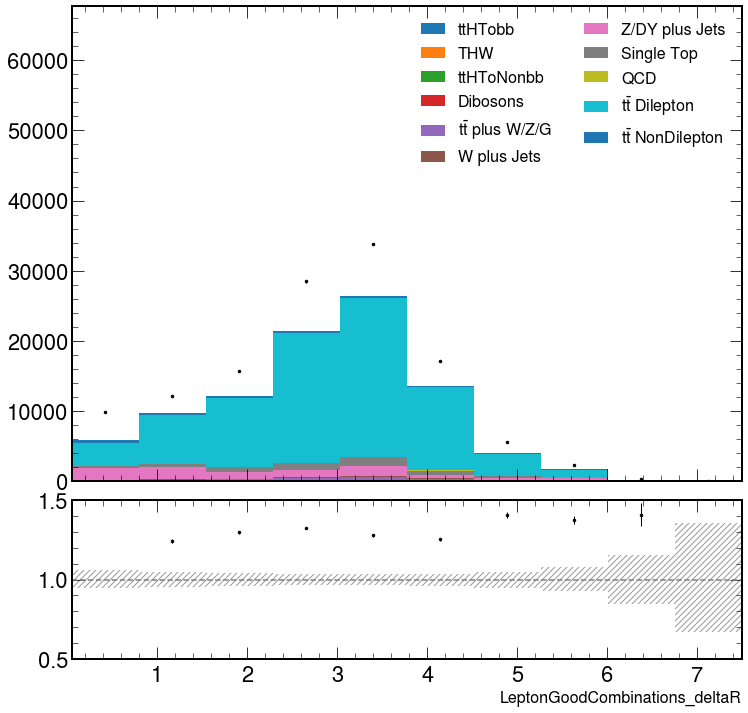

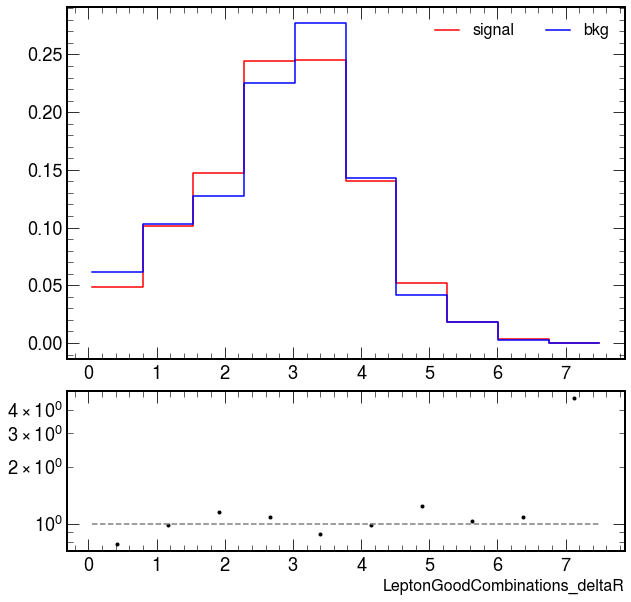

2018 baseline JetGoodCombinations_deltaR


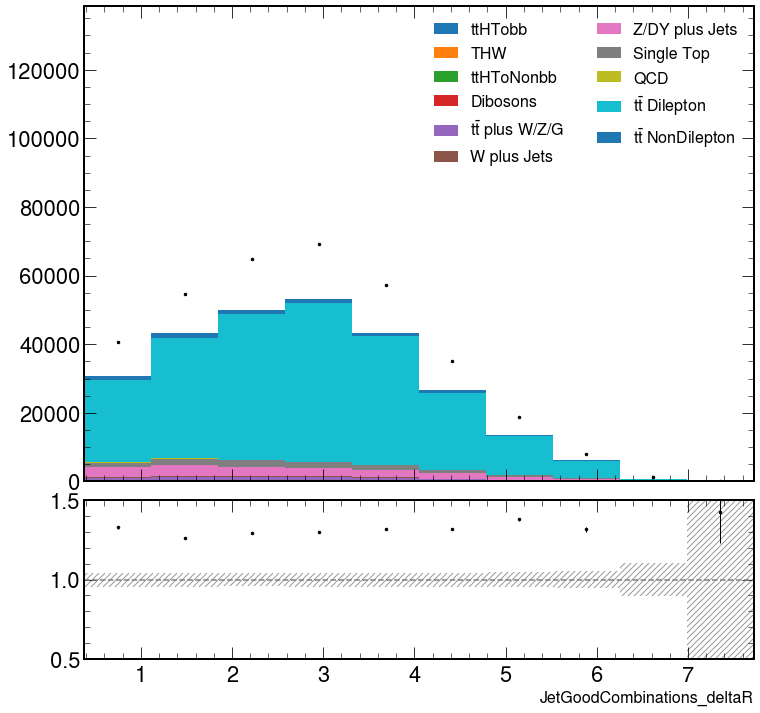

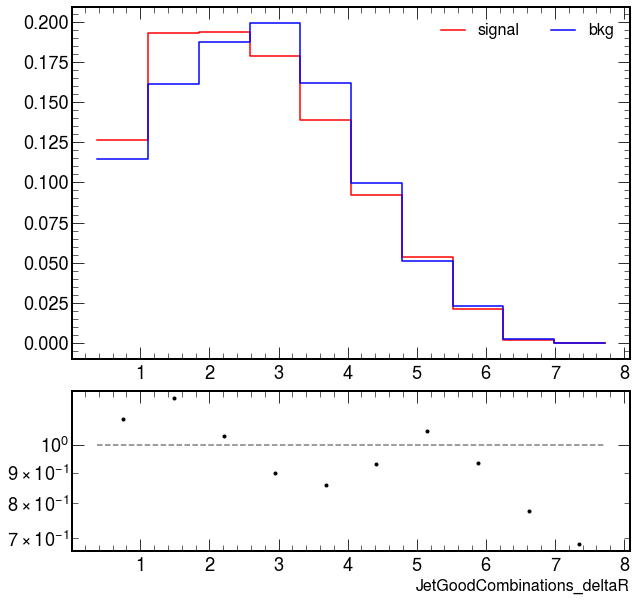

2018 baseline JetLeptonGoodCombinations_deltaR


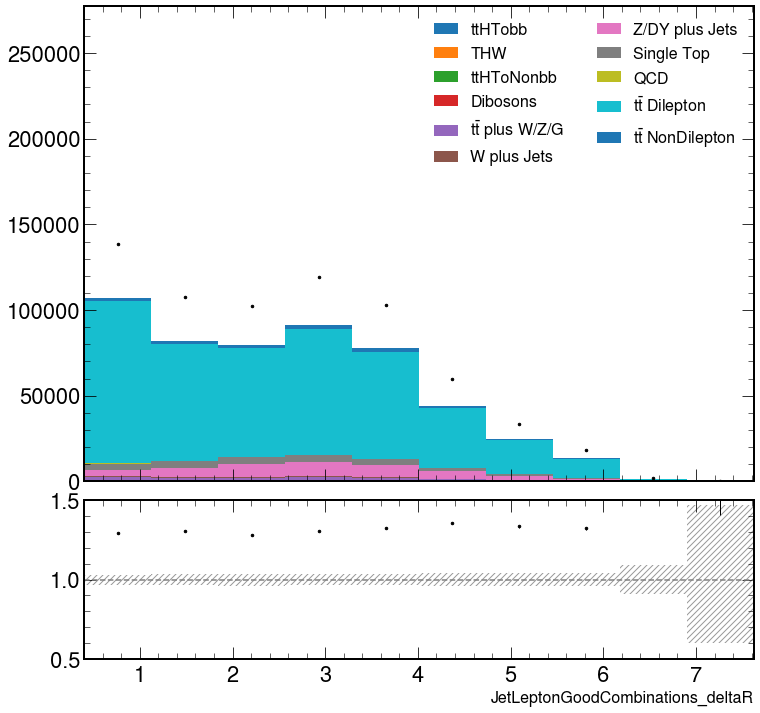

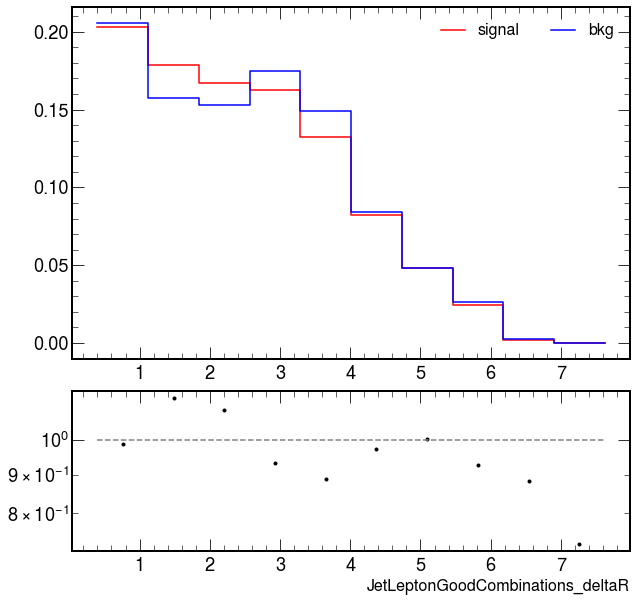

2018 baseline FatJetLeptonGoodCombinations_deltaR


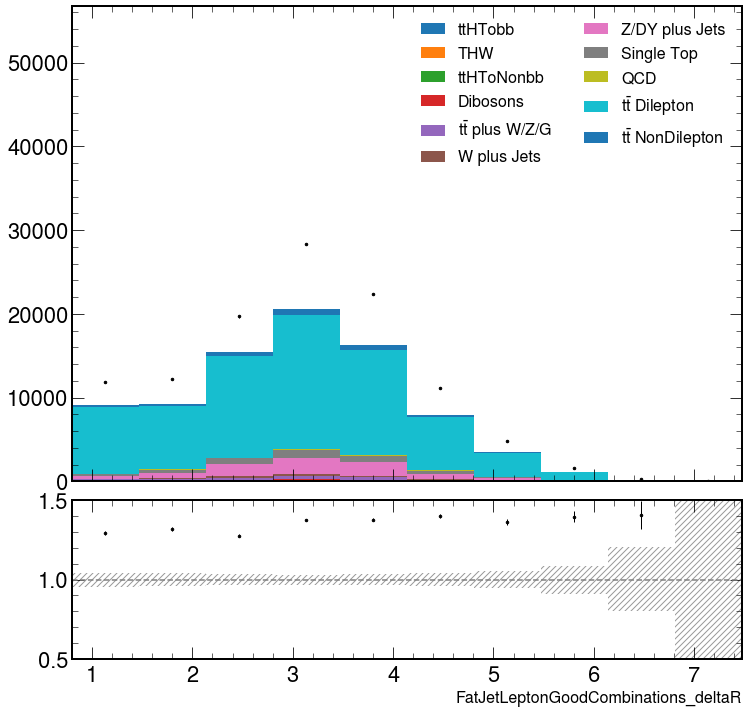

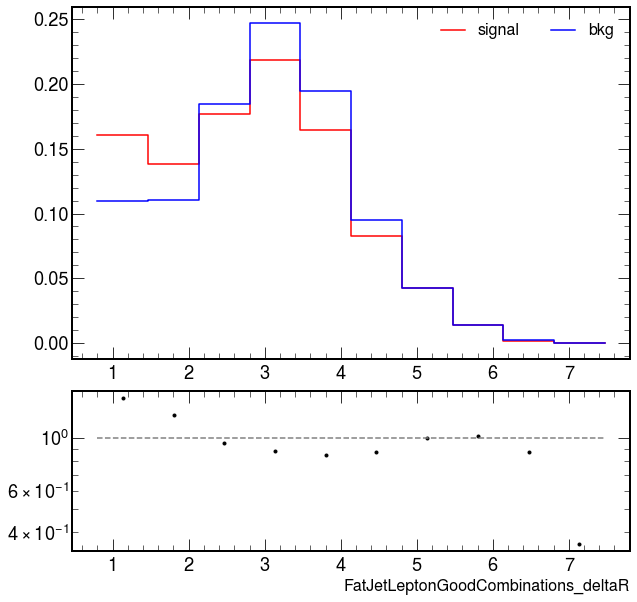

2018 baseline JetFatJetGoodCombinations_deltaR


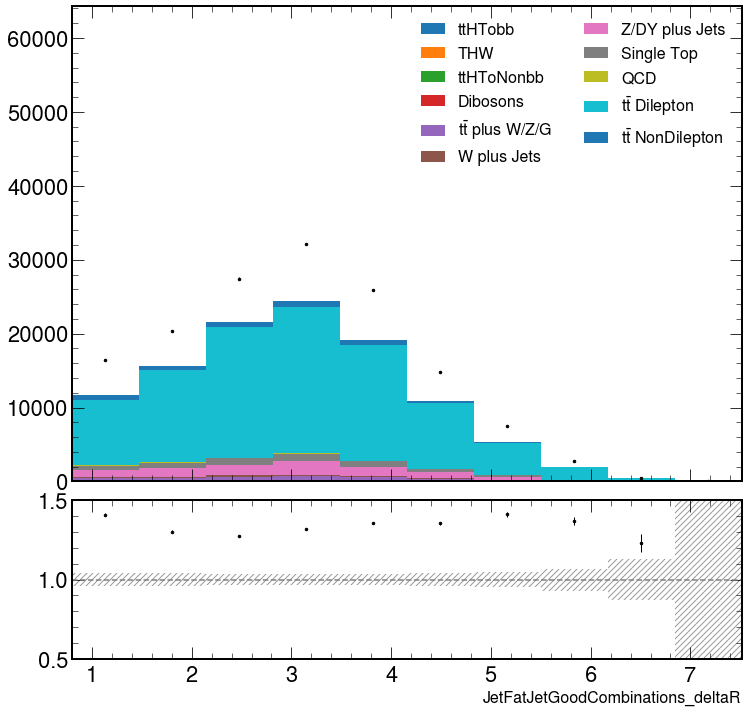

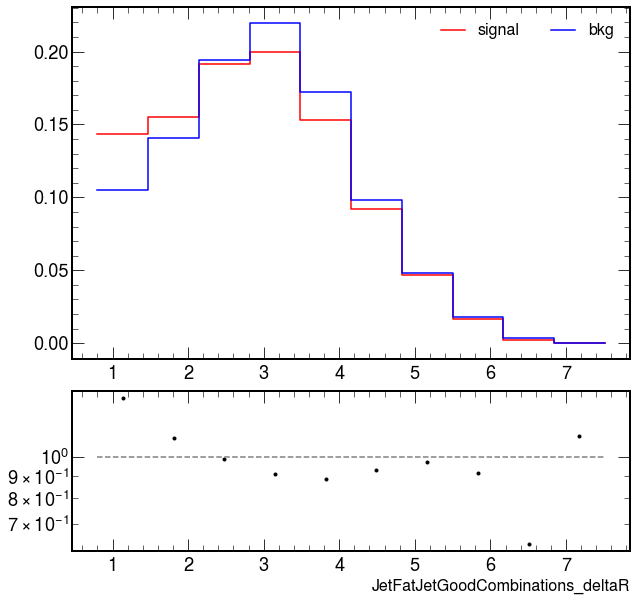

In [22]:
#User parameters
years = ["2018"]
#cats = ["baseline","ee","emu","mumu"]
cats = ["baseline"]
first_sample = 'TTTo2L2Nu' #any sample which contains all columns requested for plotting
vars = ['LeptonGoodCombinations_deltaR', 'JetGoodCombinations_deltaR','JetLeptonGoodCombinations_deltaR', 'FatJetLeptonGoodCombinations_deltaR', 'JetFatJetGoodCombinations_deltaR'] #columns to plot, leave empty for all columns
modifier = "all" #which objects to plot per event, options are: 'pt_#' where # goes from 1 to N with 1 being the leading pt object
                  #                                              'max' which plots the highest value of the parameter per event
                  #                                              'all' which plots all values of the parameter per event

dataSamples = []
for sample in o['columns'].keys():
    if 'DATA' in sample:
        dataSamples.append(sample)

for year in years:
    for cat in cats:
        if(not len(vars)):
            vars = o['columns'][first_sample+"__nominal"][getName(first_sample)][cat].keys()
        for var in vars:
            if(("weight" in var) or ("Idx" in var) or ("Ttbar" in var)):
                continue
            print(year, cat, var)
            col = var.split("_")[0]
            if ("tau21" in var) or ("tau32" in var) or ("tau31" in var) or ("tau43" in var):
                continue
            quantity = var.split("_")[1]
            all_MC = {}
            all_weight = {}
            for label, samples in parameters_dump['plotting_style']['samples_groups'].items():
                label = parameters_dump['plotting_style']['labels_mc'].get(label, label)
                label_data = []
                label_weight = {}
                for sample in samples:
                    weight = {}
                    ttbb_weight = {}
                    name = getName(sample)
                    if(("V2" in var) and ("v7" in name)):
                        data = o['columns'][sample+"__nominal"][name][cat][var[:-2]]
                    else:
                        data = o['columns'][sample+"__nominal"][name][cat][var]
                    
                    for weightVar in o['columns'][first_sample+"__nominal"][getName(first_sample)][cat].keys():          
                        if ("weight" in weightVar):
                            weight[weightVar] = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][weightVar].value)
                            weight[weightVar] = weight[weightVar] / o['sum_genweights'][name]
                    A = o['sum_genweights_ttB'][name]
                    if(sample=="TTTo2L2Nu"):
                        #print("sum nominal weights",ak.sum(weight["weight_nominal"]))
                        #print("genTtbarId tt",ak.from_numpy(o['columns'][sample+"__nominal"][name][cat]["events_genTtbarId"].value))
                        genTtbarId = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat]["events_genTtbarId"].value) % 100
                        #print("genTtbarId tt % 100",genTtbarId)
                        tt_ttb_mask = genTtbarId > 50
                        #print("tt_ttb_mask",tt_ttb_mask)
                        #print("nominal weight",weight["weight_nominal"])
                        #print("removed nominal weight sum",ak.sum(weight["weight_nominal"][tt_ttb_mask]))
                        C = ak.sum(weight["weight_nominal"][tt_ttb_mask])
                        for key in weight:
                            weight[key] = weight[key][~tt_ttb_mask]
                        if(("V2" in var) and ("v7" in name)):
                            ttbb_data = o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][var[:-2]]
                        else:
                            ttbb_data = o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][var]
                        #print("genTtbarId ttbb",ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat]["events_genTtbarId"].value))
                        genTtbarId = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat]["events_genTtbarId"].value) % 100
                        #print("genTtbarId ttbb % 100",genTtbarId)
                        ttbb_ttb_mask = genTtbarId > 50
                        #print("ttbb_ttb_mask",ttbb_ttb_mask)
                        B = o2['sum_genweights_ttB']['TTbbDiLeptonic_Powheg_2018']
                        #print("A",A)
                        #print("B",B)
                        #print('A/B',A/B)
                        #print("tt sum genweights",o['sum_genweights'][name])
                        #print("ttbb sum genweights",o2['sum_genweights']['TTbbDiLeptonic_Powheg_2018'])
                        for weightVar in o['columns'][first_sample+"__nominal"][getName(first_sample)][cat].keys():
                            if ("weight" in weightVar):
                                ttbb_weight[weightVar] = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][weightVar].value)
                                ttbb_weight[weightVar] = ttbb_weight[weightVar] / o2['sum_genweights']['TTbbDiLeptonic_Powheg_2018']
                                ttbb_weight[weightVar] = ttbb_weight[weightVar][ttbb_ttb_mask]
                                D = ak.sum(ttbb_weight[weightVar])
                                #if weightVar == "weight_nominal":
                                    #print("ttbb_weight",ttbb_weight[weightVar])
                                ttbb_weight[weightVar] = ttbb_weight[weightVar] * (C/D)
                                #ttbb_weight[weightVar] = ttbb_weight[weightVar] * (A/B)
                                #if weightVar == "weight_nominal":
                                    #print("adding nominal weight sum",ak.sum(ttbb_weight[weightVar]))
                                    #print("ttbb_weight after reweighting",ttbb_weight[weightVar])
                                
                                
                        if(quantity!="N" and col!="events"):
                            colN = o['columns'][sample+"__nominal"][name][cat][col+"_N"]
                            data = ak.unflatten(data,colN)
                            
                            ttbb_colN = o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][col+"_N"]
                            ttbb_data = ak.unflatten(ttbb_data,ttbb_colN)
                           
                            if "pt" in modifier:
                                index = int(modifier.split("_")[1]) - 1
                                ttbb_data = ak.mask(ttbb_data, ak.num(ttbb_data) > index)[:, index]
                                data = ak.mask(data, ak.num(data) > index)[:, index]
                            elif modifier=="max":
                                data = ak.max(data,axis=1)
                                ttbb_data = ak.max(ttbb_data,axis=1)
                        data = data[~tt_ttb_mask]
                        ttbb_data = ttbb_data[ttbb_ttb_mask]
                        data = ak.concatenate((data,ttbb_data),axis=0)
                        for key in weight:
                            weight[key] = ak.concatenate((weight[key],ttbb_weight[key]),axis=0)
                        
                        #print("sum nominal weights after merge",ak.sum(weight["weight_nominal"]))
                    elif(quantity!="N" and col!="events"):
                        colN = o['columns'][sample+"__nominal"][name][cat][col+"_N"]
                        data = ak.unflatten(data,colN)
                        
                        if "pt" in modifier:
                            index = int(modifier.split("_")[1]) - 1
                            data = ak.mask(data, ak.num(data) > index)[:, index]
                        elif modifier=="max":
                            data = ak.max(data,axis=1)
                    for key in weight:
                        weight[key], data = ak.broadcast_arrays(weight[key],data)
                        if(modifier=="all" and quantity!="N" and col!="events"):
                            weight[key] = ak.flatten(weight[key])
                    if(modifier=="all" and quantity!="N" and col!="events"): 
                        data = ak.flatten(data)
                    none_mask = ak.is_none(data)
                    data = data[~none_mask]
                    for key in weight:
                        weight[key] = weight[key][~none_mask]
                    inf_mask = np.isinf(data)
                    data = data[~inf_mask]
                    for key in weight:
                        weight[key] = weight[key][~inf_mask]
                    label_data = ak.concatenate((label_data,data),axis=0)
                    for key in weight:
                        if key not in label_weight:
                            label_weight[key] = []
                        label_weight[key] = ak.concatenate((label_weight[key],weight[key]),axis=0)
                all_MC[label] = label_data
                for key in label_weight:
                    if key not in all_weight:
                        all_weight[key] = {}
                    all_weight[key][label] = label_weight[key]
                
            bins, xmin, xmax, xlabel = getPlotParams(var)
            plt.style.use([hep.style.ROOT, {'font.size': 22}])
            f2, a2 = plt.subplots()
            if not ("Gen" in var) and not ("gen" in var):
                fig, (ax, rax) = plt.subplots(2, 1, figsize=[12,12], gridspec_kw={"height_ratios": [3,1]}, sharex=True)
                fig.subplots_adjust(hspace=0.06)
                if(bins==-1):
                    n, bin_edges, patches = ax.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()))
                else:
                    n, bin_edges, patches = ax.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()),bins=bins,range=(xmin,xmax))
                signal_n, signal_bins = np.histogram(all_MC["ttHTobb"],weights=all_weight["weight_nominal"]["ttHTobb"],bins=bin_edges)
                signal_mcstaterr2 = np.histogram(all_MC["ttHTobb"],weights=all_weight["weight_nominal"]["ttHTobb"]**2,bins=bin_edges)[0]
                bg_mcstaterr2 = 0
                bg_n = n[-1] - signal_n
                signal_n = signal_n / ak.sum(signal_n)
                bg_n = bg_n / ak.sum(bg_n)
                n_sys = {}
                for key in all_weight:
                    if "Down" in key:
                        continue
                    downString = key[:-2]+"Down"
                    err2_up_total = np.zeros_like(n[-1])
                    err2_down_total = np.zeros_like(n[-1])
                    for label in all_weight[key]:
                        if key=="weight_nominal":
                            mcstat_err2 = np.histogram(all_MC[label], bins=bin_edges, weights=all_weight[key][label]**2)[0]
                            #print(label,np.histogram(all_MC[label], bins=bin_edges, weights=all_weight[key][label])[0][3])
                            err2_up_total += mcstat_err2
                            err2_down_total += mcstat_err2
                            bg_mcstaterr2 += mcstat_err2
                        else:
                            hist_n_up, hist_bins_up = np.histogram(all_MC[label],weights=all_weight[key][label],bins=bin_edges)
                            hist_n_down, hist_bins_down = np.histogram(all_MC[label],weights=all_weight[downString][label],bins=bin_edges)
                            hist_n, hist_bins = np.histogram(all_MC[label],weights=all_weight["weight_nominal"][label],bins=bin_edges)
                            err_up = hist_n_up - hist_n
                            err_down = hist_n_down - hist_n
                            # Compute the flags to check which of the two variations (up and down) are pushing the nominal value up and down
                            up_is_up = err_up > 0
                            down_is_down = err_down < 0
                            # Compute the flag to check if the uncertainty is one-sided, i.e. when both variations are up or down
                            is_onesided = up_is_up ^ down_is_down
                            # Sum in quadrature of the systematic uncertainties taking into account if the uncertainty is one- or double-sided
                            err2_up_twosided = np.where(up_is_up, err_up**2, err_down**2)
                            err2_down_twosided = np.where(up_is_up, err_down**2, err_up**2)
                            err2_max = np.maximum(err2_up_twosided, err2_down_twosided)
                            err2_up_onesided = np.where(is_onesided & up_is_up, err2_max, 0)
                            err2_down_onesided = np.where(is_onesided & down_is_down, err2_max, 0)
                            err2_up_combined = np.where(is_onesided, err2_up_onesided, err2_up_twosided)
                            err2_down_combined = np.where(
                                is_onesided, err2_down_onesided, err2_down_twosided
                            )
                            err2_up_total += err2_up_combined
                            err2_down_total += err2_down_combined
                    n_sys[key] = err2_up_total
                    n_sys[downString] = err2_down_total
                ax.tick_params(axis='x', labelsize=22)
                ax.tick_params(axis='y', labelsize=22)
                ax.set_xlim(bin_edges[0],bin_edges[-1])
                #systematic error band
                err2_up = np.zeros_like(n[-1])
                err2_down = np.zeros_like(n[-1])
                for key in n_sys:
                    if "Down" in key:
                        continue
                    downString = key[:-2]+"Down"
                    err2_up += n_sys[key]
                    err2_down += n_sys[downString]
                up = n[-1] + np.sqrt(err2_up)
                down = n[-1] - np.sqrt(err2_down)
                ratio_up = np.where(n[-1] != 0, up / n[-1], 1)
                ratio_down = np.where(n[-1] != 0, down / n[-1], 1)
                unc_band = np.array([ratio_down, ratio_up])
                #print("ratio_up",ratio_up)
                #print("ratio_down",ratio_down)
                rax.fill_between(
                    bin_edges,
                    np.r_[unc_band[0], unc_band[0, -1]],
                    np.r_[unc_band[1], unc_band[1, -1]],
                    label="syst. unc.",
                    color= [0.,0.,0.,0.4],
                    facecolor= [0.,0.,0.,0.],
                    hatch= "////",
                    linewidth= 0,
                    step= 'post',
                    zorder= 2
                )
                rax.hlines(
                    1.0, *bin_edges[[0, -1]], colors='gray', linestyles='dashed'
                )
                
                ax.legend(ncol=2,loc="upper right",fontsize=16)
                plt.xlabel(xlabel,fontsize=16)
                nData = [0.0]*len(bin_edges[:-1])
                for sample in dataSamples:
                    for name in o['columns'][sample].keys():
                        data = o['columns'][sample][name][cat][var]
                        if(quantity!="N" and col!="events"):
                            colN = o['columns'][sample][name][cat][col+"_N"]
                            data = ak.unflatten(data,colN)  

                            if "pt" in modifier:
                                index = int(modifier.split("_")[1]) - 1
                                data = ak.mask(data, ak.num(data) > index)[:, index]
                            elif modifier=="max":
                                data = ak.max(data,axis=1)
                        none_mask = ak.is_none(data)
                        data = data[~none_mask]
                        inf_mask = np.isinf(data)
                        data = data[~inf_mask]
                        if(modifier=="all" and quantity!="N" and col!="events"):
                            data = ak.flatten(data)
                        n_data, bin_edges_data, patches_data = a2.hist(data,bins=bin_edges)
                        nData += n_data
                error = np.sqrt(nData)
                binCenters = (bin_edges_data[:-1] + bin_edges_data[1:]) / 2
                ratio = nData/n[-1]
                ratio_error = error/n[-1]
                ratio_error[np.isnan(ratio_error)] = np.inf
                ax.errorbar(binCenters, nData, yerr=error,linestyle='solid',markersize=5.0,color='black',elinewidth=1,linewidth=0,marker='.')
                rax.errorbar(binCenters, ratio, yerr=ratio_error,linestyle='solid',markersize=5.0,color='black',elinewidth=1,linewidth=0,marker='.')
                rax.set_ylim((0.5, 1.5))
                rax.yaxis.set_label_coords(-0.075, 1)
                rax.tick_params(axis='x', labelsize=22)
                rax.tick_params(axis='y', labelsize=22)
                max_data = max(nData)
                max_MC = max(n[-1])
                if(max_data>max_MC):
                    ax.set_ylim((0, 2.0 * max_data))
                else:
                    ax.set_ylim((0, 2.0 * max_MC))
            else:
                f1, a1 = plt.subplots()
                if(bins==-1):
                    n, bin_edges, patches = a1.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()))
                else:
                    n, bin_edges, patches = a1.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()),bins=bins,range=(xmin,xmax))
                ax.legend(ncol=2,loc="upper right")
            
            plt.close(f2)
            if "pt" in modifier:
                stringMod = modifier.split("_")[1]
            else:
                stringMod = modifier
            filepath = f"hists_fixMerge/{year}/{cat}/{col}"
            if not os.path.exists(filepath):
                os.makedirs(filepath)
            plt.savefig(filepath+"/"+var+"_"+stringMod+".pdf")
            plt.show()
            plt.clf()
            plt.cla()
            binCenters = (bin_edges[:-1] + bin_edges[1:]) / 2
            bg_mcstaterr2 = bg_mcstaterr2 - signal_mcstaterr2
            plt.figure(1)
            ax1 = plt.subplot(3,1,(1,2))
            signal_n = np.append(signal_n,signal_n[-1])
            bg_n = np.append(bg_n,bg_n[-1])
            plt.step(bin_edges,signal_n,color="red",label="signal",where="post")
            plt.step(bin_edges,bg_n,color="blue",label="bkg",where="post")
            ax1.legend(ncol=2,loc="upper right",fontsize=16)
            ax2 = plt.subplot(3,1,3,sharex=ax1)
            plt.scatter(binCenters,signal_n[:-1]/bg_n[:-1],color="black",marker=".")
            ax2.hlines(
                    1.0, *bin_edges[[0, -1]], colors='gray', linestyles='dashed'
                )
            ax2.set_yscale("log")
            plt.xlabel(xlabel,fontsize=16)
            plt.show()
            plt.close()

2018 baseline BBFatJetGoodL_tau21


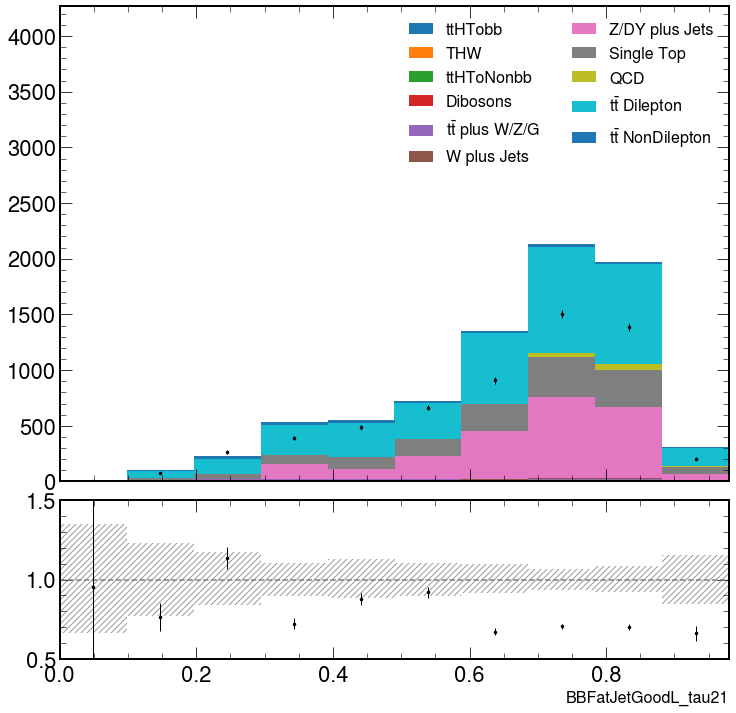

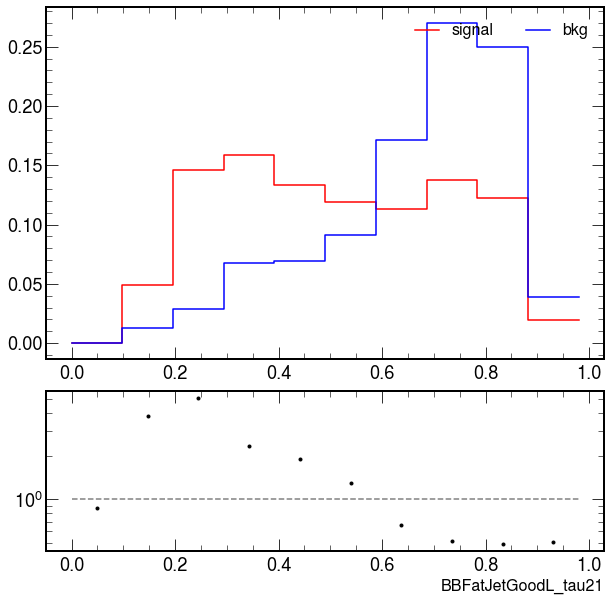

2018 baseline BBFatJetGoodL_tau32


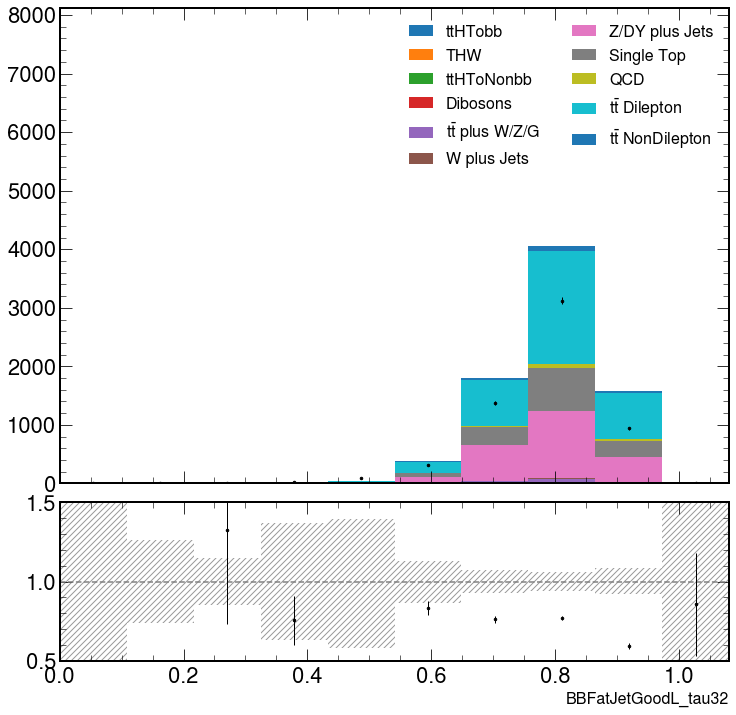

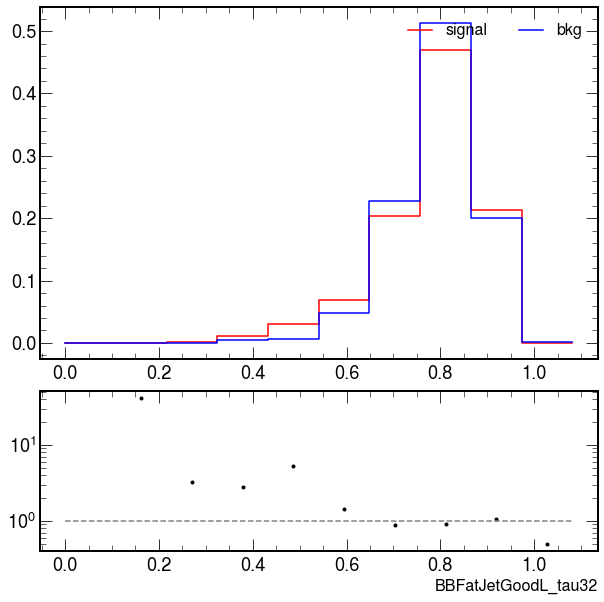

2018 baseline BBFatJetGoodL_tau31


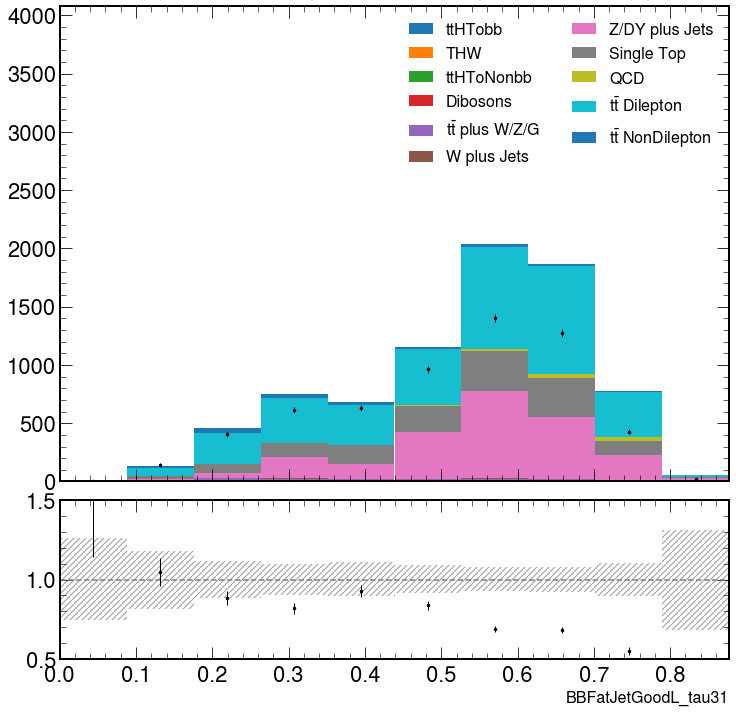

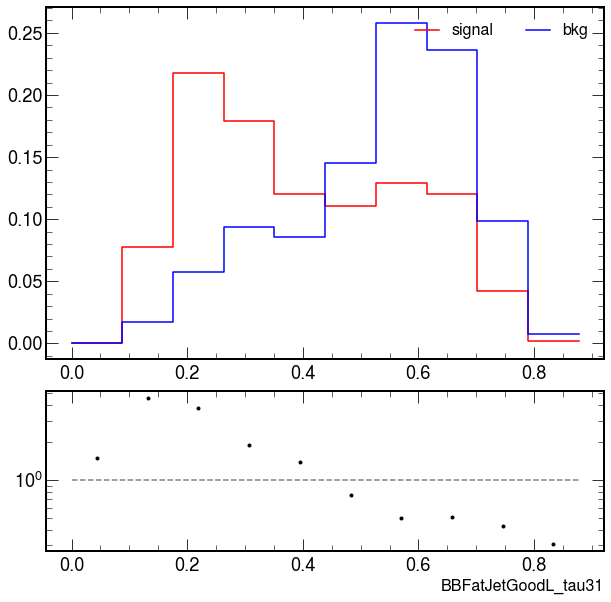

2018 baseline BBFatJetGoodL_tau43


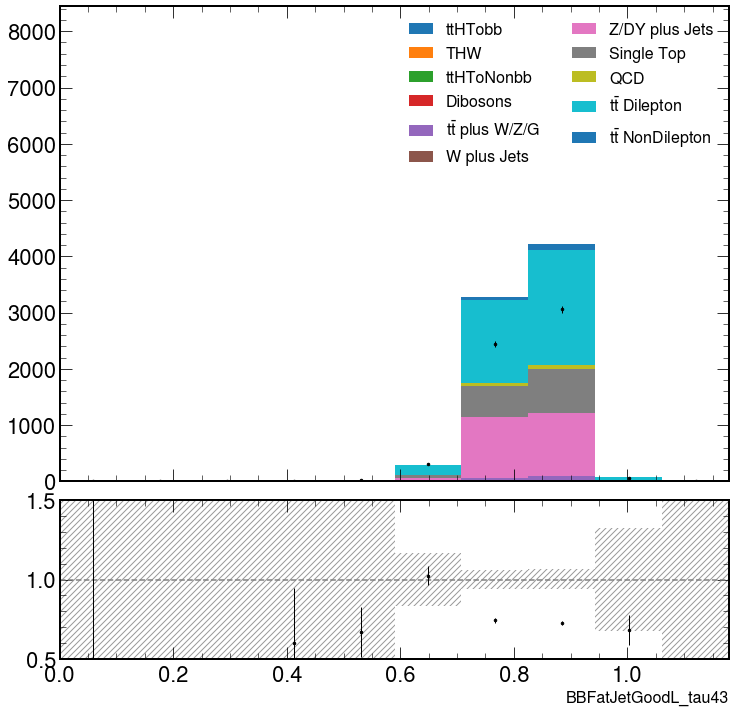

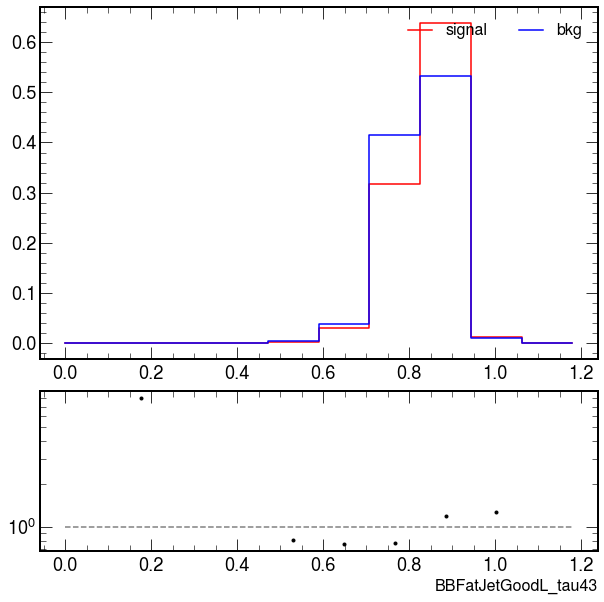

2018 baseline BBFatJetGoodM_tau21


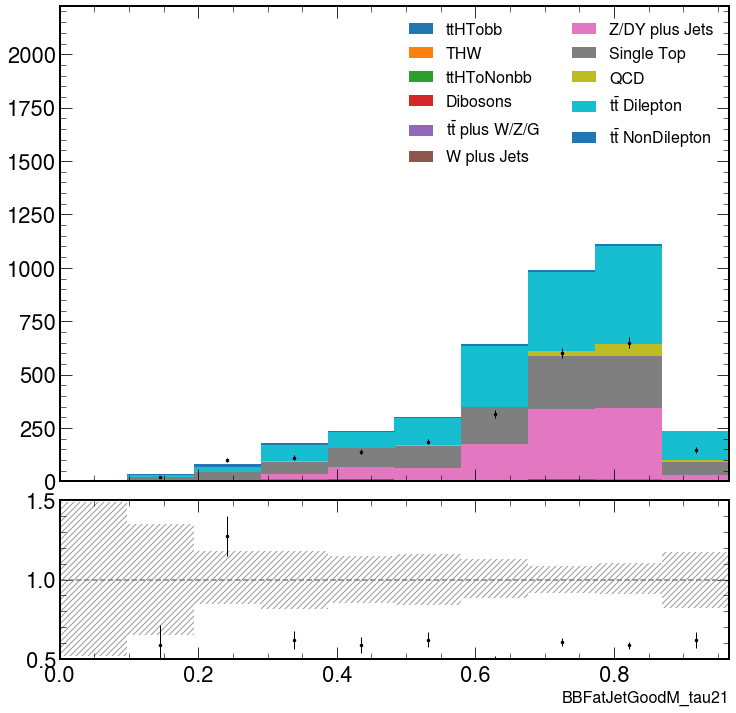

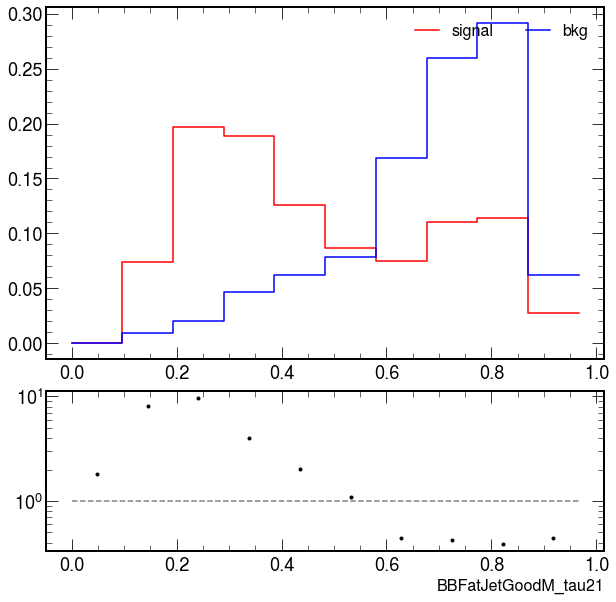

2018 baseline BBFatJetGoodM_tau32


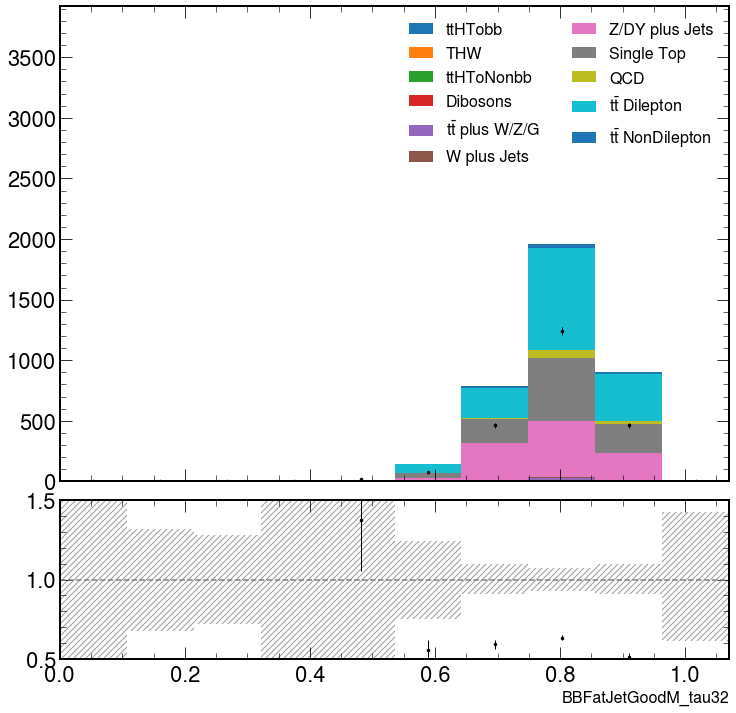

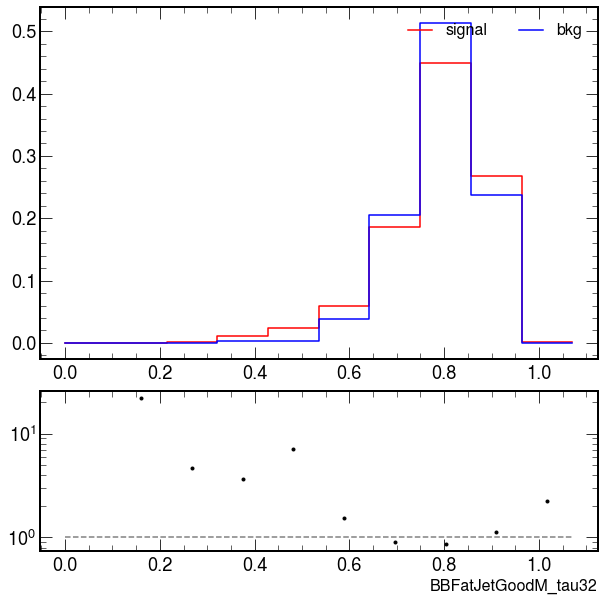

2018 baseline BBFatJetGoodM_tau31


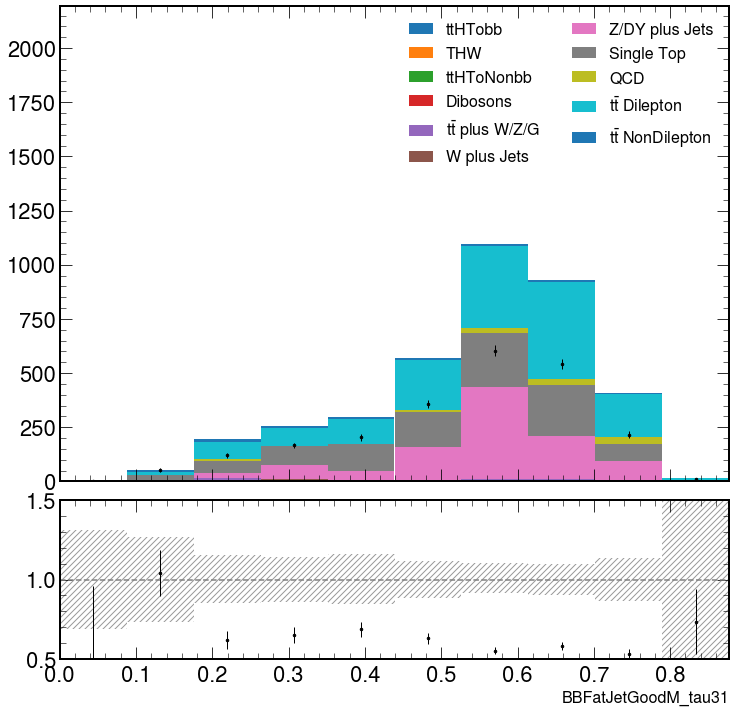

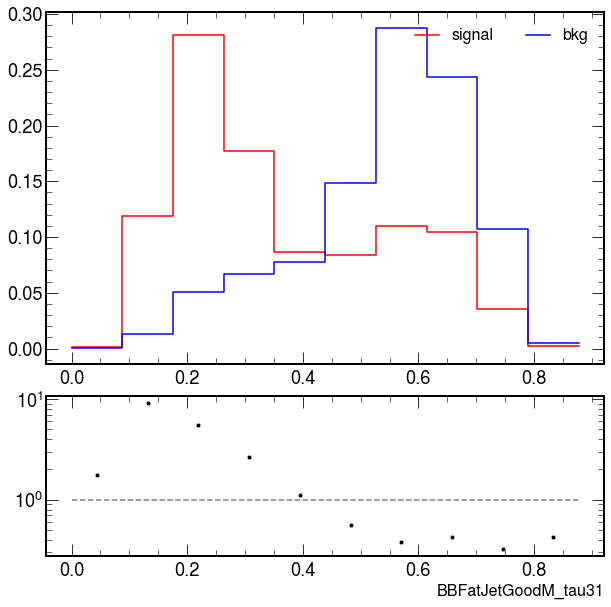

2018 baseline BBFatJetGoodM_tau43


/tmp/rmccarth/ipykernel_2838565/896158171.py:223: RuntimeWarning: invalid value encountered in true_divide
  ratio_up = np.where(n[-1] != 0, up / n[-1], 1)
/tmp/rmccarth/ipykernel_2838565/896158171.py:224: RuntimeWarning: invalid value encountered in true_divide
  ratio_down = np.where(n[-1] != 0, down / n[-1], 1)
/tmp/rmccarth/ipykernel_2838565/896158171.py:272: RuntimeWarning: invalid value encountered in true_divide
  ratio = nData/n[-1]
/tmp/rmccarth/ipykernel_2838565/896158171.py:273: RuntimeWarning: invalid value encountered in true_divide
  ratio_error = error/n[-1]


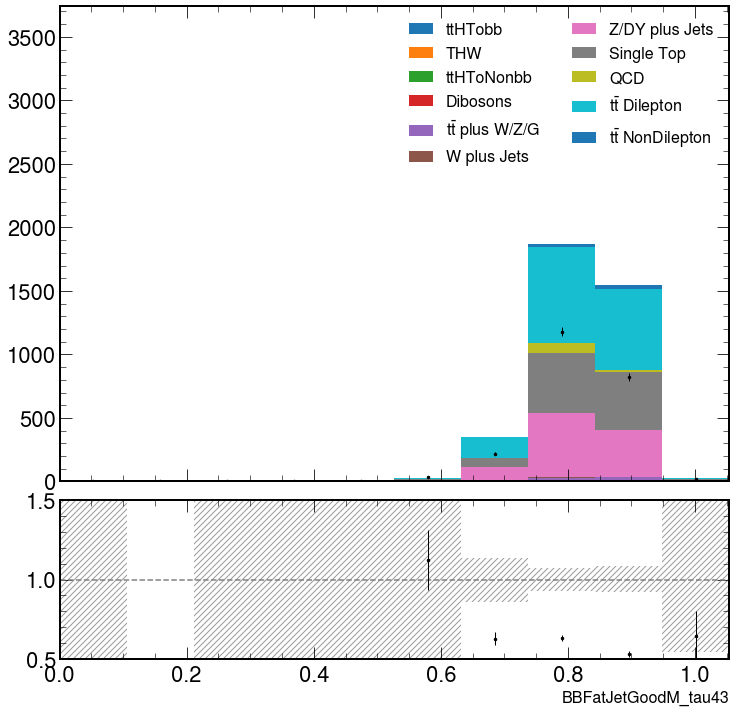

/tmp/rmccarth/ipykernel_2838565/896158171.py:317: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(binCenters,signal_n[:-1]/bg_n[:-1],color="black",marker=".")


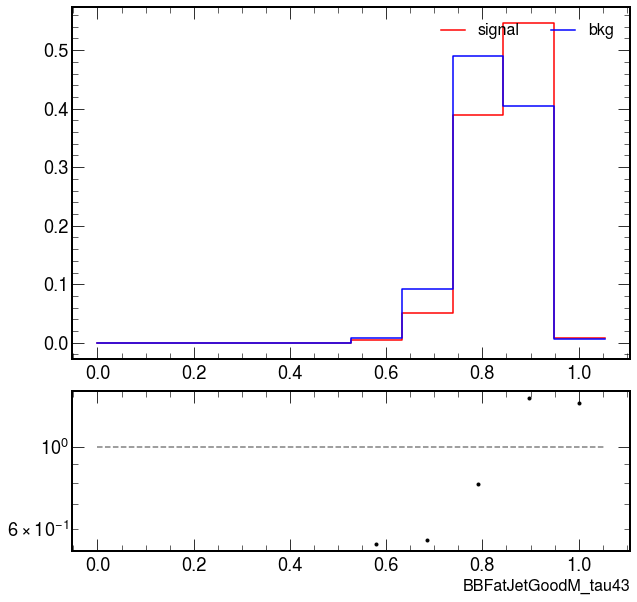

2018 baseline BBFatJetGoodT_tau21


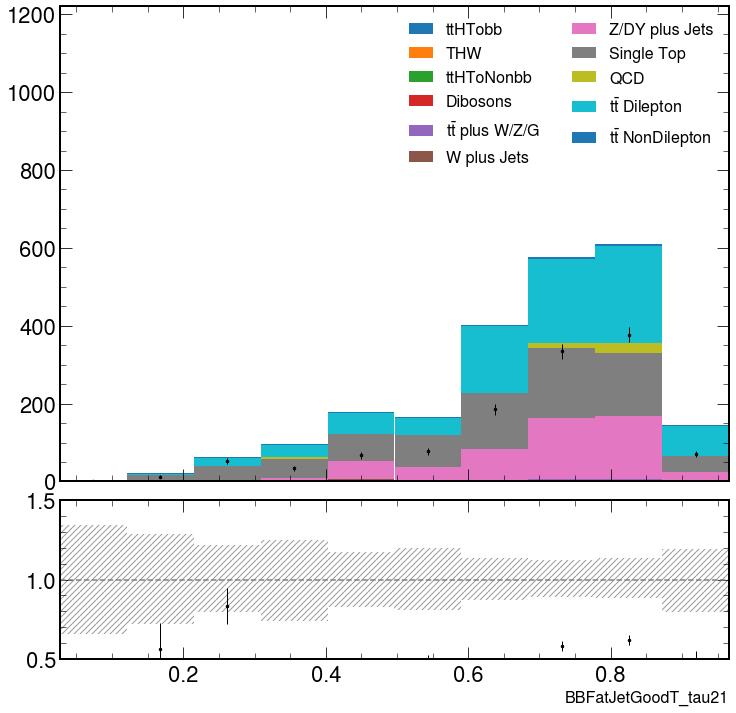

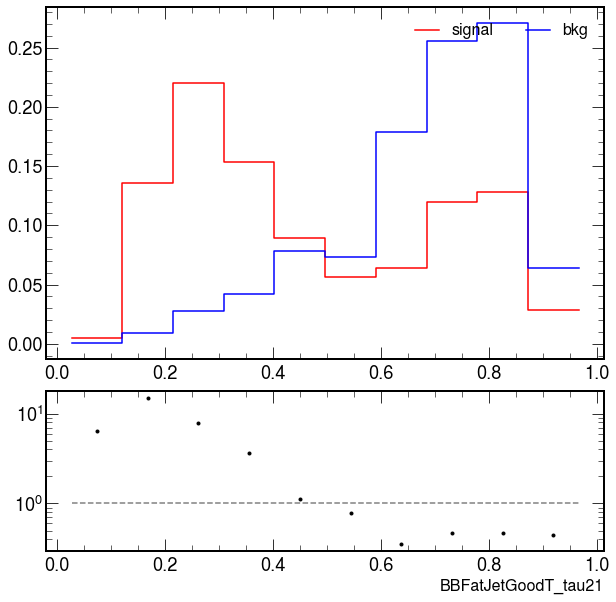

2018 baseline BBFatJetGoodT_tau32


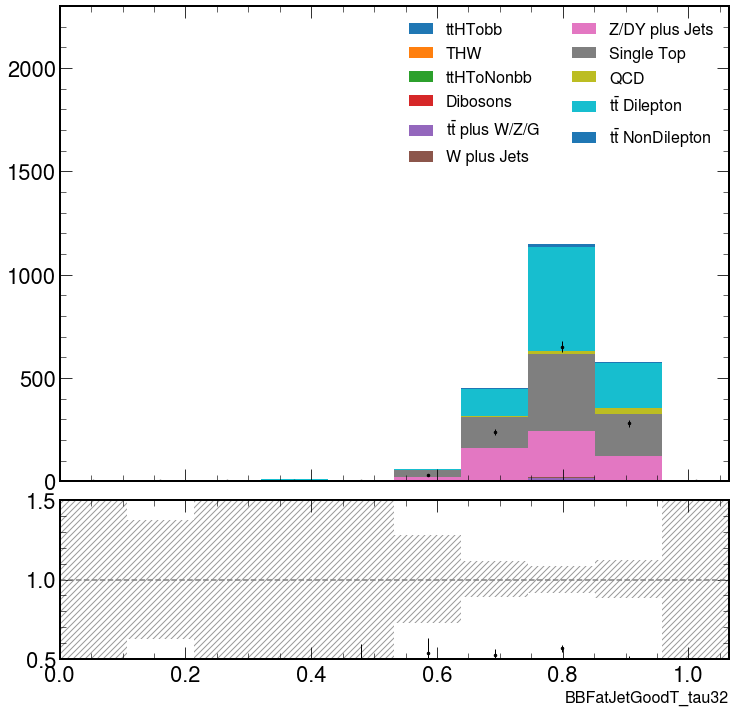

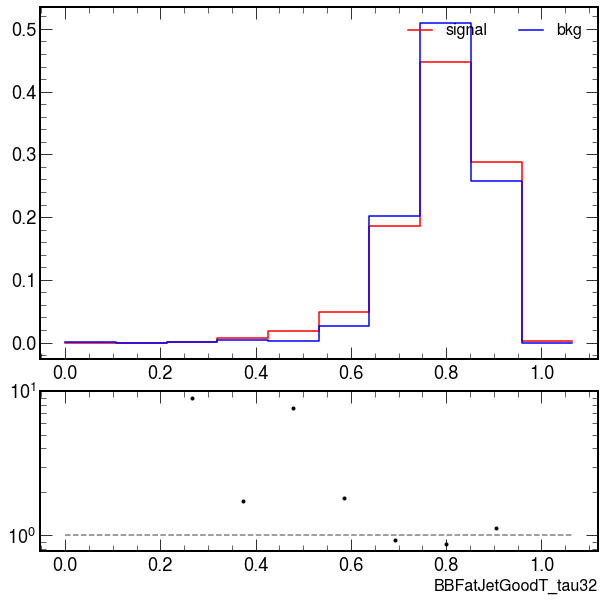

2018 baseline BBFatJetGoodT_tau31


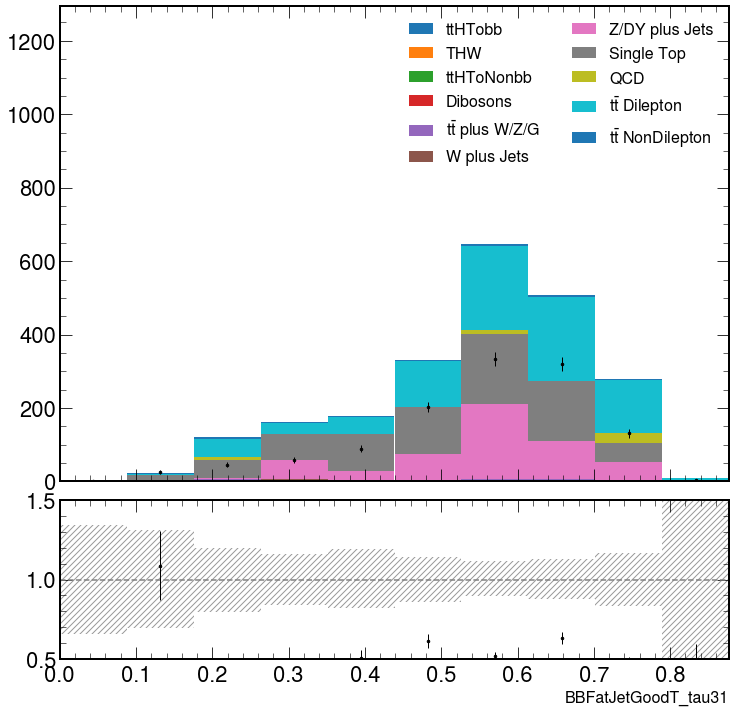

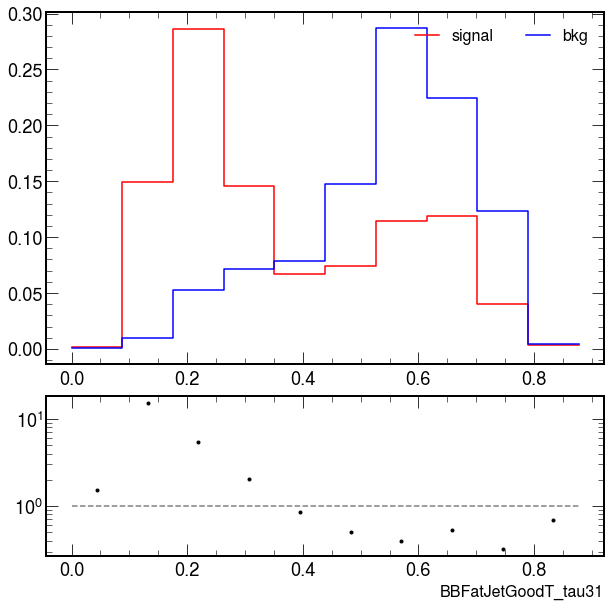

2018 baseline BBFatJetGoodT_tau43


/tmp/rmccarth/ipykernel_2838565/896158171.py:223: RuntimeWarning: invalid value encountered in true_divide
  ratio_up = np.where(n[-1] != 0, up / n[-1], 1)
/tmp/rmccarth/ipykernel_2838565/896158171.py:224: RuntimeWarning: invalid value encountered in true_divide
  ratio_down = np.where(n[-1] != 0, down / n[-1], 1)
/tmp/rmccarth/ipykernel_2838565/896158171.py:272: RuntimeWarning: invalid value encountered in true_divide
  ratio = nData/n[-1]
/tmp/rmccarth/ipykernel_2838565/896158171.py:273: RuntimeWarning: invalid value encountered in true_divide
  ratio_error = error/n[-1]


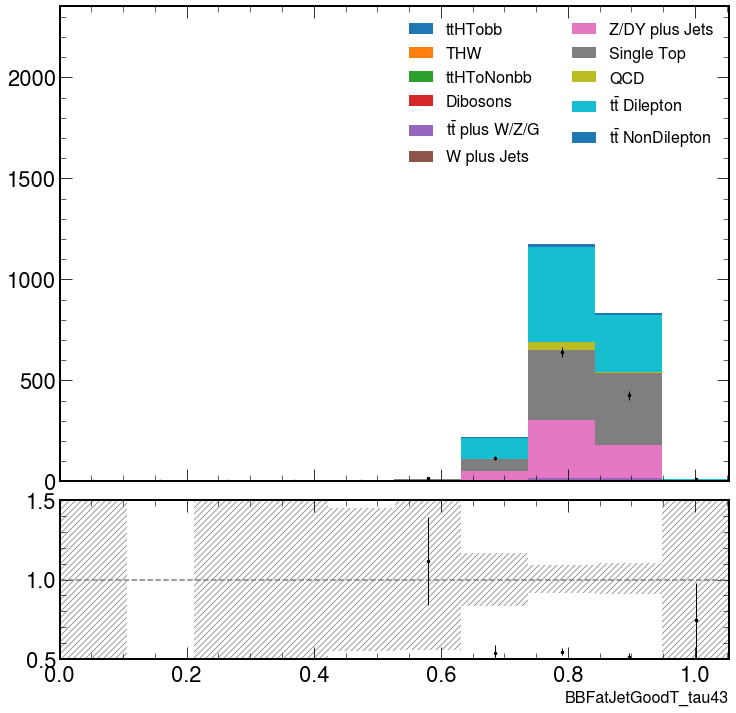

/tmp/rmccarth/ipykernel_2838565/896158171.py:317: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(binCenters,signal_n[:-1]/bg_n[:-1],color="black",marker=".")


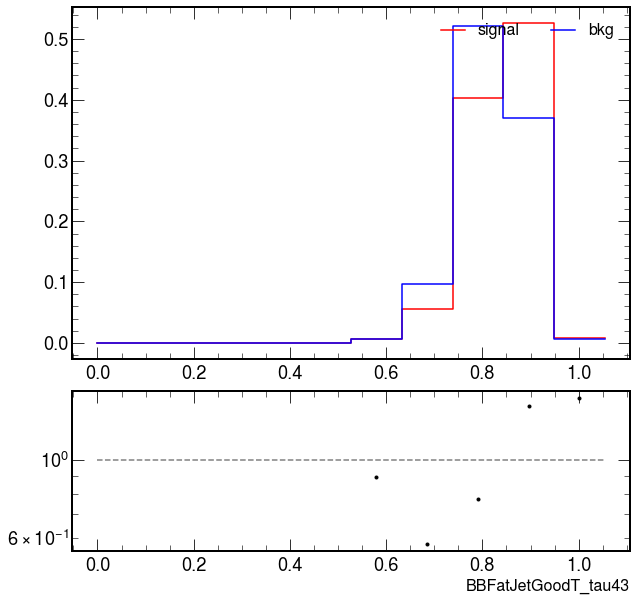

In [18]:
#User parameters
years = ["2018"]
#cats = ["baseline","ee","emu","mumu"]
cats = ["baseline"]
first_sample = 'TTTo2L2Nu' #any sample which contains all columns requested for plotting
vars = ['BBFatJetGoodL_tau21', 'BBFatJetGoodL_tau32', 'BBFatJetGoodL_tau31', 'BBFatJetGoodL_tau43', 'BBFatJetGoodM_tau21', 'BBFatJetGoodM_tau32', 'BBFatJetGoodM_tau31', 'BBFatJetGoodM_tau43', 'BBFatJetGoodT_tau21', 'BBFatJetGoodT_tau32', 'BBFatJetGoodT_tau31', 'BBFatJetGoodT_tau43'] #columns to plot, leave empty for all columns
modifier = "pt_1" #which objects to plot per event, options are: 'pt_#' where # goes from 1 to N with 1 being the leading pt object
                  #                                              'max' which plots the highest value of the parameter per event
                  #                                              'all' which plots all values of the parameter per event

dataSamples = []
for sample in o['columns'].keys():
    if 'DATA' in sample:
        dataSamples.append(sample)

for year in years:
    for cat in cats:
        if(not len(vars)):
            vars = o['columns'][first_sample+"__nominal"][getName(first_sample)][cat].keys()
        for var in vars:
            if(("weight" in var) or ("Idx" in var) or ("Ttbar" in var)):
                continue
            print(year, cat, var)
            col = var.split("_")[0]
            if ("Combination" in var):
                continue
            quantity = var.split("_")[1]
            all_MC = {}
            all_weight = {}
            for label, samples in parameters_dump['plotting_style']['samples_groups'].items():
                label = parameters_dump['plotting_style']['labels_mc'].get(label, label)
                label_data = []
                label_weight = {}
                for sample in samples:
                    weight = {}
                    ttbb_weight = {}
                    name = getName(sample)
                    if(("V2" in var) and ("v7" in name)):
                        data = o['columns'][sample+"__nominal"][name][cat][var[:-2]]
                    else:
                        data = o['columns'][sample+"__nominal"][name][cat][var]
                    
                    for weightVar in o['columns'][first_sample+"__nominal"][getName(first_sample)][cat].keys():          
                        if ("weight" in weightVar):
                            weight[weightVar] = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][weightVar].value)
                            weight[weightVar] = weight[weightVar] / o['sum_genweights'][name]
                    A = o['sum_genweights_ttB'][name]
                    if(sample=="TTTo2L2Nu"):
                        #print("sum nominal weights",ak.sum(weight["weight_nominal"]))
                        #print("genTtbarId tt",ak.from_numpy(o['columns'][sample+"__nominal"][name][cat]["events_genTtbarId"].value))
                        genTtbarId = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat]["events_genTtbarId"].value) % 100
                        #print("genTtbarId tt % 100",genTtbarId)
                        tt_ttb_mask = genTtbarId > 50
                        #print("tt_ttb_mask",tt_ttb_mask)
                        #print("nominal weight",weight["weight_nominal"])
                        #print("removed nominal weight sum",ak.sum(weight["weight_nominal"][tt_ttb_mask]))
                        C = ak.sum(weight["weight_nominal"][tt_ttb_mask])
                        for key in weight:
                            weight[key] = weight[key][~tt_ttb_mask]
                        if(("V2" in var) and ("v7" in name)):
                            ttbb_data = o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][var[:-2]]
                        else:
                            ttbb_data = o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][var]
                        #print("genTtbarId ttbb",ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat]["events_genTtbarId"].value))
                        genTtbarId = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat]["events_genTtbarId"].value) % 100
                        #print("genTtbarId ttbb % 100",genTtbarId)
                        ttbb_ttb_mask = genTtbarId > 50
                        #print("ttbb_ttb_mask",ttbb_ttb_mask)
                        B = o2['sum_genweights_ttB']['TTbbDiLeptonic_Powheg_2018']
                        #print("A",A)
                        #print("B",B)
                        #print('A/B',A/B)
                        #print("tt sum genweights",o['sum_genweights'][name])
                        #print("ttbb sum genweights",o2['sum_genweights']['TTbbDiLeptonic_Powheg_2018'])
                        for weightVar in o['columns'][first_sample+"__nominal"][getName(first_sample)][cat].keys():
                            if ("weight" in weightVar):
                                ttbb_weight[weightVar] = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][weightVar].value)
                                ttbb_weight[weightVar] = ttbb_weight[weightVar] / o2['sum_genweights']['TTbbDiLeptonic_Powheg_2018']
                                ttbb_weight[weightVar] = ttbb_weight[weightVar][ttbb_ttb_mask]
                                D = ak.sum(ttbb_weight[weightVar])
                                #if weightVar == "weight_nominal":
                                    #print("ttbb_weight",ttbb_weight[weightVar])
                                ttbb_weight[weightVar] = ttbb_weight[weightVar] * (C/D)
                                #ttbb_weight[weightVar] = ttbb_weight[weightVar] * (A/B)
                                #if weightVar == "weight_nominal":
                                    #print("adding nominal weight sum",ak.sum(ttbb_weight[weightVar]))
                                    #print("ttbb_weight after reweighting",ttbb_weight[weightVar])
                                
                                
                        if(quantity!="N" and col!="events"):
                            colN = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_N"].value)
                            data = ak.unflatten(data,colN)
                            pt_data = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_pt"].value)
                            pt_data = ak.unflatten(pt_data,colN)
                            sortIndices = ak.argsort(pt_data,ascending=False)
                            data = data[sortIndices]
                            ttbb_colN = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][col+"_N"].value)
                            ttbb_data = ak.unflatten(ttbb_data,ttbb_colN)
                            ttbb_pt_data = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][col+"_pt"].value)
                            ttbb_pt_data = ak.unflatten(ttbb_pt_data,ttbb_colN)
                            sortIndices = ak.argsort(ttbb_pt_data,ascending=False)
                            ttbb_data = ttbb_data[sortIndices]
                            if "pt" in modifier:
                                index = int(modifier.split("_")[1]) - 1
                                ttbb_data = ak.mask(ttbb_data, ak.num(ttbb_data) > index)[:, index]
                                data = ak.mask(data, ak.num(data) > index)[:, index]
                            elif modifier=="max":
                                data = ak.max(data,axis=1)
                                ttbb_data = ak.max(ttbb_data,axis=1)
                        data = data[~tt_ttb_mask]
                        ttbb_data = ttbb_data[ttbb_ttb_mask]
                        data = ak.concatenate((data,ttbb_data),axis=0)
                        for key in weight:
                            weight[key] = ak.concatenate((weight[key],ttbb_weight[key]),axis=0)
                        
                        #print("sum nominal weights after merge",ak.sum(weight["weight_nominal"]))
                    elif(quantity!="N" and col!="events"):
                        colN = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_N"].value)
                        data = ak.unflatten(data,colN)
                        pt_data = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_pt"].value)
                        pt_data = ak.unflatten(pt_data,colN)
                        sortIndices = ak.argsort(pt_data,ascending=False)
                        data = data[sortIndices]
                        if "pt" in modifier:
                            index = int(modifier.split("_")[1]) - 1
                            data = ak.mask(data, ak.num(data) > index)[:, index]
                        elif modifier=="max":
                            data = ak.max(data,axis=1)
                    for key in weight:
                        weight[key], data = ak.broadcast_arrays(weight[key],data)
                        if(modifier=="all" and quantity!="N" and col!="events"):
                            weight[key] = ak.flatten(weight[key])
                    if(modifier=="all" and quantity!="N" and col!="events"): 
                        data = ak.flatten(data)
                    none_mask = ak.is_none(data)
                    data = data[~none_mask]
                    for key in weight:
                        weight[key] = weight[key][~none_mask]
                    inf_mask = np.isinf(data)
                    data = data[~inf_mask]
                    for key in weight:
                        weight[key] = weight[key][~inf_mask]
                    label_data = ak.concatenate((label_data,data),axis=0)
                    for key in weight:
                        if key not in label_weight:
                            label_weight[key] = []
                        label_weight[key] = ak.concatenate((label_weight[key],weight[key]),axis=0)
                all_MC[label] = label_data
                for key in label_weight:
                    if key not in all_weight:
                        all_weight[key] = {}
                    all_weight[key][label] = label_weight[key]
                
            bins, xmin, xmax, xlabel = getPlotParams(var)
            plt.style.use([hep.style.ROOT, {'font.size': 22}])
            f2, a2 = plt.subplots()
            if not ("Gen" in var) and not ("gen" in var):
                fig, (ax, rax) = plt.subplots(2, 1, figsize=[12,12], gridspec_kw={"height_ratios": [3,1]}, sharex=True)
                fig.subplots_adjust(hspace=0.06)
                if(bins==-1):
                    n, bin_edges, patches = ax.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()))
                else:
                    n, bin_edges, patches = ax.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()),bins=bins,range=(xmin,xmax))
                signal_n, signal_bins = np.histogram(all_MC["ttHTobb"],weights=all_weight["weight_nominal"]["ttHTobb"],bins=bin_edges)
                signal_mcstaterr2 = np.histogram(all_MC["ttHTobb"],weights=all_weight["weight_nominal"]["ttHTobb"]**2,bins=bin_edges)[0]
                bg_mcstaterr2 = 0
                bg_n = n[-1] - signal_n
                signal_n = signal_n / ak.sum(signal_n)
                bg_n = bg_n / ak.sum(bg_n)
                n_sys = {}
                for key in all_weight:
                    if "Down" in key:
                        continue
                    downString = key[:-2]+"Down"
                    err2_up_total = np.zeros_like(n[-1])
                    err2_down_total = np.zeros_like(n[-1])
                    for label in all_weight[key]:
                        if key=="weight_nominal":
                            mcstat_err2 = np.histogram(all_MC[label], bins=bin_edges, weights=all_weight[key][label]**2)[0]
                            #print(label,np.histogram(all_MC[label], bins=bin_edges, weights=all_weight[key][label])[0][3])
                            err2_up_total += mcstat_err2
                            err2_down_total += mcstat_err2
                            bg_mcstaterr2 += mcstat_err2
                        else:
                            hist_n_up, hist_bins_up = np.histogram(all_MC[label],weights=all_weight[key][label],bins=bin_edges)
                            hist_n_down, hist_bins_down = np.histogram(all_MC[label],weights=all_weight[downString][label],bins=bin_edges)
                            hist_n, hist_bins = np.histogram(all_MC[label],weights=all_weight["weight_nominal"][label],bins=bin_edges)
                            err_up = hist_n_up - hist_n
                            err_down = hist_n_down - hist_n
                            # Compute the flags to check which of the two variations (up and down) are pushing the nominal value up and down
                            up_is_up = err_up > 0
                            down_is_down = err_down < 0
                            # Compute the flag to check if the uncertainty is one-sided, i.e. when both variations are up or down
                            is_onesided = up_is_up ^ down_is_down
                            # Sum in quadrature of the systematic uncertainties taking into account if the uncertainty is one- or double-sided
                            err2_up_twosided = np.where(up_is_up, err_up**2, err_down**2)
                            err2_down_twosided = np.where(up_is_up, err_down**2, err_up**2)
                            err2_max = np.maximum(err2_up_twosided, err2_down_twosided)
                            err2_up_onesided = np.where(is_onesided & up_is_up, err2_max, 0)
                            err2_down_onesided = np.where(is_onesided & down_is_down, err2_max, 0)
                            err2_up_combined = np.where(is_onesided, err2_up_onesided, err2_up_twosided)
                            err2_down_combined = np.where(
                                is_onesided, err2_down_onesided, err2_down_twosided
                            )
                            err2_up_total += err2_up_combined
                            err2_down_total += err2_down_combined
                    n_sys[key] = err2_up_total
                    n_sys[downString] = err2_down_total
                ax.tick_params(axis='x', labelsize=22)
                ax.tick_params(axis='y', labelsize=22)
                ax.set_xlim(bin_edges[0],bin_edges[-1])
                #systematic error band
                err2_up = np.zeros_like(n[-1])
                err2_down = np.zeros_like(n[-1])
                for key in n_sys:
                    if "Down" in key:
                        continue
                    downString = key[:-2]+"Down"
                    err2_up += n_sys[key]
                    err2_down += n_sys[downString]
                up = n[-1] + np.sqrt(err2_up)
                down = n[-1] - np.sqrt(err2_down)
                ratio_up = np.where(n[-1] != 0, up / n[-1], 1)
                ratio_down = np.where(n[-1] != 0, down / n[-1], 1)
                unc_band = np.array([ratio_down, ratio_up])
                #print("ratio_up",ratio_up)
                #print("ratio_down",ratio_down)
                rax.fill_between(
                    bin_edges,
                    np.r_[unc_band[0], unc_band[0, -1]],
                    np.r_[unc_band[1], unc_band[1, -1]],
                    label="syst. unc.",
                    color= [0.,0.,0.,0.4],
                    facecolor= [0.,0.,0.,0.],
                    hatch= "////",
                    linewidth= 0,
                    step= 'post',
                    zorder= 2
                )
                rax.hlines(
                    1.0, *bin_edges[[0, -1]], colors='gray', linestyles='dashed'
                )
                
                ax.legend(ncol=2,loc="upper right",fontsize=16)
                plt.xlabel(xlabel,fontsize=16)
                nData = [0.0]*len(bin_edges[:-1])
                for sample in dataSamples:
                    for name in o['columns'][sample].keys():
                        data = o['columns'][sample][name][cat][var]
                        if(quantity!="N" and col!="events"):
                            colN = ak.from_numpy(o['columns'][sample][name][cat][col+"_N"].value)
                            data = ak.unflatten(data,colN)  
                            pt_data = ak.from_numpy(o['columns'][sample][name][cat][col+"_pt"].value)
                            pt_data = ak.unflatten(pt_data,colN)
                            sortIndices = ak.argsort(pt_data,ascending=False)
                            data = data[sortIndices]
                            if "pt" in modifier:
                                index = int(modifier.split("_")[1]) - 1
                                data = ak.mask(data, ak.num(data) > index)[:, index]
                            elif modifier=="max":
                                data = ak.max(data,axis=1)
                        none_mask = ak.is_none(data)
                        data = data[~none_mask]
                        inf_mask = np.isinf(data)
                        data = data[~inf_mask]
                        if(modifier=="all" and quantity!="N" and col!="events"):
                            data = ak.flatten(data)
                        n_data, bin_edges_data, patches_data = a2.hist(data,bins=bin_edges)
                        nData += n_data
                error = np.sqrt(nData)
                binCenters = (bin_edges_data[:-1] + bin_edges_data[1:]) / 2
                ratio = nData/n[-1]
                ratio_error = error/n[-1]
                ratio_error[np.isnan(ratio_error)] = np.inf
                ax.errorbar(binCenters, nData, yerr=error,linestyle='solid',markersize=5.0,color='black',elinewidth=1,linewidth=0,marker='.')
                rax.errorbar(binCenters, ratio, yerr=ratio_error,linestyle='solid',markersize=5.0,color='black',elinewidth=1,linewidth=0,marker='.')
                rax.set_ylim((0.5, 1.5))
                rax.yaxis.set_label_coords(-0.075, 1)
                rax.tick_params(axis='x', labelsize=22)
                rax.tick_params(axis='y', labelsize=22)
                max_data = max(nData)
                max_MC = max(n[-1])
                if(max_data>max_MC):
                    ax.set_ylim((0, 2.0 * max_data))
                else:
                    ax.set_ylim((0, 2.0 * max_MC))
            else:
                f1, a1 = plt.subplots()
                if(bins==-1):
                    n, bin_edges, patches = a1.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()))
                else:
                    n, bin_edges, patches = a1.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()),bins=bins,range=(xmin,xmax))
                ax.legend(ncol=2,loc="upper right")
            
            plt.close(f2)
            if "pt" in modifier:
                stringMod = modifier.split("_")[1]
            else:
                stringMod = modifier
            filepath = f"hists_fixMerge/{year}/{cat}/{col}"
            if not os.path.exists(filepath):
                os.makedirs(filepath)
            plt.savefig(filepath+"/"+var+"_"+stringMod+".pdf")
            plt.show()
            plt.clf()
            plt.cla()
            binCenters = (bin_edges[:-1] + bin_edges[1:]) / 2
            bg_mcstaterr2 = bg_mcstaterr2 - signal_mcstaterr2
            plt.figure(1)
            ax1 = plt.subplot(3,1,(1,2))
            signal_n = np.append(signal_n,signal_n[-1])
            bg_n = np.append(bg_n,bg_n[-1])
            plt.step(bin_edges,signal_n,color="red",label="signal",where="post")
            plt.step(bin_edges,bg_n,color="blue",label="bkg",where="post")
            ax1.legend(ncol=2,loc="upper right",fontsize=16)
            ax2 = plt.subplot(3,1,3,sharex=ax1)
            plt.scatter(binCenters,signal_n[:-1]/bg_n[:-1],color="black",marker=".")
            ax2.hlines(
                    1.0, *bin_edges[[0, -1]], colors='gray', linestyles='dashed'
                )
            ax2.set_yscale("log")
            plt.xlabel(xlabel,fontsize=16)
            plt.show()
            plt.close()

In [27]:
print("tt lumi * xs / N_MC",59832.47534 * 88.3419 / 145020000)
print("ttbblumi * xs / N_MC",59832.47534 * 831.76 / 4792850)
print("scale ttbb events by",(59832.47534 * 88.3419 / 145020000) / (59832.47534 * 831.76 / 4792850))
print("cs ratio",88.3419 / 831.76)

tt lumi * xs / N_MC 0.036448176480752624
ttbblumi * xs / N_MC 10.383437764336126
scale ttbb events by 0.003510222462732021
cs ratio 0.10621080600173126
